## Business Understanding :
The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it to their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

 

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

#### The client with payment difficulties: 
he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

#### All other cases: 
All other cases when the payment is paid on time.

 
When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

#### Approved: 
The Company has approved loan Application

#### Cancelled: 
The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client, he received worse pricing which he did not want.

#### Refused: 
The company had rejected the loan (because the client does not meet their requirements etc.).

#### Unused offer:  
Loan has been cancelled by the client but at different stages of the process.

In this case study, we will use EDA to understand how consumer attributes and loan attributes influence the tendency to default

## Business Objectives
This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.


In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

## Datasets

The dataset has 3 files as explained below: 

1. application_data.csv
contains all the information of the client at the time of application.
The data is about whether a client has payment difficulties.

 

2. previous_application.csv
contains information about the client’s previous loan data. It contains the data on whether the previous application had been Approved, Cancelled, Refused or Unused offer.

 

3. columns_description.csv
is data dictionary which describes the meaning of the variables.

## Flow of the case study:

- 1) Reading and understanding datasets
- 2) Data Exploration and Cleaning (Application data)
- 3) Data Visualisation (Application data)
- 4) Data Exploration and Cleaning (Previous Application data)
- 5) Analysis and Visualisation - Merged Data (Application data + Previous Application data)
- 6) Recommendations and Conclusions

In [1]:
# Importing necessary libraries
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

import math

# Supressing warnings
import warnings
warnings.filterwarnings("ignore")

# Setting the options for better display of the dataframe
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', False)
pd.set_option('display.expand_frame_repr', False)

### 1) Reading & Understanding datasets

In [2]:
# Reading current application data

appdata = pd.read_csv("application_data.csv")
appdata.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ...  APARTMENTS_MEDI  BASEMENTAREA_MEDI  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BUILD_MEDI  COMMONAREA_MEDI  ELEVATORS_MEDI  ENTRANCES_MEDI  FLOORSMAX_MEDI  FLOORSMIN_MEDI  LANDAREA_MEDI  LIVINGAPARTMENTS_MEDI  LIVINGAREA_MEDI  NONLIVINGAPARTMENTS_MEDI  NONLIVINGAREA_MEDI  FONDKAPREMONT_MODE  HOUSETYPE_MODE  TOTALAREA_MODE  WALLSMATERIAL_MODE  EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13 FLAG_DOCUMENT_14 FLAG_DOCUMENT_15  FLAG_DOCUMENT_16 FLAG_DOCUMENT_17 FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
0  100002      1       Cash loans         M           N            Y               0             202500.0          406597.5    24700.5      351000.0         Unaccompanied   Working          Secondary / secondary special  Single / not married  House / apartment  0.018801                   -9461       -637           -3648.0            -2120            NaN           1           1               0                1                 1           0           Laborers        1.0              2                     2                            WEDNESDAY                  10                       0                           0                           0                            0                       0                       0                        Business Entity Type 3  0.083037      0.262949      0.139376      0.0247          0.0369            0.9722                       0.6192           0.0143          0.00           ...  0.0250           0.0369             0.9722                        0.6243            0.0144           0.00            0.0690          0.0833          0.1250          0.0375         0.0205                 0.0193           0.0000                    0.00                reg oper account    block of flats  0.0149          Stone, brick        No                   2.0                       2.0                       2.0                       2.0                      -1134.0                  0                1                0                0                0                0                0                0                0                 0                 0                 0                 0                0                0                 0                0                0                 0                 0                 0.0                         0.0                        0.0                         0.0                        0.0                        1.0                       
1  100003      0       Cash loans         F           N            N               0             270000.0          1293502.5   35698.5      1129500

In [3]:
# Reading previous application data

pre_appdata = pd.read_csv("previous_application.csv")
pre_appdata.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
0  2030495     271877      Consumer loans     1730.430     17145.0          17145.0     0.0               17145.0          SATURDAY                   15                       Y                           1                       0.0                0.182832               0.867336                  XAP                    Approved            -73             Cash through the bank  XAP                NaN              Repeater         Mobile              POS            XNA               Country-wide             35                Connectivity         12.0         middle           POS mobile with interest  365243.0           -42.0            300.0                     -42.0          -37.0              0.0                      
1  2802425     108129      Cash loans         25188.615    607500.0         679671.0   NaN                607500.0         THURSDAY                   11                       Y                           1                      NaN                NaN                    NaN                        XNA                    Approved            -164            XNA                    XAP                Unaccompanied    Repeater         XNA                 Cash           x-sell            Contact center          -1                 XNA                  36.0         low_action       Cash X-Sell: low          365243.0           -134.0           916.0                      365243.0       365243.0          1.0                      
2  2523466     122040      Cash loans         15060.735    112500.0         136444.5   NaN                112500.0         TUESDAY                    11                       Y                           1                      NaN                NaN                    NaN                        XNA                    Approved            -301            Cash through the bank  XAP                Spouse, partner  Repeater         XNA                 Cash           x-sell            Credit and cash offices -1                 XNA                  12.0         high             Cash X-Sell: high         365243.0           -271.0           59.0                       365243.0       365243.0          1.0                      
3  2819243     176158      Cash loans         47041.335    450000.0         470790.0   NaN                450000.0         MONDAY                     7                        Y                           1                      NaN                NaN                    NaN                        XNA                    Approved            -512            Cash through the bank  XAP                NaN              Repeater         XNA                 Cash           x-sell            Credit and cash offices -1                 XNA                  12.0         middle           Cash X-Sell: middle       365243.0           -482.0          -152.0                     -182.0         -177.0             1.0                      
4  1784265     202054      Cash loans         31924.395    337500.0         404055.0   NaN                337500.0         THURSDAY                   9                        Y                           1                      NaN                NaN                    NaN                        Repairs                Refused             -781            Cash through the bank  H

In [4]:
# Checking the description of each column from Application data

col_desc = pd.read_csv("columns_description.csv",encoding="cp1252",index_col=0)
col_desc[col_desc.Table == "application_data"]

Table                         Row                                                                                                                                                                                  Description Special
1    application_data  SK_ID_CURR                  ID of loan in our sample                                                                                                                                                                     NaN   
2    application_data  TARGET                      Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)  NaN   
5    application_data  NAME_CONTRACT_TYPE          Identification if loan is cash or revolving                                                                                                                                                  NaN   
6    application_data  CODE_GENDER                 Gender of the client                                                                                                                                                                         NaN   
7    application_data  FLAG_OWN_CAR                Flag if the client owns a car                                                                                                                                                                NaN   
..                ...           ...                                          ...                                                                                                                                                                ...   
120  application_data  AMT_REQ_CREDIT_BUREAU_DAY   Number of enquiries to Credit Bureau about the client one day before application (excluding one hour before application)                                                                     NaN   
121  application_data  AMT_REQ_CREDIT_BUREAU_WEEK  Number of enquiries to Credit Bureau about the client one week before application (excluding one day before application)                                                                     NaN   
122  application_data  AMT_REQ_CREDIT_BUREAU_MON   Number of enquiries to Credit Bureau about the client one month before application (excluding one week before application)                                                                   NaN   
123  application_data  AMT_REQ_CREDIT_BUREAU_QRT   Number of enquiries to Credit Bureau about the client 3 month before application (excluding one month before application)                                                                    NaN   
124  application_data  AMT_REQ_CREDIT_BUREAU_YEAR  Number of enquiries to Credit Bureau about the client one day year (excluding last 3 months before application)                                                                              NaN   

[122 rows x 4 columns]

In [5]:
print("Application data shape : ", appdata.shape)
print("Previous application data shape : ", pre_appdata.shape)

Application data shape :  (307511, 122)
Previous application data shape :  (1670214, 37)


In [6]:
appdata.describe().T

count           mean            std       min       25%       50%       75%          max
SK_ID_CURR                  307511.0  278180.518577  102790.175348  100002.0  189145.5  278202.0  367142.5  456255.0   
TARGET                      307511.0  0.080729       0.272419       0.0       0.0       0.0       0.0       1.0        
CNT_CHILDREN                307511.0  0.417052       0.722121       0.0       0.0       0.0       1.0       19.0       
AMT_INCOME_TOTAL            307511.0  168797.919297  237123.146279  25650.0   112500.0  147150.0  202500.0  117000000.0
AMT_CREDIT                  307511.0  599025.999706  402490.776996  45000.0   270000.0  513531.0  808650.0  4050000.0  
...                              ...            ...            ...      ...        ...       ...       ...        ...  
AMT_REQ_CREDIT_BUREAU_DAY   265992.0  0.007000       0.110757       0.0       0.0       0.0       0.0       9.0        
AMT_REQ_CREDIT_BUREAU_WEEK  265992.0  0.034362       0.204685       0.0       0.0       0.0       0.0       8.0        
AMT_REQ_CREDIT_BUREAU_MON   265992.0  0.267395       0.916002       0.0       0.0       0.0       0.0       27.0       
AMT_REQ_CREDIT_BUREAU_QRT   265992.0  0.265474       0.794056       0.0       0.0       0.0       0.0       261.0      
AMT_REQ_CREDIT_BUREAU_YEAR  265992.0  1.899974       1.869295       0.0       0.0       1.0       3.0       25.0       

[106 rows x 8 columns]

In [7]:
appdata.info(-1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [8]:
pre_appdata.describe().T

count          mean            std           min           25%           50%           75%          max
SK_ID_PREV                 1670214.0  1.923089e+06  532597.958696  1.000001e+06  1.461857e+06  1.923110e+06  2.384280e+06  2845382.000
SK_ID_CURR                 1670214.0  2.783572e+05  102814.823849  1.000010e+05  1.893290e+05  2.787145e+05  3.675140e+05  456255.000 
AMT_ANNUITY                1297979.0  1.595512e+04  14782.137335   0.000000e+00  6.321780e+03  1.125000e+04  2.065842e+04  418058.145 
AMT_APPLICATION            1670214.0  1.752339e+05  292779.762387  0.000000e+00  1.872000e+04  7.104600e+04  1.803600e+05  6905160.000
AMT_CREDIT                 1670213.0  1.961140e+05  318574.616546  0.000000e+00  2.416050e+04  8.054100e+04  2.164185e+05  6905160.000
AMT_DOWN_PAYMENT           774370.0   6.697402e+03  20921.495410  -9.000000e-01  0.000000e+00  1.638000e+03  7.740000e+03  3060045.000
AMT_GOODS_PRICE            1284699.0  2.278473e+05  315396.557937  0.000000e+00  5.084100e+04  1.123200e+05  2.340000e+05  6905160.000
HOUR_APPR_PROCESS_START    1670214.0  1.248418e+01  3.334028       0.000000e+00  1.000000e+01  1.200000e+01  1.500000e+01  23.000     
NFLAG_LAST_APPL_IN_DAY     1670214.0  9.964675e-01  0.059330       0.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000      
RATE_DOWN_PAYMENT          774370.0   7.963682e-02  0.107823      -1.497876e-05  0.000000e+00  5.160508e-02  1.089091e-01  1.000      
RATE_INTEREST_PRIMARY      5951.0     1.883569e-01  0.087671       3.478125e-02  1.607163e-01  1.891222e-01  1.933299e-01  1.000      
RATE_INTEREST_PRIVILEGED   5951.0     7.735025e-01  0.100879       3.731501e-01  7.156448e-01  8.350951e-01  8.525370e-01  1.000      
DAYS_DECISION              1670214.0 -8.806797e+02  779.099667    -2.922000e+03 -1.300000e+03 -5.810000e+02 -2.800000e+02 -1.000      
SELLERPLACE_AREA           1670214.0  3.139511e+02  7127.443459   -1.000000e+00 -1.000000e+00  3.000000e+00  8.200000e+01  4000000.000
CNT_PAYMENT                1297984.0  1.605408e+01  14.567288      0.000000e+00  6.000000e+00  1.200000e+01  2.400000e+01  84.000     
DAYS_FIRST_DRAWING         997149.0   3.422099e+05  88916.115834  -2.922000e+03  3.652430e+05  3.652430e+05  3.652430e+05  365243.000 
DAYS_FIRST_DUE             997149.0   1.382627e+04  72444.869708  -2.892000e+03 -1.628000e+03 -8.310000e+02 -4.110000e+02  365243.000 
DAYS_LAST_DUE_1ST_VERSION  997149.0   3.376777e+04  106857.034789 -2.801000e+03 -1.242000e+03 -3.610000e+02  1.290000e+02  365243.000 
DAYS_LAST_DUE              997149.0   7.658240e+04  149647.415123 -2.889000e+03 -1.314000e+03 -5.370000e+02 -7.400000e+01  365243.000 
DAYS_TERMINATION           997149.0   8.199234e+04  153303.516729 -2.874000e+03 -1.270000e+03 -4.990000e+02 -4.400000e+01  365243.000 
NFLAG_INSURED_ON_APPROVAL  997149.0   3.325702e-01  0.471134       0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  1.000

In [9]:
pre_appdata.info(-1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [10]:
# checking data imbalance

appdata.TARGET.sum()/appdata.shape[0]*100

8.072881945686495

- Around 8% cases are defaluters and 92% are repayers.

In [11]:
# Let's check for duplicate records

appdata.duplicated().sum()

0

In [12]:
# checking the % null values in application data set

perc_null_df = (appdata.isna().mean()*100).sort_values(ascending=False)
perc_null_df

COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
                              ...    
NAME_HOUSING_TYPE           0.000000 
NAME_FAMILY_STATUS          0.000000 
NAME_EDUCATION_TYPE         0.000000 
NAME_INCOME_TYPE            0.000000 
SK_ID_CURR                  0.000000 
Length: 122, dtype: float64

## 2) Data Exploration and Cleaning

In [13]:
# Let's extract variables with more then 40% null values.

drop_cols = perc_null_df[perc_null_df>40].index.to_list()
print(drop_cols)

['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MEDI', 'FLOORSMIN_AVG', 'FLOORSMIN_MODE', 'FLOORSMIN_MEDI', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE', 'YEARS_BUILD_AVG', 'OWN_CAR_AGE', 'LANDAREA_MEDI', 'LANDAREA_MODE', 'LANDAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG', 'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI', 'ELEVATORS_MEDI', 'ELEVATORS_AVG', 'ELEVATORS_MODE', 'WALLSMATERIAL_MODE', 'APARTMENTS_MEDI', 'APARTMENTS_AVG', 'APARTMENTS_MODE', 'ENTRANCES_MEDI', 'ENTRANCES_AVG', 'ENTRANCES_MODE', 'LIVINGAREA_AVG', 'LIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'HOUSETYPE_MODE', 'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_AVG', 'TOTALAREA_MODE', 'EMERGENCYSTATE_MODE

- we can see that most of the columns with missing values were related to the place/area/apartment where client is currently residing except two columns which are 'OWN_CAR_AGE', 'EXT_SOURCE_1'.

- As there are 3 columns with score from external data source, column 1 has more than 40% missing values i.e 'EXT_SOURCE_1' and 'EXT_SOURCE_3' has almost 20% missing values. Lets check if the information from external source have any relation with the target variable accordingly we can decide whether to drop them or not.

### 2.1) Finding not correlated variables with 'TARGET' variable.

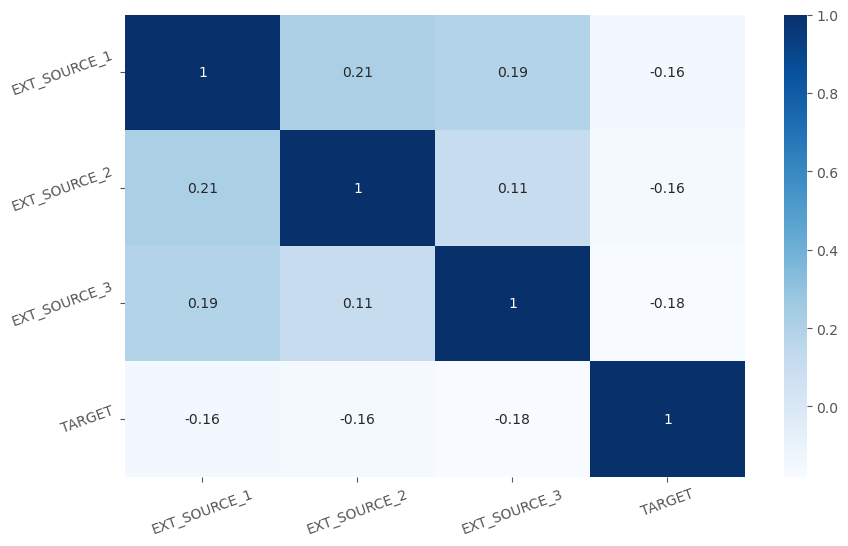

In [14]:
ext_source_corr = appdata[["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3","TARGET"]].corr()


plt.figure(figsize=[10,6])
sns.heatmap(ext_source_corr,cmap="Blues",annot=True)
plt.xticks(rotation=20)
plt.yticks(rotation=20)
plt.show()

Note : 
- As we can see that EXT_SOURCE variables does not have strong liner correlation with Target variable. Therefore, it's safe to drop these columns.

In [15]:
drop_cols.extend(["EXT_SOURCE_2","EXT_SOURCE_3"])

In [16]:
# Dropping the columns with more than 40 % null values

appdata1 = appdata.drop(drop_cols,axis=1)

In [17]:
appdata1.shape

(307511, 71)

#### There are significant number of columns with column name starting with "Flag", let's check their relation with Target column

In [18]:
flag_cols = [i for i in appdata1.columns if "FLAG" in i]
print(flag_cols)

['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']


In [19]:
df_flag =  appdata1[["TARGET"]+flag_cols]
df_flag.head()

TARGET FLAG_OWN_CAR FLAG_OWN_REALTY  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21
0  1       N            Y               1           1               0                1                 1           0           0                1                0                0                0                0                0                0                0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0               
1  0       N            N               1           1               0                1                 1           0           0                1                0                0                0                0                0                0                0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0               
2  0       Y            Y               1           1               1                1                 1           0           0                0                0                0                0                0                0                0                0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0               
3  0       N            Y               1           1               0                1                 0           0           0                1                0                0                0                0                0                0                0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0               
4  0       N            Y               1           1               0                1                 0           0           0                0                0                0                0                0                1                0                0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0

In [20]:
# Some of the columns have True & False mentioned as 1 & 0 respectively. Let's standardize these values by
# converting them to "Y" & "N"

df_flag = df_flag.replace({1:"Y", 0:"N"})
df_flag.head()

TARGET FLAG_OWN_CAR FLAG_OWN_REALTY FLAG_MOBIL FLAG_EMP_PHONE FLAG_WORK_PHONE FLAG_CONT_MOBILE FLAG_PHONE FLAG_EMAIL FLAG_DOCUMENT_2 FLAG_DOCUMENT_3 FLAG_DOCUMENT_4 FLAG_DOCUMENT_5 FLAG_DOCUMENT_6 FLAG_DOCUMENT_7 FLAG_DOCUMENT_8 FLAG_DOCUMENT_9 FLAG_DOCUMENT_10 FLAG_DOCUMENT_11 FLAG_DOCUMENT_12 FLAG_DOCUMENT_13 FLAG_DOCUMENT_14 FLAG_DOCUMENT_15 FLAG_DOCUMENT_16 FLAG_DOCUMENT_17 FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21
0  Y      N            Y               Y          Y              N               Y                Y          N          N               Y               N               N               N               N               N               N               N                N                N                N                N                N                N                N                N                N                N                N              
1  N      N            N               Y          Y              N               Y                Y          N          N               Y               N               N               N               N               N               N               N                N                N                N                N                N                N                N                N                N                N                N              
2  N      Y            Y               Y          Y              Y               Y                Y          N          N               N               N               N               N               N               N               N               N                N                N                N                N                N                N                N                N                N                N                N              
3  N      N            Y               Y          Y              N               Y                N          N          N               Y               N               N               N               N               N               N               N                N                N                N                N                N                N                N                N                N                N                N              
4  N      N            Y               Y          Y              N               Y                N          N          N               N               N               N               N               N               Y               N               N                N                N                N                N                N                N                N                N                N                N                N

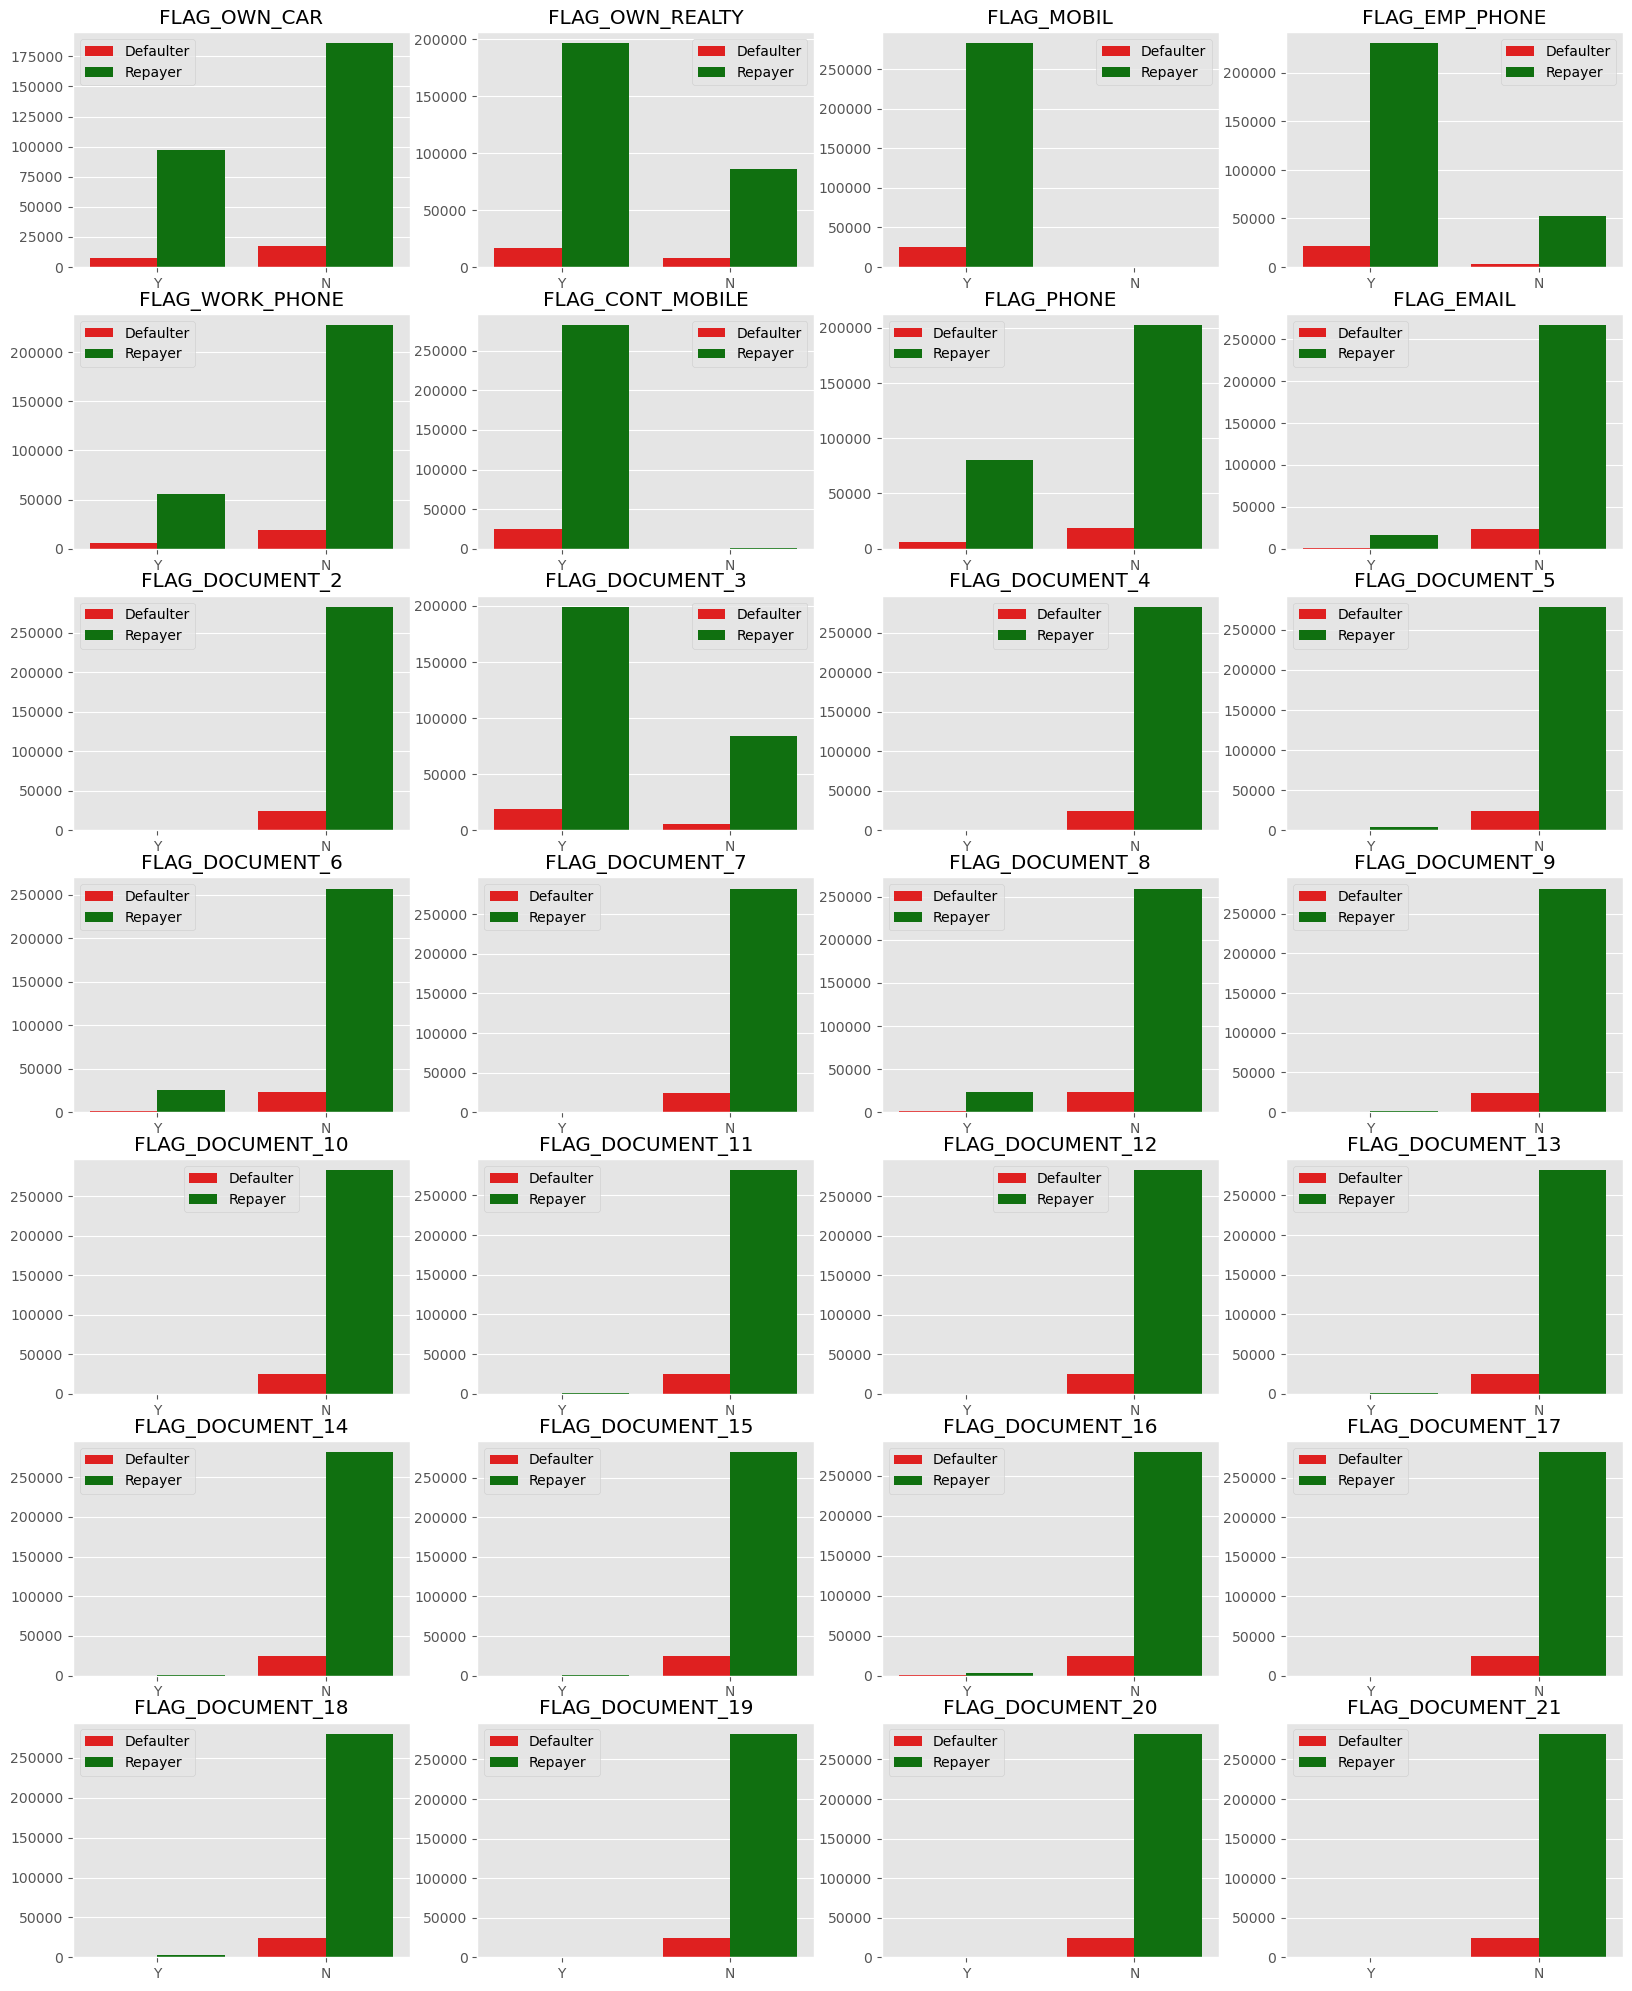

In [21]:
fig = plt.figure(figsize=(20,25))

for i,j in enumerate(flag_cols,1):
    plt.subplot(7,4,i)
    sns.countplot(x=df_flag[j],hue=df_flag["TARGET"],palette=["r","g"],order=['Y','N'])
    plt.legend(['Defaulter','Repayer'])
    plt.title(j)
    plt.xlabel(None)
    plt.ylabel(None)
plt.show()

##### Note :

1) From the above plots, it is observed that there are more number of repayers than defaluters if we consider the below mentioned variables with True("Y") values. 
'FLAG_OWN_CAR','FLAG_OWN_REALTY', 'FLAG_MOBIL', 'FLAG_EMP_PHONE','FLAG_CONT_MOBILE','FLAG_DOCUMENT_3'

2) Also most of the applicants have not submitted documents except document 3 ( document 6 and 8 have quite less "Yes" count). So, only document_3 can give us some insights as other document variables are dominated by 'No' category.  

3) From the Flag variables, the significant ones are 'FLAG_OWN_CAR', FLAG_OWN_REALTY, FLAG_DOCUMENT_3. Other variables are heavily skewed, So we will keep them in our data for further analysis and drop the others.

In [22]:
flag_cols = list(set(flag_cols)-set(["FLAG_OWN_CAR","FLAG_OWN_REALTY", "FLAG_DOCUMENT_3"]))

print(flag_cols)

['FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_14', 'FLAG_EMAIL', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_21', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_9', 'FLAG_CONT_MOBILE', 'FLAG_DOCUMENT_20', 'FLAG_PHONE', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_7', 'FLAG_WORK_PHONE', 'FLAG_EMP_PHONE', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_15', 'FLAG_MOBIL', 'FLAG_DOCUMENT_4']


In [23]:
# dropping flag variables

appdata1.drop(flag_cols,axis=1,inplace=True)

In [24]:
appdata1.info(-1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

#### Checking variables related to region

In [25]:
# extracting region columns 

region_cols = [i for i in appdata1.columns if i.startswith('REG') or 'region' in i.lower()]
region_cols.append('LIVE_CITY_NOT_WORK_CITY')
print(region_cols)

['REGION_POPULATION_RELATIVE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']


In [26]:
# REGION_POPULATION_RELATIVE is in fact a numerical variable which we will analyse later on.

region_cols.remove('REGION_POPULATION_RELATIVE')

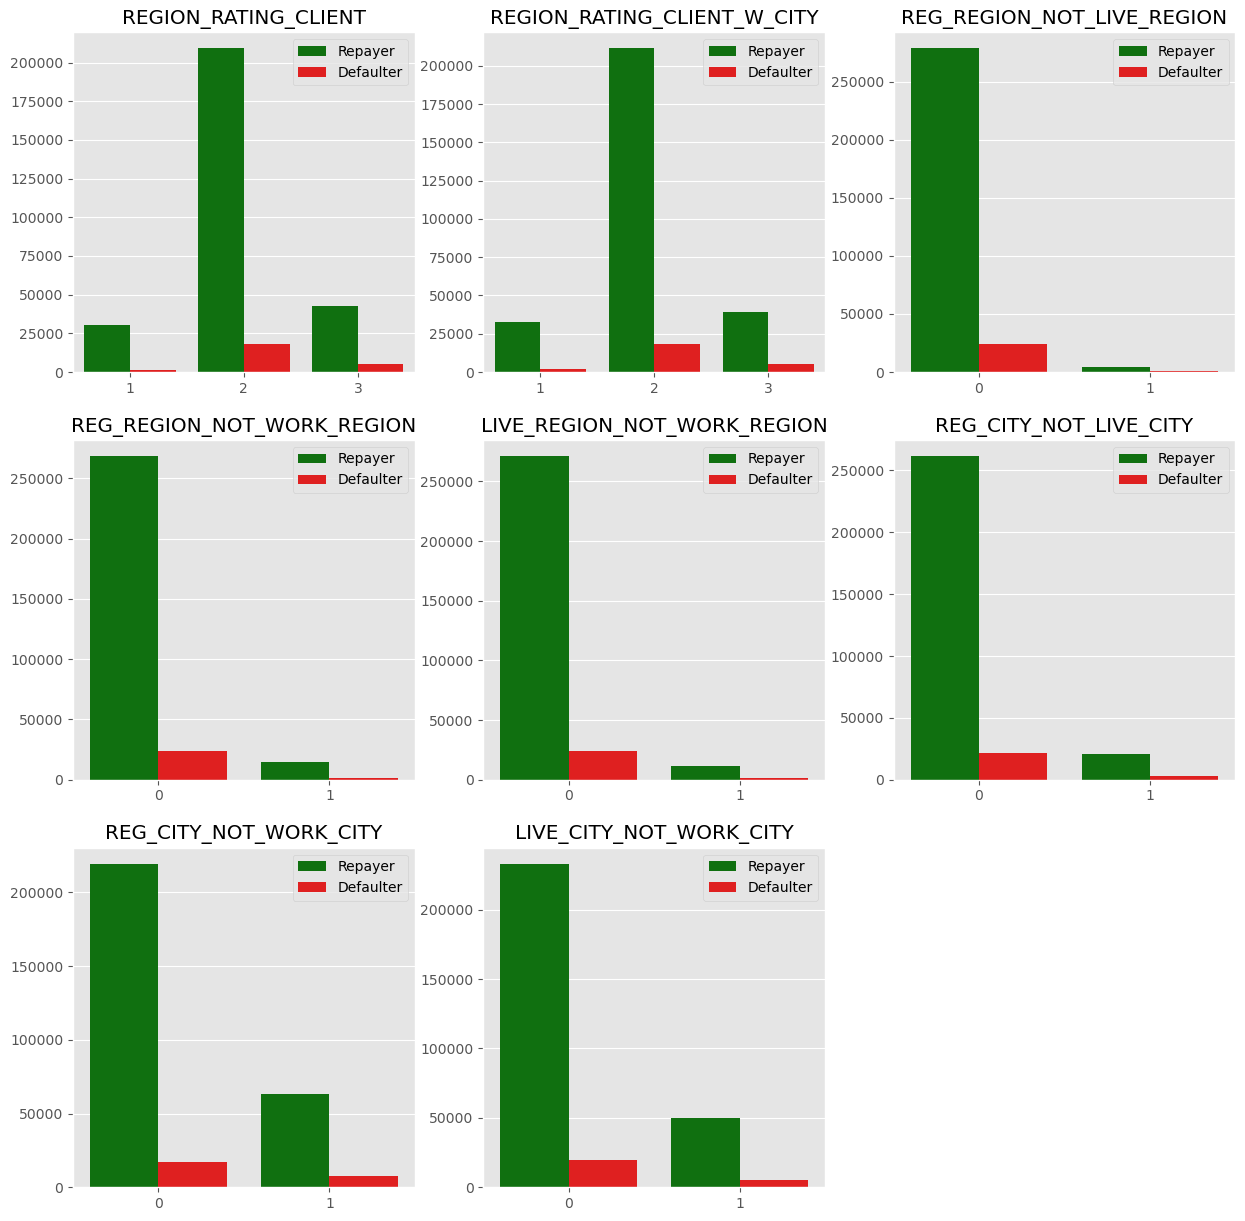

In [27]:
fig = plt.figure(figsize=(15,15))

for i,j in enumerate(region_cols,1):
    plt.subplot(3,3,i)
    sns.countplot(x=appdata1[j],hue=appdata1["TARGET"],palette=["g","r"])
    plt.title(j)
    plt.legend(['Repayer','Defaulter'])
    plt.xlabel(None)
    plt.ylabel(None)
plt.show()

Note: 
* We can only say that region with rating 2 has most of the customers as well as repayers.
* As we can see from the plots, there is no specific pattern for defaulting related to region variables, the regional data does not provide any significant insight, therefore we will drop these columns.

In [28]:
# dropping region variables

appdata1.drop(region_cols,axis=1,inplace=True)

### 2.2) Handling null values

#### Lets check the null values in remaining variables in order to imput them with appropriate values

In [29]:
# % of null values

(appdata1.isnull().mean()*100).sort_values(ascending=False) 

OCCUPATION_TYPE               31.345545
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
NAME_TYPE_SUITE               0.420148 
DEF_60_CNT_SOCIAL_CIRCLE      0.332021 
OBS_30_CNT_SOCIAL_CIRCLE      0.332021 
DEF_30_CNT_SOCIAL_CIRCLE      0.332021 
OBS_60_CNT_SOCIAL_CIRCLE      0.332021 
AMT_GOODS_PRICE               0.090403 
AMT_ANNUITY                   0.003902 
CNT_FAM_MEMBERS               0.000650 
DAYS_LAST_PHONE_CHANGE        0.000325 
FLAG_DOCUMENT_3               0.000000 
ORGANIZATION_TYPE             0.000000 
HOUR_APPR_PROCESS_START       0.000000 
WEEKDAY_APPR_PROCESS_START    0.000000 
SK_ID_CURR                    0.000000 
DAYS_ID_PUBLISH               0.000000 
AMT_CREDIT                    0.000000 
NAME_CONTRACT_TYPE            0.000000 
CODE_GENDER                   0.000000 


- From above, it is observed that "occupation type" variable contains approx 31% null values, so let's take a look at the values in "occupation type" variable.

In [30]:
appdata1.OCCUPATION_TYPE.value_counts(normalize=True,dropna=False)*100

NaN                      31.345545
Laborers                 17.946025
Sales staff              10.439301
Core staff               8.965533 
Managers                 6.949670 
Drivers                  6.049540 
High skill tech staff    3.700681 
Accountants              3.191105 
Medicine staff           2.776161 
Security staff           2.185613 
Cooking staff            1.933589 
Cleaning staff           1.513117 
Private service staff    0.862408 
Low-skill Laborers       0.680626 
Waiters/barmen staff     0.438358 
Secretaries              0.424375 
Realty agents            0.244219 
HR staff                 0.183083 
IT staff                 0.171051 
Name: OCCUPATION_TYPE, dtype: float64

- it is observed that the data is categorical and imputing the missing with mode will greatly impact the analysis as the missing value % is 31.34. So, it is suitable to add a new category "Unknown" containing missing values.

In [31]:
appdata1.OCCUPATION_TYPE.fillna("Unknown",inplace=True)

In [32]:
#  Let's check AMT_REQ_ variables

amt_cols = [i for i in appdata1.columns if i.startswith('AMT_REQ')]
print(amt_cols)

['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


In [33]:
appdata1[amt_cols].describe().T

count      mean       std  min  25%  50%  75%    max
AMT_REQ_CREDIT_BUREAU_HOUR  265992.0  0.006402  0.083849  0.0  0.0  0.0  0.0  4.0  
AMT_REQ_CREDIT_BUREAU_DAY   265992.0  0.007000  0.110757  0.0  0.0  0.0  0.0  9.0  
AMT_REQ_CREDIT_BUREAU_WEEK  265992.0  0.034362  0.204685  0.0  0.0  0.0  0.0  8.0  
AMT_REQ_CREDIT_BUREAU_MON   265992.0  0.267395  0.916002  0.0  0.0  0.0  0.0  27.0 
AMT_REQ_CREDIT_BUREAU_QRT   265992.0  0.265474  0.794056  0.0  0.0  0.0  0.0  261.0
AMT_REQ_CREDIT_BUREAU_YEAR  265992.0  1.899974  1.869295  0.0  0.0  1.0  3.0  25.0

Note :  
- As we can see the above variables are related to the number of enquiries made by the bank or the applicant to credit bureau to get the credit report, and the value should be a distinct number. 
- Also, it is interesting to see that, all the variables have excatly same % of missing values?
- So, could they be missing at random? (in specific pattern).
- Let's dig deeper into there variables.
so here, imputing the missing values with mean would not suffice, so we will impute the missing values with median

In [34]:
amt_credit_df = appdata1[appdata1['AMT_REQ_CREDIT_BUREAU_HOUR'].isna()]
amt_credit_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START       ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
3   100006      0       Cash loans         F           N            Y               0             135000.0          312682.5    29686.5      297000.0         Unaccompanied   Working          Secondary / secondary special  Civil marriage        House / apartment  0.008019                   -19005      -3039          -9833.0            -2437             Laborers        2.0              WEDNESDAY                  17                       Business Entity Type 3  2.0                       0.0                       2.0                       0.0                      -617.0                   1               NaN                         NaN                        NaN                         NaN                        NaN                        NaN                        
9   100012      0       Revolving loans    M           N            Y               0             135000.0          405000.0    20250.0      405000.0         Unaccompanied   Working          Secondary / secondary special  Single / not married  House / apartment  0.019689                   -14469      -2019          -14437.0           -3992             Laborers        1.0              THURSDAY                   8                        Electricity             2.0                       0.0                       2.0                       0.0                      -1673.0                  0               NaN                         NaN                        NaN                         NaN                        NaN                        NaN                        
14  100018      0       Cash loans         F           N            Y               0             189000.0          773680.5    32778.0      679500.0         Unaccompanied   Working          Secondary / secondary special  Married               House / apartment  0.010006                   -14583      -203           -615.0             -2056             Laborers        2.0              MONDAY                     9                        Transport: type 2       0.0                       0.0                       0.0                       0.0                      -188.0                   1               NaN                         NaN                        NaN                         NaN                        NaN                        NaN                        
17  100021      0       Revolving loans    F           N            Y               1             81000.0           270000.0    13500.0      270000.0         Unaccompanied   Working          Secondary / secondary special  Married               House / apartment  0.010966                   -9776       -191           -4143.0            -2427             Laborers        3.0              MONDAY                     10                       Construction            4.0                       0.0                       4.0                       0.0                      -2811.0                  0               NaN                         NaN                        NaN                         NaN                        NaN                        NaN                        
20  100024      0       Revolving loans    M           Y            Y               0             135000.0          427500.0    21375.0      427

In [35]:
amt_credit_df.TARGET.sum()/amt_credit_df.shape[0]

0.10337435872732965

In [36]:
for i in appdata1.select_dtypes('object'):
    print("amt_credit_df : ",'\n',amt_credit_df[i].value_counts(normalize=True))
    print('application_data_df :','\n',appdata1[i].value_counts(normalize=True),"\n\n")

amt_credit_df :  
 Cash loans         0.896915
Revolving loans    0.103085
Name: NAME_CONTRACT_TYPE, dtype: float64
application_data_df : 
 Cash loans         0.904787
Revolving loans    0.095213
Name: NAME_CONTRACT_TYPE, dtype: float64 


amt_credit_df :  
 F    0.630651
M    0.369349
Name: CODE_GENDER, dtype: float64
application_data_df : 
 F      0.658344
M      0.341643
XNA    0.000013
Name: CODE_GENDER, dtype: float64 


amt_credit_df :  
 N    0.710446
Y    0.289554
Name: FLAG_OWN_CAR, dtype: float64
application_data_df : 
 N    0.659892
Y    0.340108
Name: FLAG_OWN_CAR, dtype: float64 


amt_credit_df :  
 Y    0.715624
N    0.284376
Name: FLAG_OWN_REALTY, dtype: float64
application_data_df : 
 Y    0.693673
N    0.306327
Name: FLAG_OWN_REALTY, dtype: float64 


amt_credit_df :  
 Unaccompanied      0.795557
Family             0.138252
Spouse, partner    0.042284
Children           0.011760
Other_B            0.007293
Other_A            0.003767
Group of people    0.001087
Name:

- by comparing the percentage distribution of each category variablewise from two dataframes, one df, where amount columns have missing data and other df, where amount columns do not have missing data, we can come to conclusion that there is no trend in missingness.
- So, we will impute them with median.
- Also some of the variables have 'XNA' instead of 'NA', we will deal with them later on.

In [37]:
fill_values = appdata1[amt_cols].median()
fill_values

AMT_REQ_CREDIT_BUREAU_HOUR    0.0
AMT_REQ_CREDIT_BUREAU_DAY     0.0
AMT_REQ_CREDIT_BUREAU_WEEK    0.0
AMT_REQ_CREDIT_BUREAU_MON     0.0
AMT_REQ_CREDIT_BUREAU_QRT     0.0
AMT_REQ_CREDIT_BUREAU_YEAR    1.0
dtype: float64

In [38]:
appdata1.fillna(fill_values,inplace=True)

In [39]:
appdata1.isnull().mean().sort_values(ascending=False)*100

NAME_TYPE_SUITE               0.420148
OBS_30_CNT_SOCIAL_CIRCLE      0.332021
DEF_30_CNT_SOCIAL_CIRCLE      0.332021
OBS_60_CNT_SOCIAL_CIRCLE      0.332021
DEF_60_CNT_SOCIAL_CIRCLE      0.332021
AMT_GOODS_PRICE               0.090403
AMT_ANNUITY                   0.003902
CNT_FAM_MEMBERS               0.000650
DAYS_LAST_PHONE_CHANGE        0.000325
FLAG_DOCUMENT_3               0.000000
OCCUPATION_TYPE               0.000000
AMT_REQ_CREDIT_BUREAU_HOUR    0.000000
AMT_REQ_CREDIT_BUREAU_DAY     0.000000
AMT_REQ_CREDIT_BUREAU_WEEK    0.000000
AMT_REQ_CREDIT_BUREAU_MON     0.000000
AMT_REQ_CREDIT_BUREAU_QRT     0.000000
ORGANIZATION_TYPE             0.000000
HOUR_APPR_PROCESS_START       0.000000
WEEKDAY_APPR_PROCESS_START    0.000000
SK_ID_CURR                    0.000000
DAYS_REGISTRATION             0.000000
DAYS_ID_PUBLISH               0.000000
AMT_CREDIT                    0.000000
NAME_CONTRACT_TYPE            0.000000
CODE_GENDER                   0.000000
FLAG_OWN_CAR             

**Note:**
The missing value % of some variables is very less, so instead of dropping the missing rows we will ignore them.

### 2.3) Standardization of data

In [40]:
appdata1.describe().T

count           mean            std           min            25%           50%            75%           max
SK_ID_CURR                  307511.0  278180.518577  102790.175348  100002.00000  189145.500000  278202.00000  367142.500000  4.562550e+05
TARGET                      307511.0  0.080729       0.272419       0.00000       0.000000       0.00000       0.000000       1.000000e+00
CNT_CHILDREN                307511.0  0.417052       0.722121       0.00000       0.000000       0.00000       1.000000       1.900000e+01
AMT_INCOME_TOTAL            307511.0  168797.919297  237123.146279  25650.00000   112500.000000  147150.00000  202500.000000  1.170000e+08
AMT_CREDIT                  307511.0  599025.999706  402490.776996  45000.00000   270000.000000  513531.00000  808650.000000  4.050000e+06
AMT_ANNUITY                 307499.0  27108.573909   14493.737315   1615.50000    16524.000000   24903.00000   34596.000000   2.580255e+05
AMT_GOODS_PRICE             307233.0  538396.207429  369446.460540  40500.00000   238500.000000  450000.00000  679500.000000  4.050000e+06
REGION_POPULATION_RELATIVE  307511.0  0.020868       0.013831       0.00029       0.010006       0.01885       0.028663       7.250800e-02
DAYS_BIRTH                  307511.0 -16036.995067   4363.988632   -25229.00000  -19682.000000  -15750.00000  -12413.000000  -7.489000e+03
DAYS_EMPLOYED               307511.0  63815.045904   141275.766519 -17912.00000  -2760.000000   -1213.00000   -289.000000     3.652430e+05
DAYS_REGISTRATION           307511.0 -4986.120328    3522.886321   -24672.00000  -7479.500000   -4504.00000   -2010.000000    0.000000e+00
DAYS_ID_PUBLISH             307511.0 -2994.202373    1509.450419   -7197.00000   -4299.000000   -3254.00000   -1720.000000    0.000000e+00
CNT_FAM_MEMBERS             307509.0  2.152665       0.910682       1.00000       2.000000       2.00000       3.000000       2.000000e+01
HOUR_APPR_PROCESS_START     307511.0  12.063419      3.265832       0.00000       10.000000      12.00000      14.000000      2.300000e+01
OBS_30_CNT_SOCIAL_CIRCLE    306490.0  1.422245       2.400989       0.00000       0.000000       0.00000       2.000000       3.480000e+02
DEF_30_CNT_SOCIAL_CIRCLE    306490.0  0.143421       0.446698       0.00000       0.000000       0.00000       0.000000       3.400000e+01
OBS_60_CNT_SOCIAL_CIRCLE    306490.0  1.405292       2.379803       0.00000       0.000000       0.00000       2.000000       3.440000e+02
DEF_60_CNT_SOCIAL_CIRCLE    306490.0  0.100049       0.362291       0.00000       0.000000       0.00000       0.000000       2.400000e+01
DAYS_LAST_PHONE_CHANGE      307510.0 -962.858788     826.808487    -4292.00000   -1570.000000   -757.00000    -274.000000     0.000000e+00
FLAG_DOCUMENT_3             307511.0  0.710023       0.453752       0.00000       0.000000       1.00000       1.000000       1.000000e+00
AMT_REQ_CREDIT_BUREAU_HOUR  307511.0  0.005538       0.078014       0.00000       0.000000       0.00000       0.000000       4.000000e+00
AMT_REQ_CREDIT_BUREAU_DAY   307511.0  0.006055       0.103037       0.00000       0.000000       0.00000       0.000000       9.000000e+00
AMT_REQ_CREDIT_BUREAU_WEEK  307511.0  0.029723       0.190728       0.00000       0.000000       0.00000       0.000000       8.000000e+00
AMT_REQ_CREDIT_BUREAU_MON   307511.0  0.231293       0.856810       0.00000       0.000000       0.00000       0.000000       2.700000e+01
AMT_REQ_CREDIT_BUREAU_QRT   307511.0  0.229631       0.744059       0.00000       0.000000       0.00000       0.000000       2.610000e+02
AMT_REQ_CREDIT_BUREAU_YEAR  307511.0  1.778463       1.765523       0.00000       1.000000       1.00000       3.000000       2.500000e+01

Note:
- columns __AMT_INCOME_TOTAL, AMT_CREDIT, AMT_GOODS_PRICE__ have very high values, therefore we will make these numerical columns to categorical columns for better analysis.
- columns **DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, DAYS_LAST_PHONE_CHANGE** which counts days have negative values. we will need to correct those values.

### 2.3.1) Handling Numerical Variables

In [41]:
days_col = ["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "DAYS_LAST_PHONE_CHANGE"]

In [42]:
# correcting the negative days values

appdata1[days_col] = appdata1[days_col].apply(lambda x: abs(x))
appdata1[days_col].describe()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  DAYS_LAST_PHONE_CHANGE
count  307511.000000  307511.000000  307511.000000      307511.000000    307510.000000         
mean   16036.995067   67724.742149   4986.120328        2994.202373      962.858788            
std    4363.988632    139443.751806  3522.886321        1509.450419      826.808487            
min    7489.000000    0.000000       0.000000           0.000000         0.000000              
25%    12413.000000   933.000000     2010.000000        1720.000000      274.000000            
50%    15750.000000   2219.000000    4504.000000        3254.000000      757.000000            
75%    19682.000000   5707.000000    7479.500000        4299.000000      1570.000000           
max    25229.000000   365243.000000  24672.000000       7197.000000      4292.000000

Note : the negative values have been converted to positive values

In [43]:
# lets check the "DAYS_BIRTH" & "DAYS_EMPLOYED" minimum and maximum values in years to get  
# an idea for bining

(appdata1[["DAYS_BIRTH","DAYS_EMPLOYED"]]/365).describe(percentiles=[0.2,0.4,0.6,0.8])   # Converting to Years 

DAYS_BIRTH  DAYS_EMPLOYED
count  307511.000000  307511.000000
mean   43.936973      185.547239   
std    11.956133      382.037676   
min    20.517808      0.000000     
20%    32.038356      2.052055     
40%    39.495890      4.375342     
50%    43.150685      6.079452     
60%    47.178082      8.306849     
80%    56.093151      25.172603    
max    69.120548      1000.665753

In [44]:
appdata1[appdata1.DAYS_EMPLOYED/365 > 1000].shape

(55374, 38)

Note: 
* As the min age is 20.5, we can start the age bucket from 20.
* Also, by observing the max value(in years) in days employed column, we can surely say that the column has outliers as employment years cannot be 1000.
* Let's first take a look at days_employed variable with anomalous records.

In [45]:
appdata1[(appdata1.DAYS_EMPLOYED/365 > 1000)]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
8       100011      0       Cash loans         F           N            Y               0             112500.000        1019610.0   33826.5      913500.0         Children        Pensioner        Secondary / secondary special  Married               House / apartment  0.018634                    20099       365243         7427.0             3514             Unknown         2.0              WEDNESDAY                  14                       XNA               1.0                       0.0                       1.0                       0.0                       0.0                     1                0.0                         0.0                        0.0                         0.0                        0.0                        1.0                       
11      100015      0       Cash loans         F           N            Y               0             38419.155         148365.0    10678.5      135000.0         Children        Pensioner        Secondary / secondary special  Married               House / apartment  0.015221                    20417       365243         5246.0             2512             Unknown         2.0              FRIDAY                     7                        XNA               0.0                       0.0                       0.0                       0.0                       2396.0                  0                0.0                         0.0                        0.0                         0.0                        0.0                        2.0                       
23      100027      0       Cash loans         F           N            Y               0             83250.000         239850.0    23850.0      225000.0         Unaccompanied   Pensioner        Secondary / secondary special  Married               House / apartment  0.006296                    24827       365243         9012.0             3684             Unknown         2.0              FRIDAY                     12                       XNA               0.0                       0.0                       0.0                       0.0                       795.0                   0                0.0                         0.0                        0.0                         0.0                        0.0                        3.0                       
38      100045      0       Cash loans         F           N            Y               0             99000.000         247275.0    17338.5      225000.0         Unaccompanied   Pensioner        Secondary / secondary special  Married               House / apartment  0.006207                    23920       365243         9817.0             4969             Unknown         2.0              FRIDAY                     11                       XNA               0.0                       0.0                       0.0                       0.0                       0.0                     1                0.0                         0.0                        0.0                         0.0                        0.0                        2.0                       
43      100050      0       Cash loans         F           N            Y               0             108000.000        746280.0    42970.5      675000.0     

In [46]:
appdata1[(appdata1.NAME_INCOME_TYPE=='Pensioner')].shape

(55362, 38)

In [47]:
appdata1[(appdata1.DAYS_EMPLOYED/365 > 1000)].shape

(55374, 38)

- We can see, for customers with income_type as pension, the days employed are entered as 365243 days. This is clearly affecting the percentiles as there are 55362 records of the same.
- Also, there are other records where `DAYS_EMPLOYED` is 365243 and NAME_INCOME_TYPE is not 'Pensioner'.

In [48]:
appdata1[(appdata1.NAME_INCOME_TYPE!='Pensioner') & (appdata1.DAYS_EMPLOYED==365243)]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
1156    101358      0       Revolving loans    F           N            N               0             337500.0          585000.0    29250.0      585000.0         Unaccompanied   Unemployed       Higher education               Single / not married  House / apartment    0.020713                    13964       365243         115.0              4746             Unknown         1.0              FRIDAY                     5                        XNA              NaN                       NaN                       NaN                       NaN                        325.0                   0                0.0                         0.0                        0.0                         0.0                        0.0                        0.0                       
3937    104600      0       Revolving loans    F           N            Y               2             135000.0          270000.0    13500.0      270000.0         Unaccompanied   Unemployed       Secondary / secondary special  Widow                 House / apartment    0.018029                    15947       365243         4219.0             4212             Unknown         3.0              MONDAY                     11                       XNA               2.0                       0.0                       2.0                       0.0                       49.0                    0                0.0                         0.0                        0.0                         0.0                        1.0                        2.0                       
23834   127729      1       Cash loans         F           N            Y               0             99000.0           783000.0    22306.5      783000.0         Unaccompanied   Unemployed       Secondary / secondary special  Widow                 House / apartment    0.018209                    23692       365243         5661.0             4715             Unknown         1.0              TUESDAY                    14                       XNA               0.0                       0.0                       0.0                       0.0                       1436.0                  0                0.0                         0.0                        0.0                         0.0                        0.0                        1.0                       
35352   140949      0       Cash loans         F           N            N               0             56250.0           1530000.0   54954.0      1530000.0        Unaccompanied   Unemployed       Secondary / secondary special  Single / not married  House / apartment    0.011703                    17418       365243         5086.0             951              Unknown         1.0              MONDAY                     12                       XNA               3.0                       0.0                       2.0                       0.0                       1169.0                  0                0.0                         0.0                        0.0                         0.0                        0.0                        1.0                       
37512   143454      1       Cash loans         M           Y            Y               0             31500.0           585000.0    26892.0      585

- So, for 'Unemployed' customers, the DAYS_EMPLOYED is also recorded as 365243.
- `DAYS_EMPLOYED` variable actually means 'How many days before the application the person started current employment?'
- As both the customer categories, Unemployed & Pensioner, do not have any records of current employment, we will impute it with 0, such that it will not affect whole `DAYS_EMPLOYED` variable.
- And then we will convert the variable into years.

In [49]:
appdata1.loc[appdata1.DAYS_EMPLOYED==365243,'DAYS_EMPLOYED'] = 0

In [50]:
# converting days to years

appdata1['CURR_EMP_YEARS'] = appdata1.DAYS_EMPLOYED.apply(lambda x:math.ceil(x/365))

In [51]:
appdata1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START       ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  CURR_EMP_YEARS
0  100002      1       Cash loans         M           N            Y               0             202500.0          406597.5    24700.5      351000.0         Unaccompanied   Working          Secondary / secondary special  Single / not married  House / apartment  0.018801                    9461        637            3648.0             2120             Laborers        1.0              WEDNESDAY                  10                       Business Entity Type 3  2.0                       2.0                       2.0                       2.0                       1134.0                  1                0.0                         0.0                        0.0                         0.0                        0.0                        1.0                         2             
1  100003      0       Cash loans         F           N            N               0             270000.0          1293502.5   35698.5      1129500.0        Family          State servant    Higher education               Married               House / apartment  0.003541                    16765       1188           1186.0             291              Core staff      2.0              MONDAY                     11                       School                  1.0                       0.0                       1.0                       0.0                       828.0                   1                0.0                         0.0                        0.0                         0.0                        0.0                        0.0                         4             
2  100004      0       Revolving loans    M           Y            Y               0             67500.0           135000.0    6750.0       135000.0         Unaccompanied   Working          Secondary / secondary special  Single / not married  House / apartment  0.010032                    19046       225            4260.0             2531             Laborers        1.0              MONDAY                     9                        Government              0.0                       0.0                       0.0                       0.0                       815.0                   0                0.0                         0.0                        0.0                         0.0                        0.0                        0.0                         1             
3  100006      0       Cash loans         F           N            Y               0             135000.0          312682.5    29686.5      297000.0         Unaccompanied   Working          Secondary / secondary special  Civil marriage        House / apartment  0.008019                    19005       3039           9833.0             2437             Laborers        2.0              WEDNESDAY                  17                       Business Entity Type 3  2.0                       0.0                       2.0                       0.0                       617.0                   1                0.0                         0.0                        0.0                         0.0                        0.0                        1.0                         9             
4  100007      0       Cash loans         M           N            Y

In [52]:
# Adding New column "AGE_CATEGORY"

bins0 = [20,25,40,60,80]
label0 = ['Very_Young','Young', 'Middle_Age','Senior_Citizen']

# bins1 = [0,0.2,0.4,0.6,0.8,1]
# label1 = ["Novice","Advanced_Begineer","Competant","Proficient","Expert"]


appdata1["AGE_CATEGORY"] = pd.cut(appdata1["DAYS_BIRTH"]/365, bins=bins0, labels=label0)
# appdata1["YEARS_EMPLOYED_CATEGORY"] = pd.qcut(appdata1["DAYS_EMPLOYED"]/365, q=bins1, labels=label1)

In [53]:
# appdata1.drop(['DAYS_BIRTH','DAYS_EMPLOYED'],axis=1,inplace=True)

In [54]:
# Let's check if binning is done properly.

appdata1.head(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START       ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  CURR_EMP_YEARS AGE_CATEGORY
0  100002      1       Cash loans         M           N            Y               0             202500.0          406597.5    24700.5      351000.0         Unaccompanied    Working               Secondary / secondary special  Single / not married  House / apartment  0.018801                    9461        637            3648.0             2120             Laborers        1.0              WEDNESDAY                  10                       Business Entity Type 3  2.0                       2.0                       2.0                       2.0                       1134.0                  1                0.0                         0.0                        0.0                         0.0                        0.0                        1.0                         2               Young      
1  100003      0       Cash loans         F           N            N               0             270000.0          1293502.5   35698.5      1129500.0        Family           State servant         Higher education               Married               House / apartment  0.003541                    16765       1188           1186.0             291              Core staff      2.0              MONDAY                     11                       School                  1.0                       0.0                       1.0                       0.0                       828.0                   1                0.0                         0.0                        0.0                         0.0                        0.0                        0.0                         4               Middle_Age 
2  100004      0       Revolving loans    M           Y            Y               0             67500.0           135000.0    6750.0       135000.0         Unaccompanied    Working               Secondary / secondary special  Single / not married  House / apartment  0.010032                    19046       225            4260.0             2531             Laborers        1.0              MONDAY                     9                        Government              0.0                       0.0                       0.0                       0.0                       815.0                   0                0.0                         0.0                        0.0                         0.0                        0.0                        0.0                         1               Middle_Age 
3  100006      0       Cash loans         F           N            Y               0             135000.0          312682.5    29686.5      297000.0         Unaccompanied    Working               Secondary / secondary special  Civil marriage        House / apartment  0.008019                    19005       3039           9833.0             2437             Laborers        2.0              WEDNESDAY                  17                       Business Entity Type 3  2.0                       0.0                       2.0                       0.0                       617.0                   1                0.0                         0.0                        0.0                         0.0                        0.0                        1.0                         9

#### Let's categorize AMT_INCOME_TOTAL, AMT_CREDIT, AMT_GOODS_PRICE columns 

In [55]:
# bins
bins = [0,1,2,3,4,5,6,7,8,9,10,15,20,100]

# ranges
label = ['0-100K','100K-200K', '200K-300K','300K-400K','400K-500K',
        '500K-600K','600K-700K','700K-800K','800K-900K','900K-1M', '1M-1.5M','1.5M-2M','Above 2M'] 

appdata1['AMT_INCOME_RANGE']=pd.cut(appdata1['AMT_INCOME_TOTAL']/100000,bins=bins,labels=label)
appdata1['AMT_CREDIT_RANGE']=pd.cut(appdata1['AMT_CREDIT']/100000,bins=bins,labels=label)
appdata1['AMT_GOODS_PRICE_RANGE']=pd.cut(appdata1['AMT_GOODS_PRICE']/100000,bins=bins,labels=label)

In [56]:
appdata1.AMT_INCOME_RANGE.value_counts(normalize=True)*100

100K-200K    50.697218
200K-300K    21.194896
0-100K       20.714258
300K-400K    4.772559 
400K-500K    1.743369 
500K-600K    0.356088 
600K-700K    0.282594 
800K-900K    0.096908 
1M-1.5M      0.053982 
700K-800K    0.052682 
Above 2M     0.013333 
1.5M-2M      0.013008 
900K-1M      0.009105 
Name: AMT_INCOME_RANGE, dtype: float64

Note : We can see that approx 92% applicants have salary less than 300K

In [57]:
appdata1.AMT_CREDIT_RANGE.value_counts(normalize=True)*100

200K-300K    17.824728
1M-1.5M      12.756942
500K-600K    11.131960
400K-500K    10.418489
100K-200K    9.801275 
300K-400K    8.564897 
600K-700K    7.820533 
800K-900K    7.086576 
700K-800K    6.241403 
900K-1M      2.902986 
1.5M-2M      2.837947 
0-100K       1.952450 
Above 2M     0.659814 
Name: AMT_CREDIT_RANGE, dtype: float64

Note: 
- The loan amount in range 200K-300K has most number of applicants and it is surprising that the second highest loan range is "1M-1.5M" which accounts to around 13%. 
- Also, there are only 2% customers, who have applied for loan amount below 100K.

In [58]:
appdata1['AMT_GOODS_PRICE_RANGE'].value_counts(normalize=True)*100

200K-300K    20.427819
400K-500K    18.543906
600K-700K    13.027246
100K-200K    10.726712
1M-1.5M      8.854843 
800K-900K    6.992738 
300K-400K    6.906485 
500K-600K    4.269398 
0-100K       2.834656 
700K-800K    2.639690 
900K-1M      2.526096 
1.5M-2M      1.894653 
Above 2M     0.355756 
Name: AMT_GOODS_PRICE_RANGE, dtype: float64

Note: 
- GOODS_PRICE_RANGE 200-300K has most number of applicants
- Generally, customers applying for loan for goods prices between 200K-700K contribute to almost 3/4th of the total customers.

### 2.3.2) Handling Categorical Data

In [59]:
# Let's check the non-numeric datatypes for any anomalous records and also, change the datatype to categorical. 

appdata1.select_dtypes(['object','category']).columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'AGE_CATEGORY',
       'AMT_INCOME_RANGE', 'AMT_CREDIT_RANGE', 'AMT_GOODS_PRICE_RANGE'],
      dtype='object')

In [60]:
# Lets see the value counts in variables where datatype 
# is object to check if any inappropriate string is present or not.

listA = ["NAME_CONTRACT_TYPE","CODE_GENDER",'FLAG_OWN_CAR',"FLAG_OWN_REALTY","NAME_TYPE_SUITE","NAME_INCOME_TYPE",
         "NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS","NAME_HOUSING_TYPE","OCCUPATION_TYPE","ORGANIZATION_TYPE"]

for i in listA:
    print(appdata1[i].value_counts(),end="\n\n")

Cash loans         278232
Revolving loans    29279 
Name: NAME_CONTRACT_TYPE, dtype: int64

F      202448
M      105059
XNA    4     
Name: CODE_GENDER, dtype: int64

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

Y    213312
N    94199 
Name: FLAG_OWN_REALTY, dtype: int64

Unaccompanied      248526
Family             40149 
Spouse, partner    11370 
Children           3267  
Other_B            1770  
Other_A            866   
Group of people    271   
Name: NAME_TYPE_SUITE, dtype: int64

Working                 158774
Commercial associate    71617 
Pensioner               55362 
State servant           21703 
Unemployed              22    
Student                 18    
Businessman             10    
Maternity leave         5     
Name: NAME_INCOME_TYPE, dtype: int64

Secondary / secondary special    218391
Higher education                 74863 
Incomplete higher                10277 
Lower secondary                  3816  
Academic degree                  164   
Name: NAM

Note: we can see that "CODE_GENDER" & "ORGANISATION_TYPE" variables contains some "XNA" values. which actually denote Null values.

Lets impute these "XNA" values. 

In [61]:
appdata1.loc[appdata1.CODE_GENDER=="XNA","CODE_GENDER"] = "F"    # replaced the "XNA" with mode which is "F"

Lets check the "XNA" values for organisation type, and see if these values are missing in a pattern or not.

In [62]:
appdata1.loc[appdata1.ORGANIZATION_TYPE == "XNA"]["NAME_INCOME_TYPE"].head(50)

8      Pensioner
11     Pensioner
23     Pensioner
38     Pensioner
43     Pensioner
46     Pensioner
54     Pensioner
56     Pensioner
62     Pensioner
79     Pensioner
81     Pensioner
84     Pensioner
99     Pensioner
105    Pensioner
106    Pensioner
108    Pensioner
117    Pensioner
118    Pensioner
125    Pensioner
140    Pensioner
143    Pensioner
156    Pensioner
157    Pensioner
158    Pensioner
173    Pensioner
174    Pensioner
175    Pensioner
185    Pensioner
213    Pensioner
220    Pensioner
222    Pensioner
226    Pensioner
227    Pensioner
233    Pensioner
237    Pensioner
239    Pensioner
240    Pensioner
247    Pensioner
252    Pensioner
263    Pensioner
270    Pensioner
283    Pensioner
287    Pensioner
290    Pensioner
302    Pensioner
304    Pensioner
305    Pensioner
306    Pensioner
318    Pensioner
322    Pensioner
Name: NAME_INCOME_TYPE, dtype: object

Note : we can observe that for the income type "Pensioner" the organisation type is missing, i.e "XNA", as there is systematic pattern in the missing values, they are "missing at random". So, lets impute the "XNA" values in organisation type variable by the value "Pensioner".

In [63]:
appdata1.ORGANIZATION_TYPE.replace("XNA","Pensioner",inplace=True)

### Lets check the data types of variables and convert them if needed.


In [64]:
appdata1.info(-1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 43 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   SK_ID_CURR                  307511 non-null  int64   
 1   TARGET                      307511 non-null  int64   
 2   NAME_CONTRACT_TYPE          307511 non-null  object  
 3   CODE_GENDER                 307511 non-null  object  
 4   FLAG_OWN_CAR                307511 non-null  object  
 5   FLAG_OWN_REALTY             307511 non-null  object  
 6   CNT_CHILDREN                307511 non-null  int64   
 7   AMT_INCOME_TOTAL            307511 non-null  float64 
 8   AMT_CREDIT                  307511 non-null  float64 
 9   AMT_ANNUITY                 307499 non-null  float64 
 10  AMT_GOODS_PRICE             307233 non-null  float64 
 11  NAME_TYPE_SUITE             306219 non-null  object  
 12  NAME_INCOME_TYPE            307511 non-null  object  
 13 

In [65]:
appdata1.nunique().sort_values()

TARGET                        2     
NAME_CONTRACT_TYPE            2     
CODE_GENDER                   2     
FLAG_OWN_CAR                  2     
FLAG_OWN_REALTY               2     
FLAG_DOCUMENT_3               2     
AGE_CATEGORY                  4     
AMT_REQ_CREDIT_BUREAU_HOUR    5     
NAME_EDUCATION_TYPE           5     
NAME_HOUSING_TYPE             6     
NAME_FAMILY_STATUS            6     
NAME_TYPE_SUITE               7     
WEEKDAY_APPR_PROCESS_START    7     
NAME_INCOME_TYPE              8     
AMT_REQ_CREDIT_BUREAU_WEEK    9     
AMT_REQ_CREDIT_BUREAU_DAY     9     
DEF_60_CNT_SOCIAL_CIRCLE      9     
DEF_30_CNT_SOCIAL_CIRCLE      10    
AMT_REQ_CREDIT_BUREAU_QRT     11    
AMT_INCOME_RANGE              13    
AMT_CREDIT_RANGE              13    
AMT_GOODS_PRICE_RANGE         13    
CNT_CHILDREN                  15    
CNT_FAM_MEMBERS               17    
OCCUPATION_TYPE               19    
AMT_REQ_CREDIT_BUREAU_MON     24    
HOUR_APPR_PROCESS_START       24    
A

In [66]:
# columns to be changed to categorical data type.

cat_cols = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','FLAG_DOCUMENT_3','NAME_TYPE_SUITE',
            'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE',
            'OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE','CNT_CHILDREN','CNT_FAM_MEMBERS']

In [67]:
for i in cat_cols:
    appdata1[i]=appdata1[i].astype("category")

In [68]:
appdata1.info(-1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 43 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   SK_ID_CURR                  307511 non-null  int64   
 1   TARGET                      307511 non-null  int64   
 2   NAME_CONTRACT_TYPE          307511 non-null  category
 3   CODE_GENDER                 307511 non-null  category
 4   FLAG_OWN_CAR                307511 non-null  category
 5   FLAG_OWN_REALTY             307511 non-null  category
 6   CNT_CHILDREN                307511 non-null  category
 7   AMT_INCOME_TOTAL            307511 non-null  float64 
 8   AMT_CREDIT                  307511 non-null  float64 
 9   AMT_ANNUITY                 307499 non-null  float64 
 10  AMT_GOODS_PRICE             307233 non-null  float64 
 11  NAME_TYPE_SUITE             306219 non-null  category
 12  NAME_INCOME_TYPE            307511 non-null  category
 13 

### 2.3.3) Outliers Detection

In [69]:
appdata1.describe()

SK_ID_CURR         TARGET  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  HOUR_APPR_PROCESS_START  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  CURR_EMP_YEARS
count  307511.000000  307511.000000  3.075110e+05      3.075110e+05  307499.000000  3.072330e+05     307511.000000               307511.000000  307511.000000  307511.000000      307511.000000    307511.000000            306490.000000             306490.000000             306490.000000             306490.000000             307510.000000           307511.000000               307511.000000              307511.000000               307511.000000              307511.000000              307511.000000               307511.000000 
mean   278180.518577  0.080729       1.687979e+05      5.990260e+05  27108.573909   5.383962e+05     0.020868                    16036.995067   1954.848123    4986.120328        2994.202373      12.063419                1.422245                  0.143421                  1.405292                  0.100049                  962.858788              0.005538                    0.006055                   0.029723                    0.231293                   0.229631                   1.778463                    5.767865      
std    102790.175348  0.272419       2.371231e+05      4.024908e+05  14493.737315   3.694465e+05     0.013831                    4363.988632    2307.068896    3522.886321        1509.450419      3.265832                 2.400989                  0.446698                  2.379803                  0.362291                  826.808487              0.078014                    0.103037                   0.190728                    0.856810                   0.744059                   1.765523                    6.407564      
min    100002.000000  0.000000       2.565000e+04      4.500000e+04  1615.500000    4.050000e+04     0.000290                    7489.000000    0.000000       0.000000           0.000000         0.000000                 0.000000                  0.000000                  0.000000                  0.000000                  0.000000                0.000000                    0.000000                   0.000000                    0.000000                   0.000000                   0.000000                    0.000000      
25%    189145.500000  0.000000       1.125000e+05      2.700000e+05  16524.000000   2.385000e+05     0.010006                    12413.000000   289.000000     2010.000000        1720.000000      10.000000                0.000000                  0.000000                  0.000000                  0.000000                  274.000000              0.000000                    0.000000                   0.000000                    0.000000                   0.000000                   1.000000                    1.000000      
50%    278202.000000  0.000000       1.471500e+05      5.135310e+05  24903.000000   4.500000e+05     0.018850                    15750.000000   1213.000000    4504.000000        3254.000000      12.000000                0.000000                  0.000000                  0.000000                  0.000000                  757.000000              0.000000                    0.000000                   0.000000                    0.000000                   0.000000                   1.000000                    4.000000      
75%    367142.500000  0.000000       2.025000e+05      8.086500e+05  34596.000000   6.795000e+05     0.028663                    19682.000000   2760.000000    7479.500000        4299.000000      14.000000                2.000000                  0.000000                  2.000000                  0.000000        

- From the above data, we can say that few columns shows possibility of outliers, let's check by plotting box plot.
- We have already handled outliers from `days_employed` variable.

In [70]:
num_cols = appdata1.select_dtypes(exclude=['category']).columns.to_list()
num_cols = num_cols[2::]
print(num_cols)

['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'HOUR_APPR_PROCESS_START', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'CURR_EMP_YEARS']


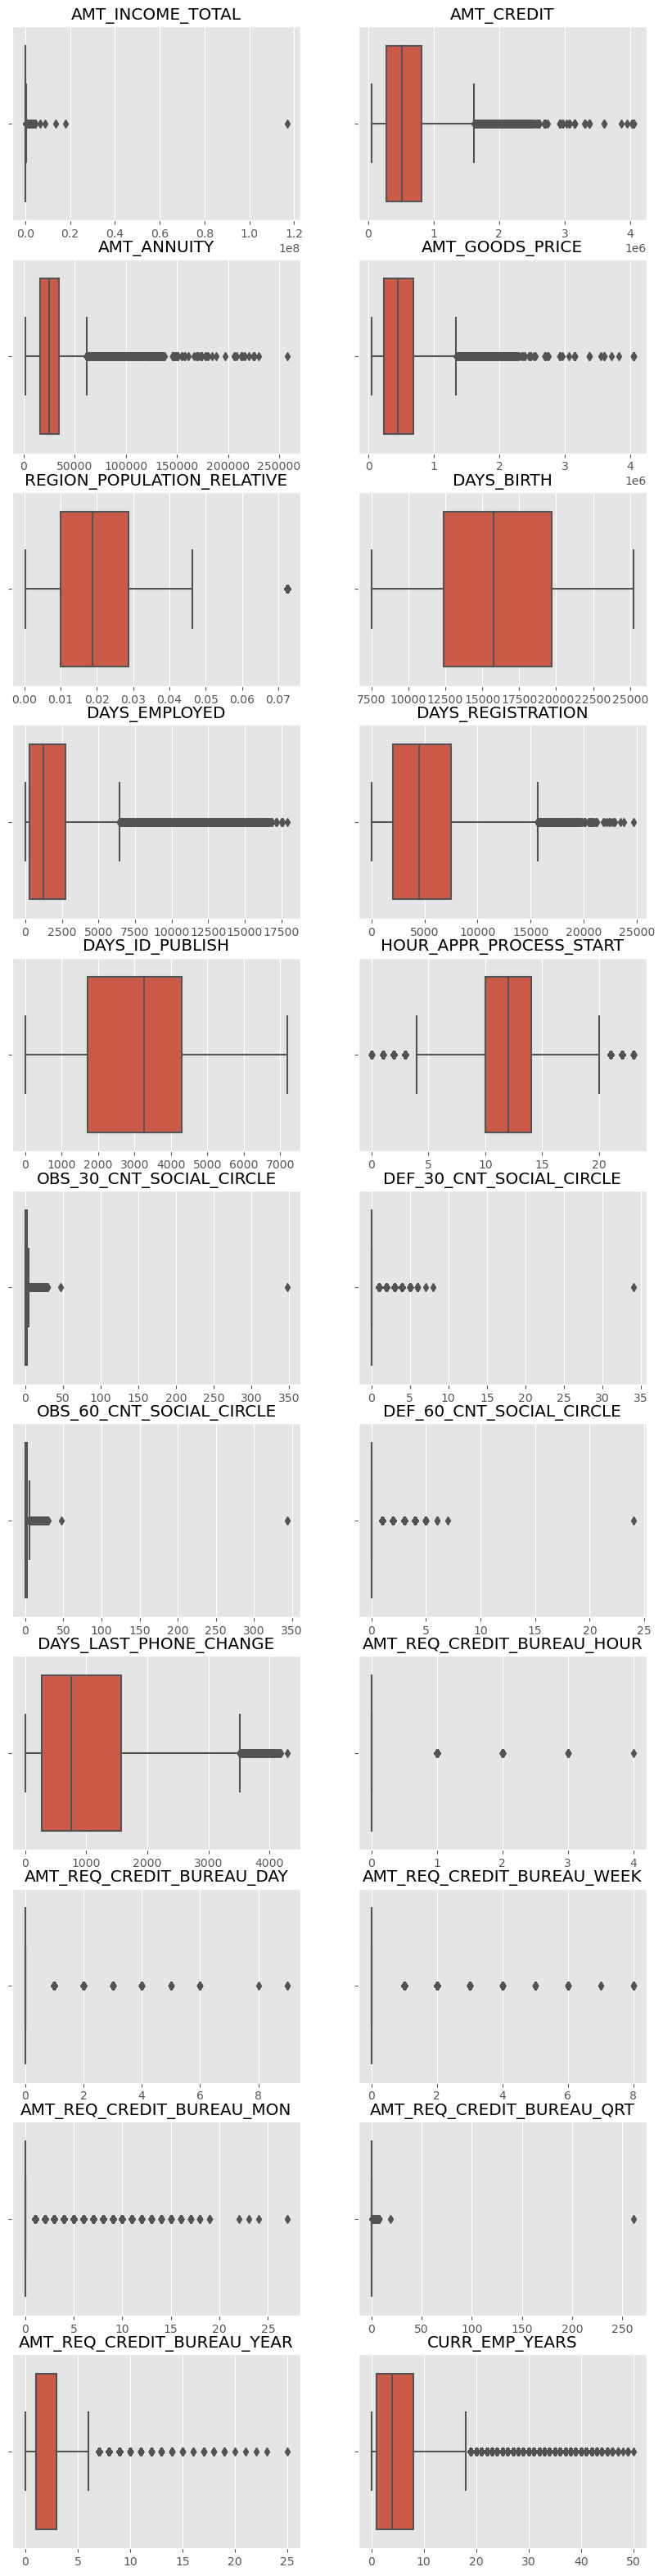

In [71]:
plt.figure(figsize=(10,40))
for i,j in enumerate(num_cols,1):
    plt.subplot(11,2,i)
    sns.boxplot(appdata1[j])
    plt.xlabel(None)
    plt.title(j)
plt.show()

Note:

* AMT_INCOME_TOTAL has some outliers which shows that few customers have very huge salary.
* AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE & DAYS_REGISTRATION also have some outliers but not as significant as AMT_INCOME_TOTAL & DAYS_EMPLOYED
* DAYS_EMPLOYED and CURR_EMP_YEARS variables have high number of outliers.
* DAYS_BIRTH & DAYS_ID_PUBLISH does not have any outliers.
* HOUR_APPR_PROCESS_START has outliers present below the lower bound as well as above the upper bound.
* AMT_REQ_CREDIT_BUREAU variable also have significant outliers.

## 3) Data Visualisation

### 3.1) Data Imbalance

In [72]:
(appdata1.TARGET.value_counts(normalize=True)*100)

0    91.927118
1    8.072882 
Name: TARGET, dtype: float64

In [73]:
# Imbalance_ratio 

91.927118/8.072882

11.387149967013018

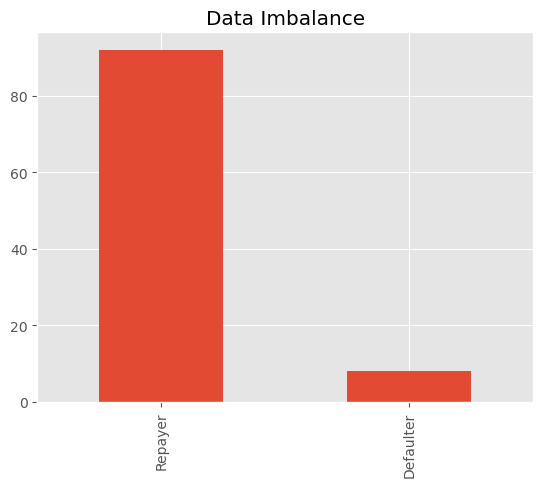

In [74]:
(appdata1.TARGET.value_counts(normalize=True)*100).plot.bar()
plt.xticks(ticks=[0,1],labels=["Repayer","Defaulter"])
plt.title("Data Imbalance")
plt.show()

In [75]:
imbalance_df = appdata1.TARGET.value_counts(normalize=True)*100

In [76]:
imbalance_df

0    91.927118
1    8.072882 
Name: TARGET, dtype: float64

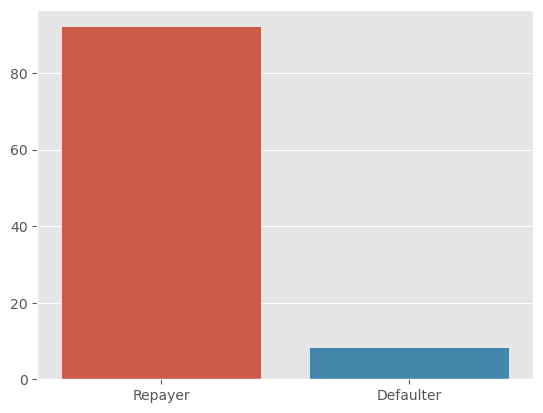

In [77]:
sns.barplot(x=imbalance_df.index,y = imbalance_df.values)
plt.xticks(ticks=[0,1],labels=["Repayer","Defaulter"])
plt.show()

Note:
* Repayers percentage is around 92%
* Defaulters percentage is around 8%
* Imbalance ratio is 11.38
* From the above data, we can say that the percentage of defaluters is around 8% of total borrowers which signifies that the data is adhering to the parctical condition.

### 3.2) Univariate and Bivariate Analysis (Categorical Variables)

In [78]:
print(cat_cols)

['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_DOCUMENT_3', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS']


#### 1) NAME_CONTRACT_TYPE   

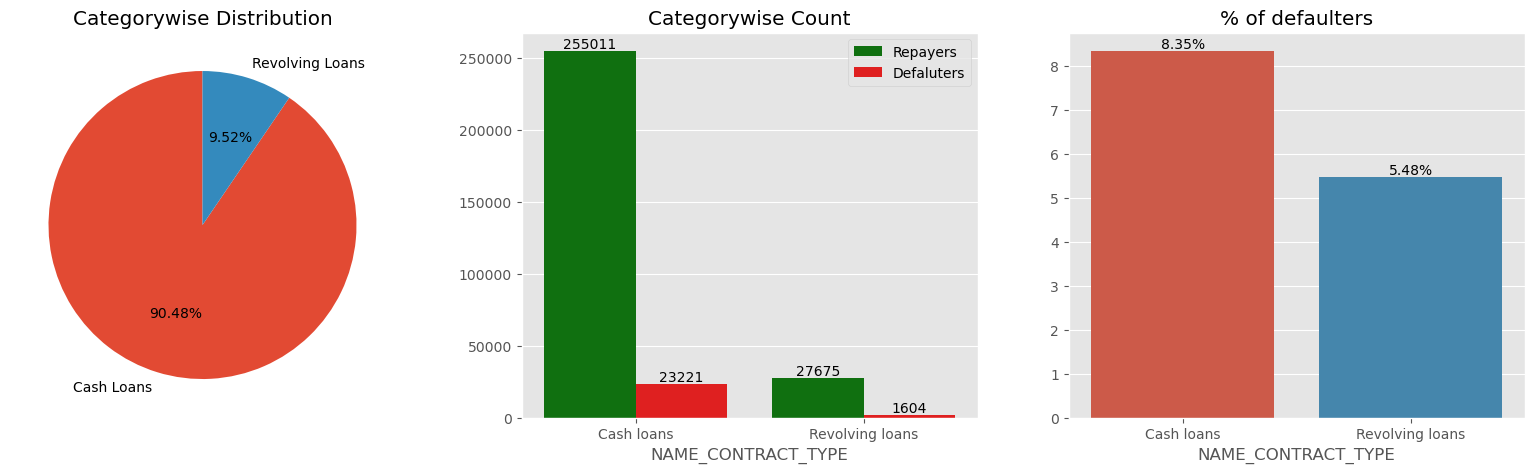

In [80]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.title("Categorywise Distribution")
plt.pie(appdata1.NAME_CONTRACT_TYPE.value_counts(),labels=["Cash Loans","Revolving Loans"],
        startangle=90,normalize=True,autopct='%1.2f%%',)
plt.subplot(1,3,2)
ax = sns.countplot(x=appdata1["NAME_CONTRACT_TYPE"],hue=appdata1["TARGET"],palette=["Green","Red"])
plt.legend(['Repayer','Defaulter'])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Categorywise Count")
plt.xlabel('NAME_CONTRACT_TYPE')
plt.ylabel(None)
plt.legend(["Repayers","Defaluters"])
plt.subplot(1,3,3)
df = appdata1.groupby("NAME_CONTRACT_TYPE").mean()["TARGET"]*100
ax1 = sns.barplot(x=df.index,y=df.values)
ax1.bar_label(ax1.containers[0],fmt='%.2f%%')
plt.xlabel('NAME_CONTRACT_TYPE')
plt.xticks(rotation=0)
plt.title("% of defaulters")
plt.show()

Note: 
* More than 90% business is from customers opting for cash loans
* if we consider the defaulters ratio, although cash loans have more number as well as percentage of defaluters but considering the fact that Revolving loans are only 10% of the total loans, so we cann interprete that cash loan type has some impact on possibility of defaulting.
* the 3% difference between cash and revolving loans can be due to the fact that the client can spend money according to monthwise needs which does increases the chances of repayment.

#### Firstly lets define above code in a function to plot categorical variables.

In [81]:
def Uni_BivarCat_plots(x,pie=True,xrot=0,yrot=0,ylog=False):
    plt.subplot(1,3,1)
    if pie == True:
        plt.title("Categorywise Distribution"+" "+x)
        def my_autopct(pct):
            return ('%1.2f%%' % pct) if pct > 5 else ''
        appdata1[x].value_counts().plot.pie(autopct = my_autopct)
        plt.legend(loc="best",bbox_to_anchor=(0,0))
        plt.ylabel(None)
        plt.subplot(1,3,2)
    else:
        df1 = appdata1[x].value_counts()
        ax2 = sns.barplot(x=df1.index,y=df1.values)
        ax2.bar_label(ax2.containers[0])
        plt.xticks(rotation=xrot)
    plt.subplot(1,3,2)
    ax = sns.countplot(x=appdata1[x],hue=appdata1["TARGET"],palette=["Green","Red"])
    plt.legend(['Repayer','Defaulter'],loc='best')
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    plt.title("Categorywise Count"+" "+x)
    plt.xlabel(None)
    plt.ylabel(None)
    plt.xticks(rotation=xrot)
    plt.yticks(rotation=yrot)
    if ylog==True:
        plt.yscale("log")
    plt.legend(["Repayers","Defaulters"])
    plt.subplot(1,3,3)
    df = appdata1.groupby(x).mean()["TARGET"]*100
    ax1 = sns.barplot(x=df.index,y=df.values)
    ax1.bar_label(ax1.containers[0],fmt='%.2f%%')
    plt.xlabel(None)
    plt.xticks(rotation=xrot)
    plt.yticks(rotation=yrot)
    plt.title("% of defaulters"+" "+x)
    plt.tight_layout()

#### 2) CODE_GENDER                 

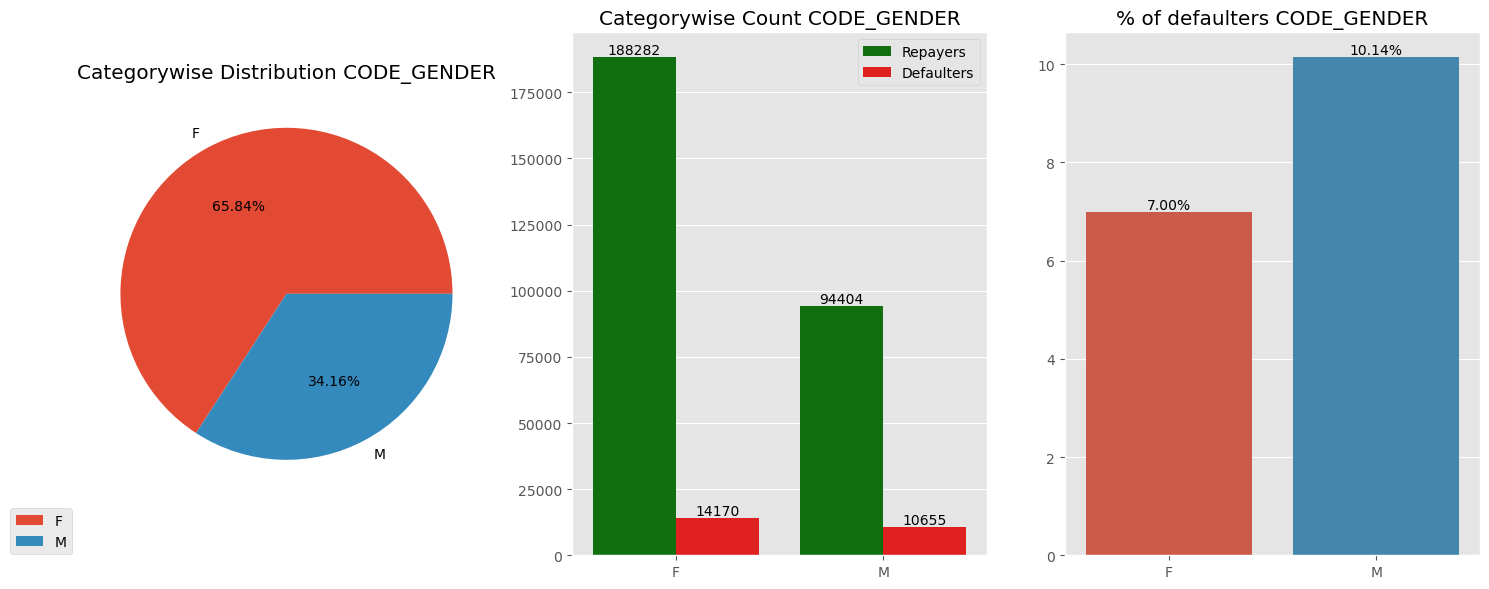

In [82]:
plt.figure(figsize=(15,6))
Uni_BivarCat_plots("CODE_GENDER",pie=True, xrot=0)
plt.show()

Note:
* the number of female customers is almost double than number of male customers still the chances of male defaulting on a loan is higher than that of female.
* possibility of male defaulting on a loan = apprx 10%
* possibility of female defaulting on a loan = apprx 7%


#### 3) FLAG_OWN_CAR

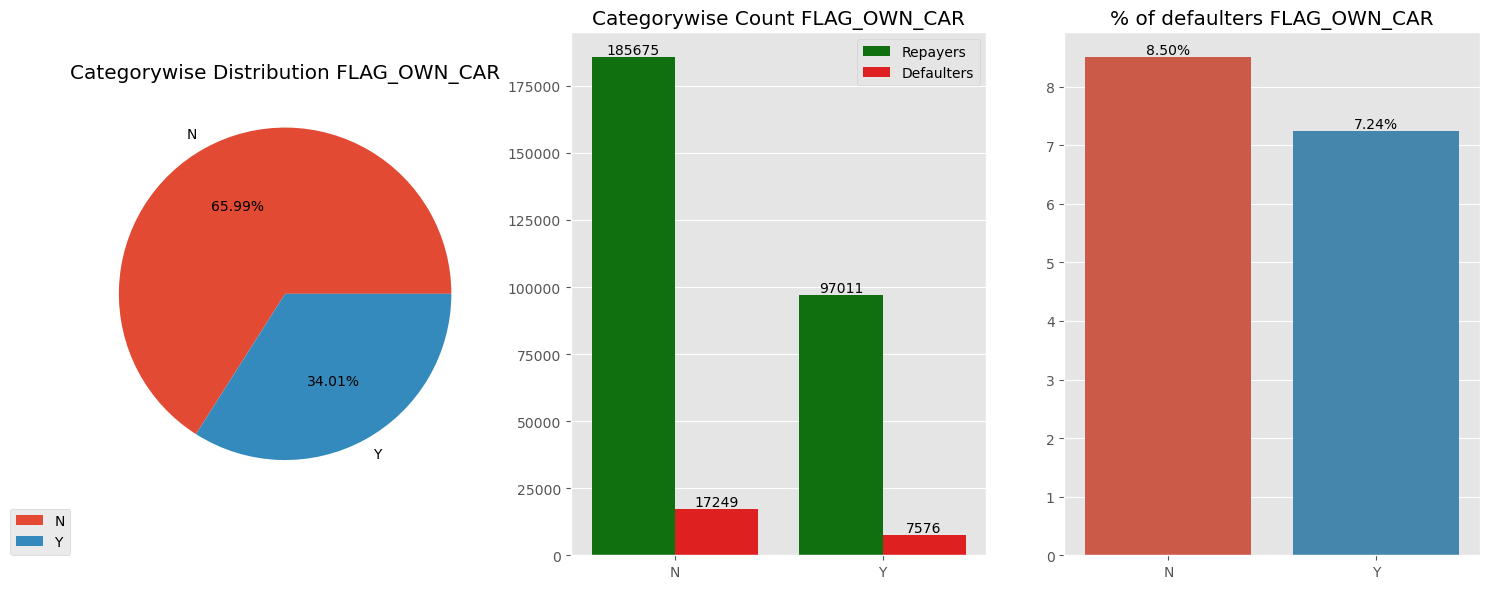

In [83]:
plt.figure(figsize=(15,6))
Uni_BivarCat_plots("FLAG_OWN_CAR",pie=True, xrot=0)
plt.show()

- Almost 2/3 rd of the customer base does not own a car.
- Although not much significant, but car owners have lesser chance of dafaulting than customers who does not own one.

#### 4) FLAG_OWN_REALTY    

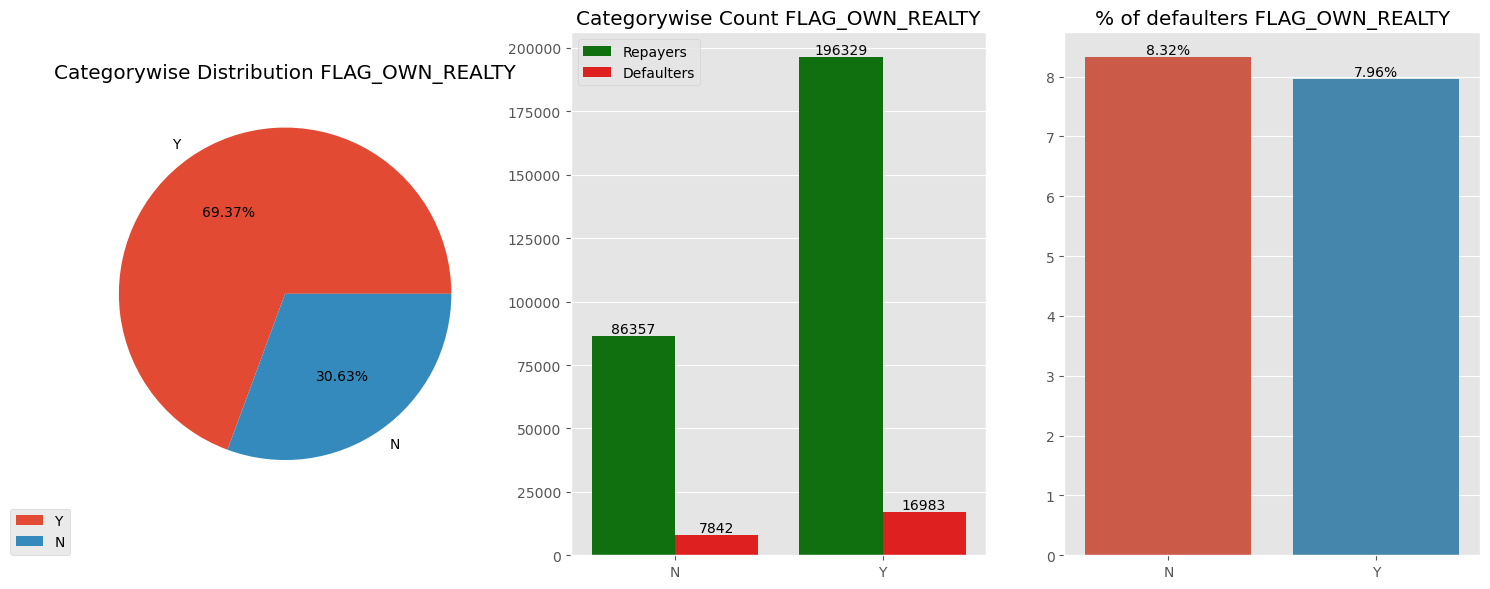

In [84]:
plt.figure(figsize=(15,6))
Uni_BivarCat_plots("FLAG_OWN_REALTY",pie=True, xrot=0)
plt.show()

Note:
* Even though the customers who own realty are more than double the customers who does not own realty, there is no significant difference between the defaulter percentage. So, owning realty and defaulting are not correlated.

#### 5) FLAG_DOCUMENT_3

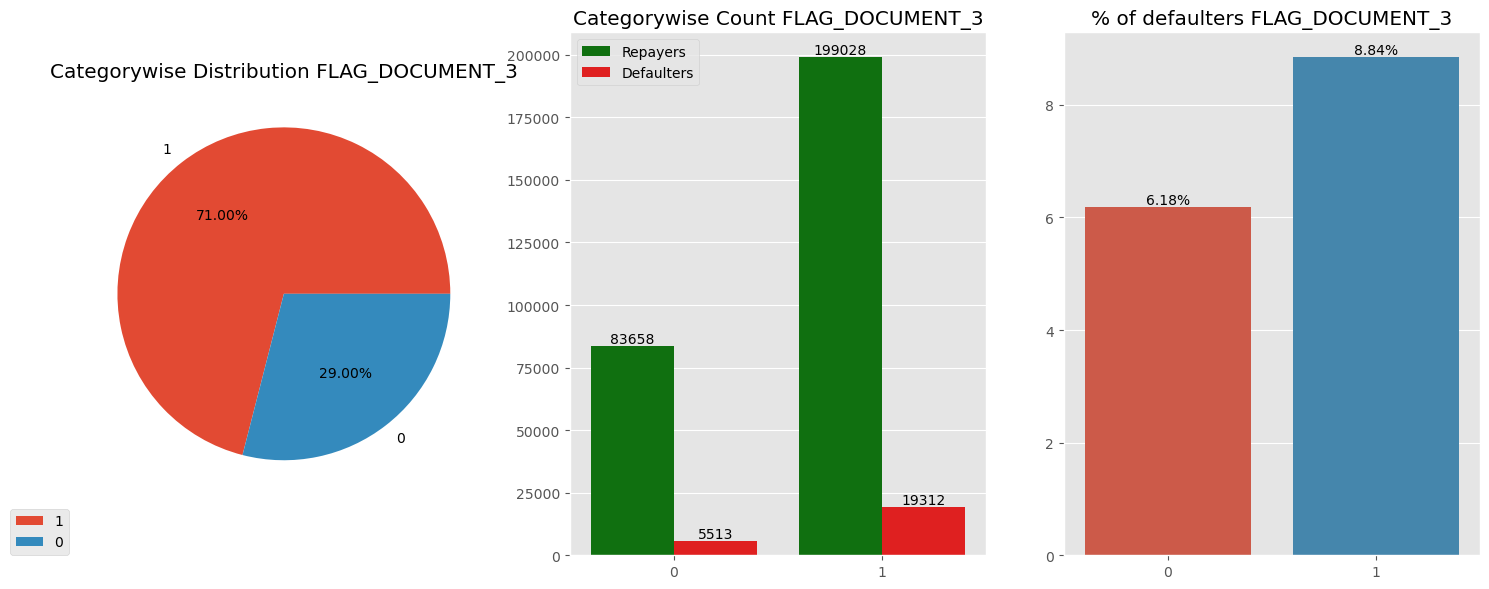

In [85]:
plt.figure(figsize=(15,6))
Uni_BivarCat_plots("FLAG_DOCUMENT_3",pie=True, xrot=0)
plt.show()

- If the customer does not provide doc_3 then he/she is less likely to default.
- If the customer provides doc_3 then he/she is 43% more likely to default as compared to not submitting doc_3.
- 71% of the customers have provided document 3, so in general, document 3 must be some kind of mandatory document for the customers who might not have strong credit background.

#### 6) NAME_TYPE_SUITE

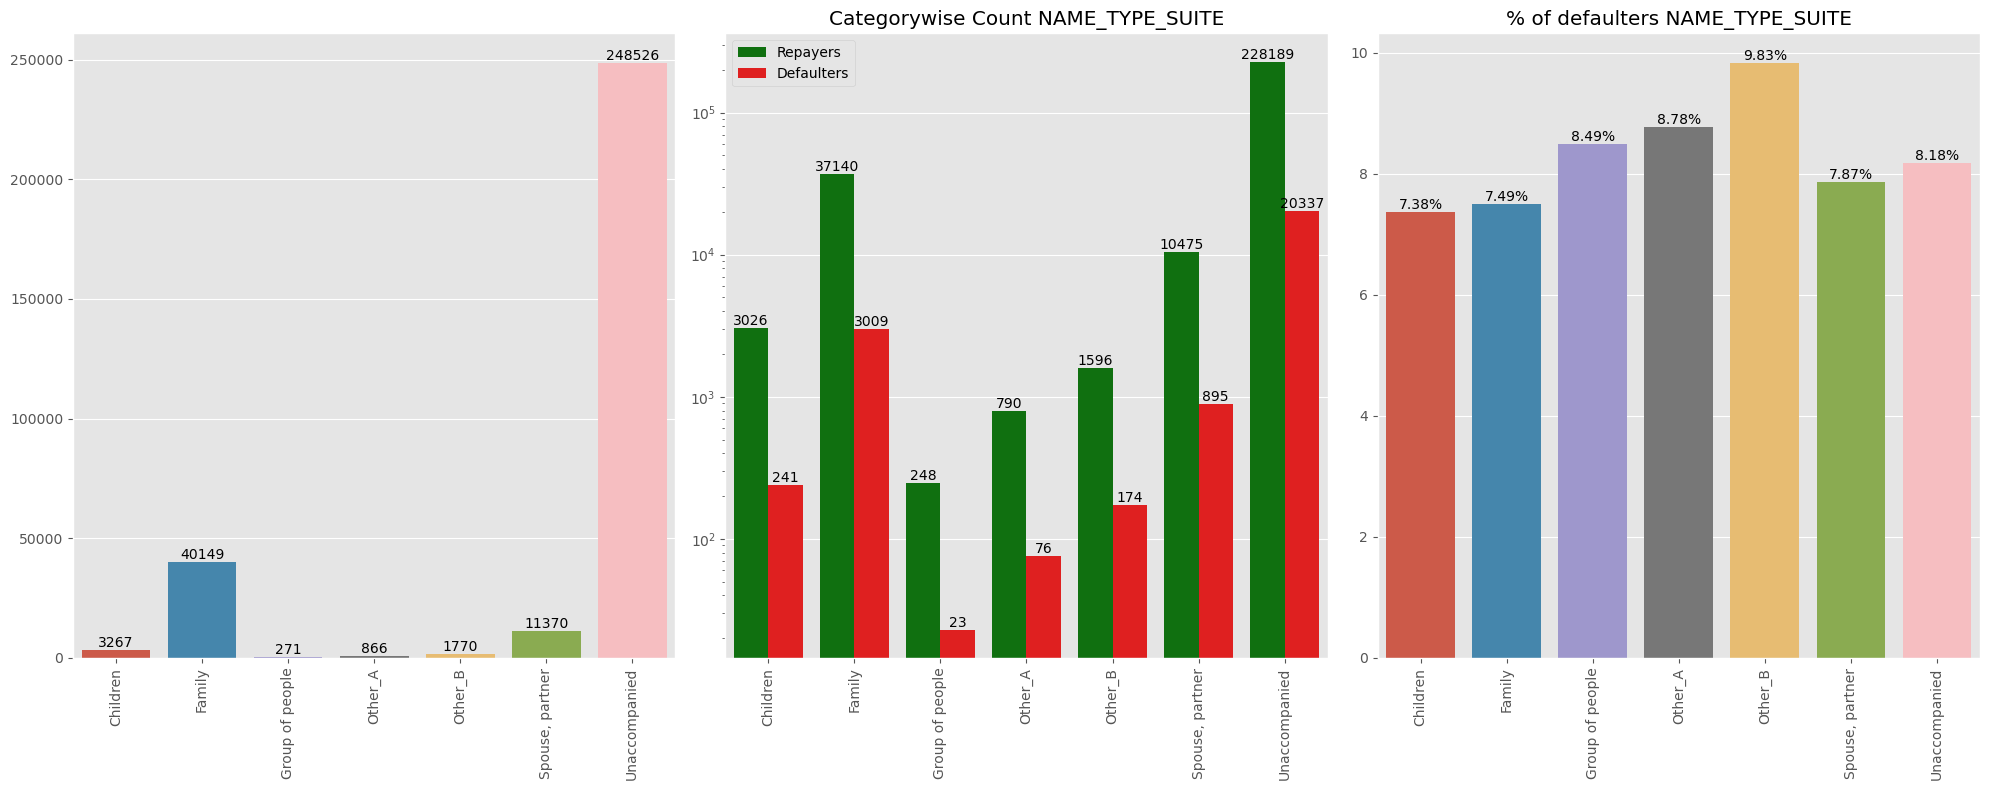

In [86]:
plt.figure(figsize=(20,8))
Uni_BivarCat_plots("NAME_TYPE_SUITE",xrot=90,pie=False,yrot=0,ylog=True)
plt.show()

Note:
- Almost all the customers are falling in approx 7-10 % defalut rate whether they are accompnied by someone or not.
- NAME_TYPE_SUITE does not have strong correlation with default rate.
- Still, it can be noted that the customers accoumpanied by Children are least likely to default(approx 7.4%)
- The customers accoumpanied by Other_B are most likely to default(approx 10%)

#### 7) NAME_INCOME_TYPE

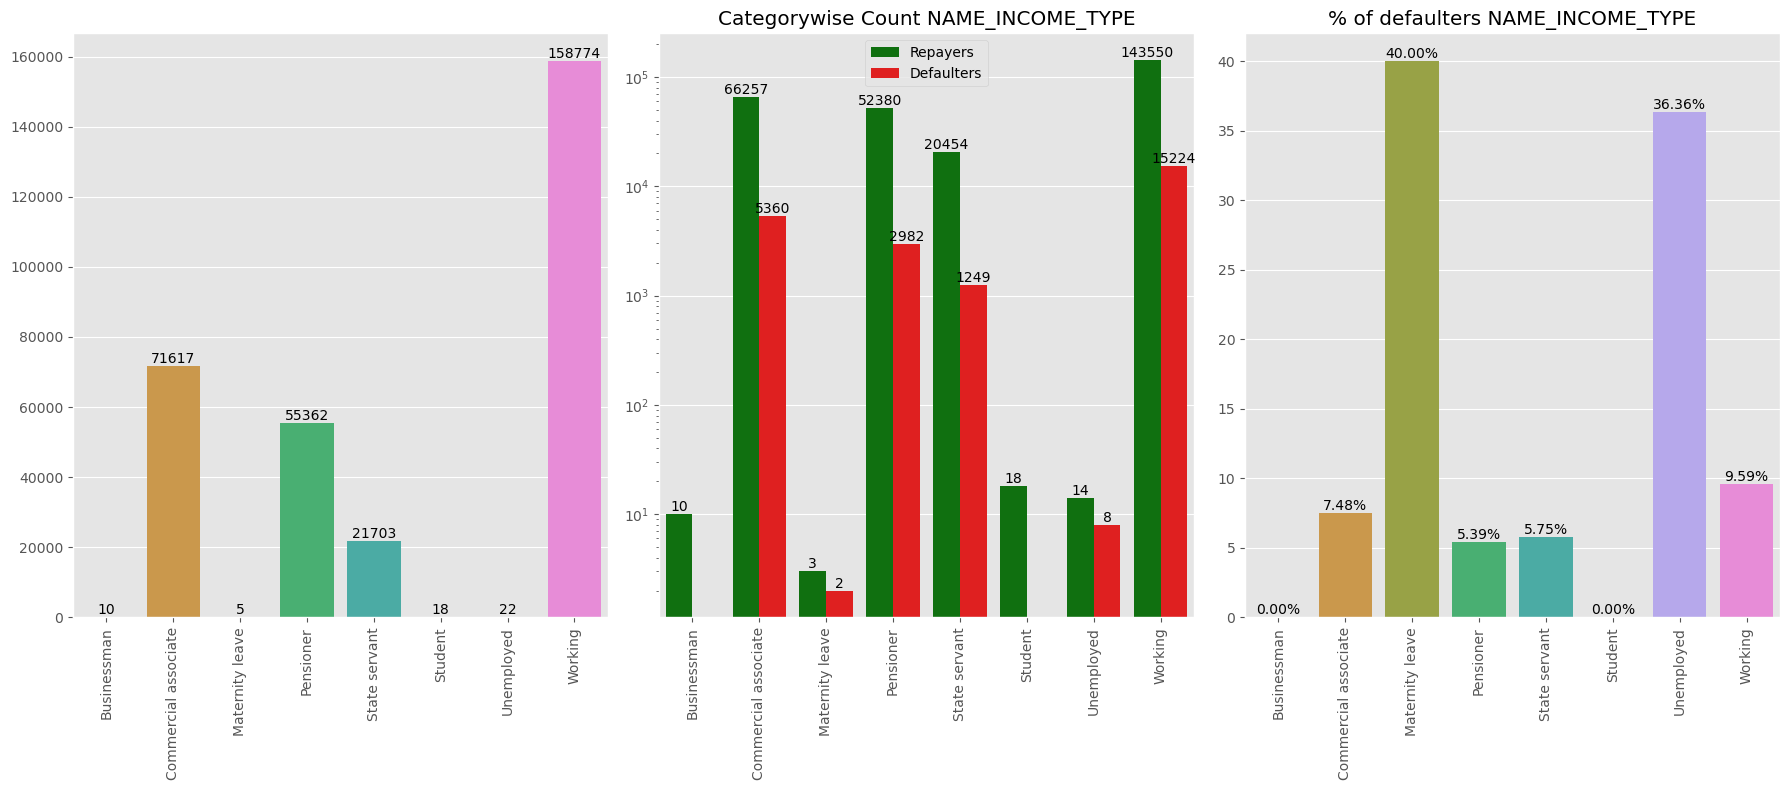

In [87]:
plt.figure(figsize=(18,8))
Uni_BivarCat_plots("NAME_INCOME_TYPE",pie=False, xrot=90,yrot=0,ylog=True)
plt.show()

Note:
* It is least risky for the bank to give loan to businessman and students they have 0% default rate.
* The people who are unemployed have the second highest default rate
* Commercial associates,pensioner,state servant & working category fall under average rate of defaluting.
* the customers who are on Maternity leave have the highest possibility of defaulting. But, this cannot be generalised as there are not enough records to prove the same.

#### 8) NAME_EDUCATION_TYPE            

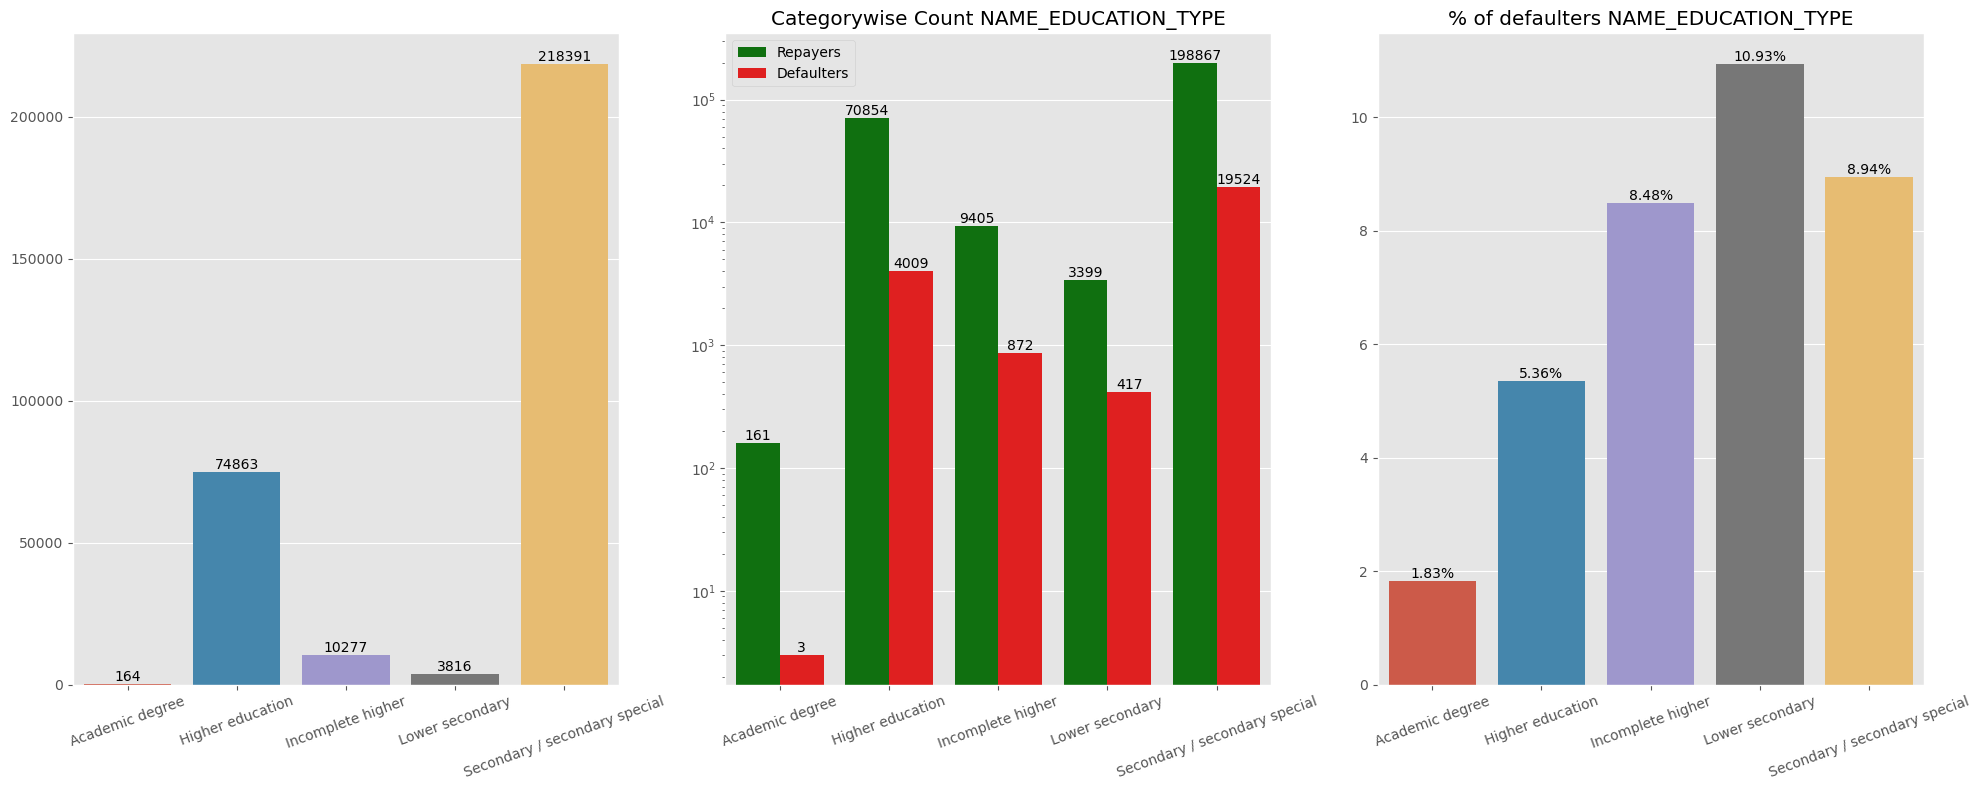

In [88]:
plt.figure(figsize=(20,8))
Uni_BivarCat_plots("NAME_EDUCATION_TYPE",pie=False,xrot=20,ylog=True)
plt.show()

Note:
* Customers with academic degree have lowest rate of defaulting but the count is quite less as comparted to other categories.
* Lower secondary category has highest default rate (around 11%).
* seconday/secondary special have second highest default rate. they also contribute to the highest count of customers, so overall defaulting rate is majorly affected by this category.
* To reduce the default rate, bank should focus on Incomplete higher, Lower secondary & seconday/secondary special category customers as they have defaulting rate above avg(approx 8 %)

#### 9) NAME_FAMILY_STATUS

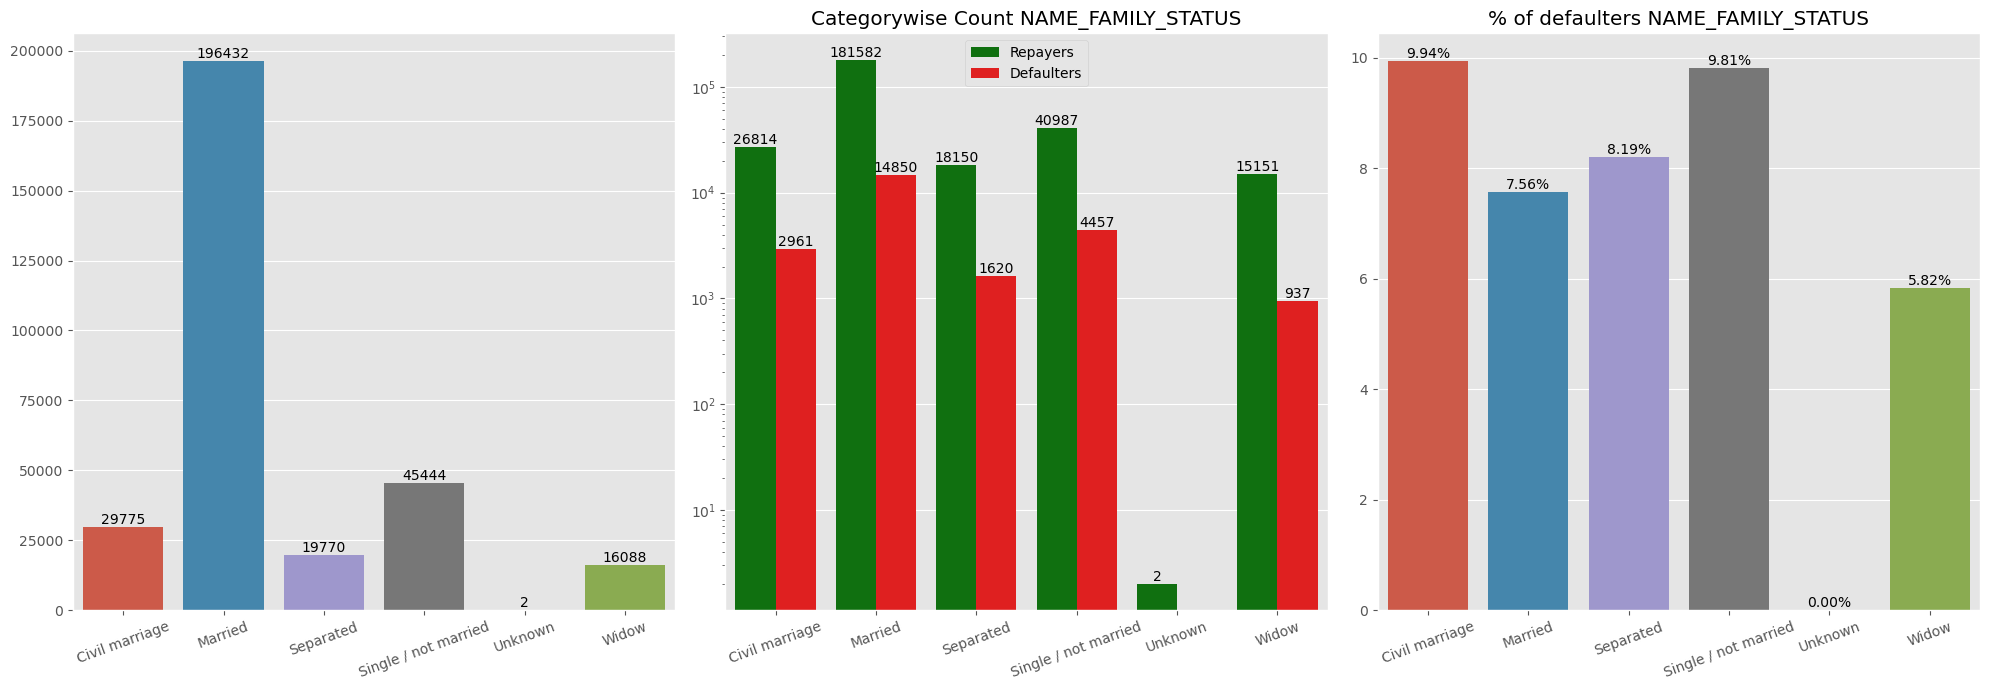

In [89]:
plt.figure(figsize=(20,7))
Uni_BivarCat_plots("NAME_FAMILY_STATUS",pie=False,xrot=20,ylog=True)
plt.show()

Note:
(Ignoring the Unknown category)

* Majority of customers are married with average default rate, around 7.5%. Reducing the default rate in this category would greatly reduce the overall default rate.
* Cutomers who fall under civil marriage & single/not married category have the highest default rate and they also contribute to apprx 25% customers, so their default rate has significant impact on the overall default rate.
* widows have the lowerst default rate but has quite less contribution in the overall count of customers.

#### 10) NAME_HOUSING_TYPE

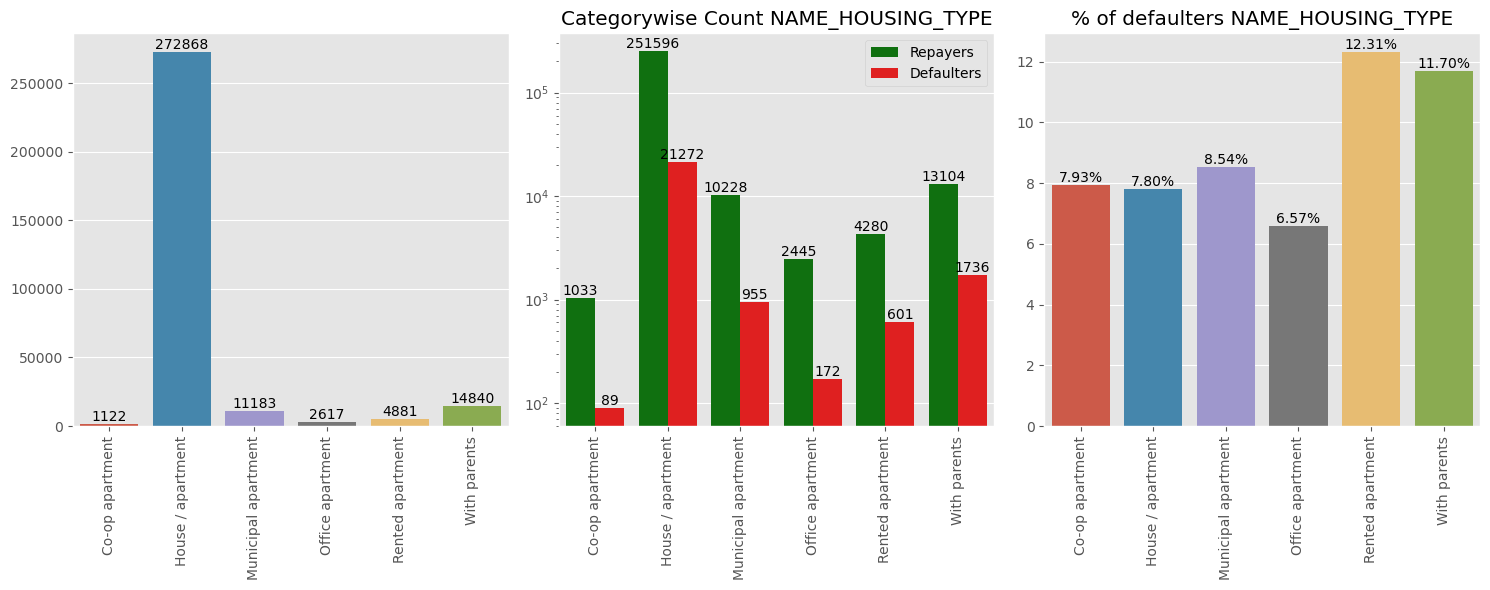

In [90]:
plt.figure(figsize=(15,6))
Uni_BivarCat_plots("NAME_HOUSING_TYPE",pie=False,xrot=90,ylog=True)
plt.show()

Note:
* Majority of customers have their own house/apartment and they have avg default rate.
* The customers who have an office apartment are least likely to default as compared to other categories.
* The customers who have rented an apartment are most likely to default(approx 12%) followed by the customers who live with their parents(approx 11%)

#### 11) OCCUPATION_TYPE

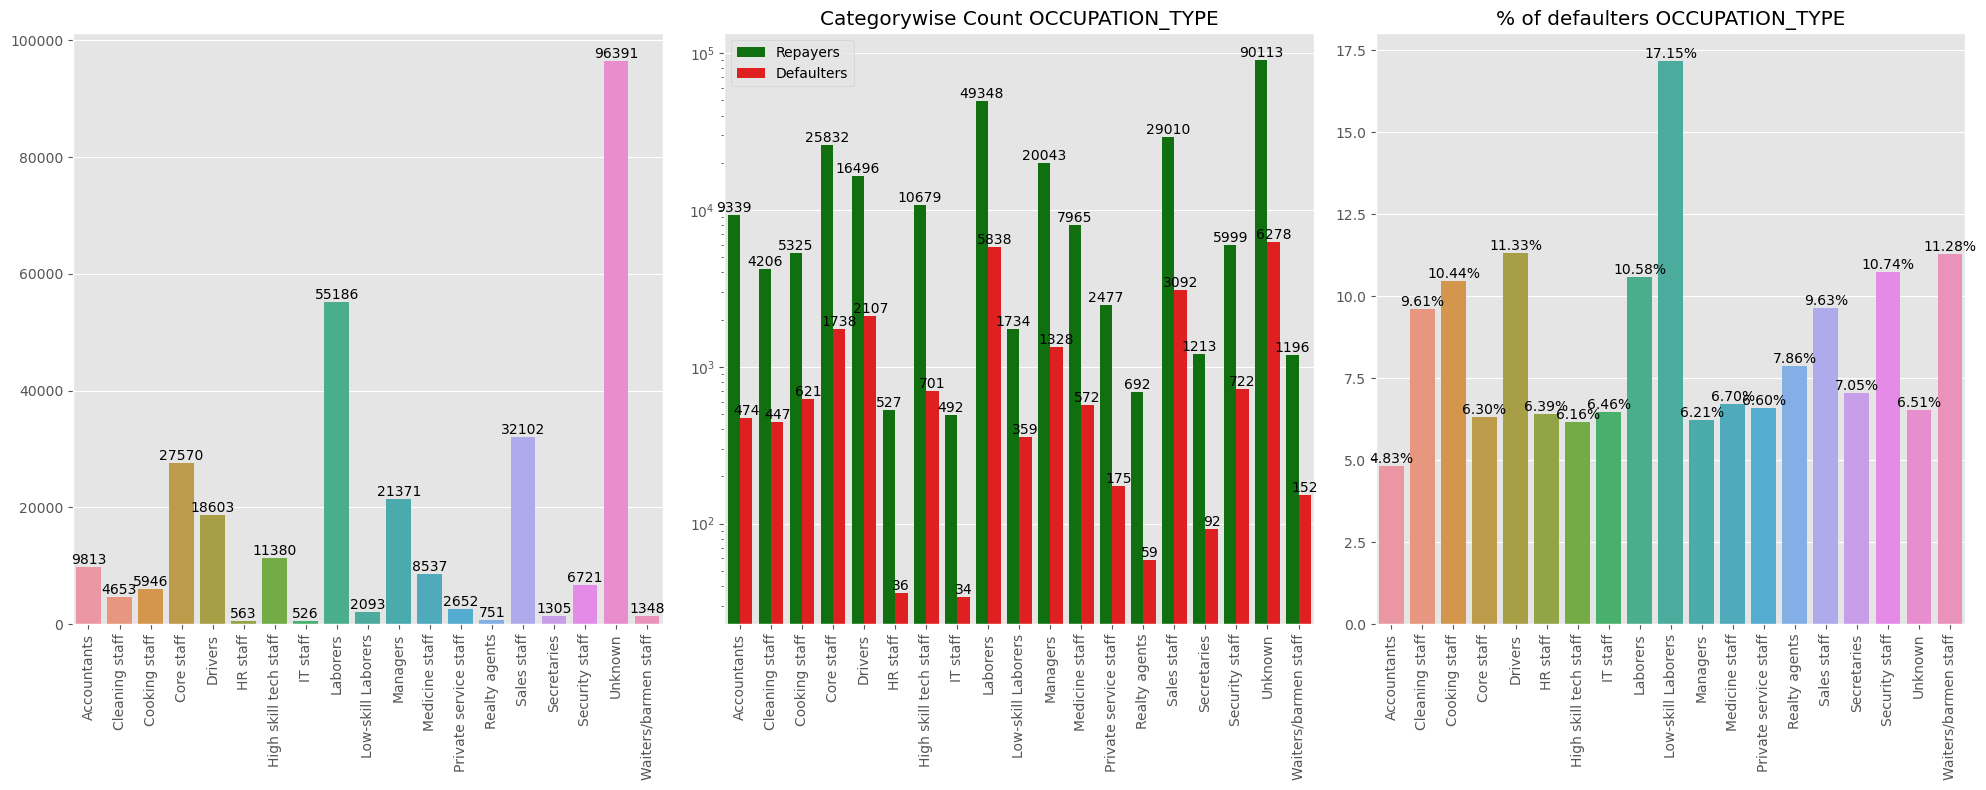

In [91]:
plt.figure(figsize=(20,8))
Uni_BivarCat_plots("OCCUPATION_TYPE",pie=False,xrot=90,ylog=True)
plt.show()

Note: (ignoring the Unknown category)
* Low-skilled Laborers have the highest defaulting rate (approx 17%) where as accountants have lowest defaulting rate (approx 5%).

* Laborers contribute to highest count of customers with 10.6 % defaulting rate

#### 12) CNT_FAM_MEMBERS       

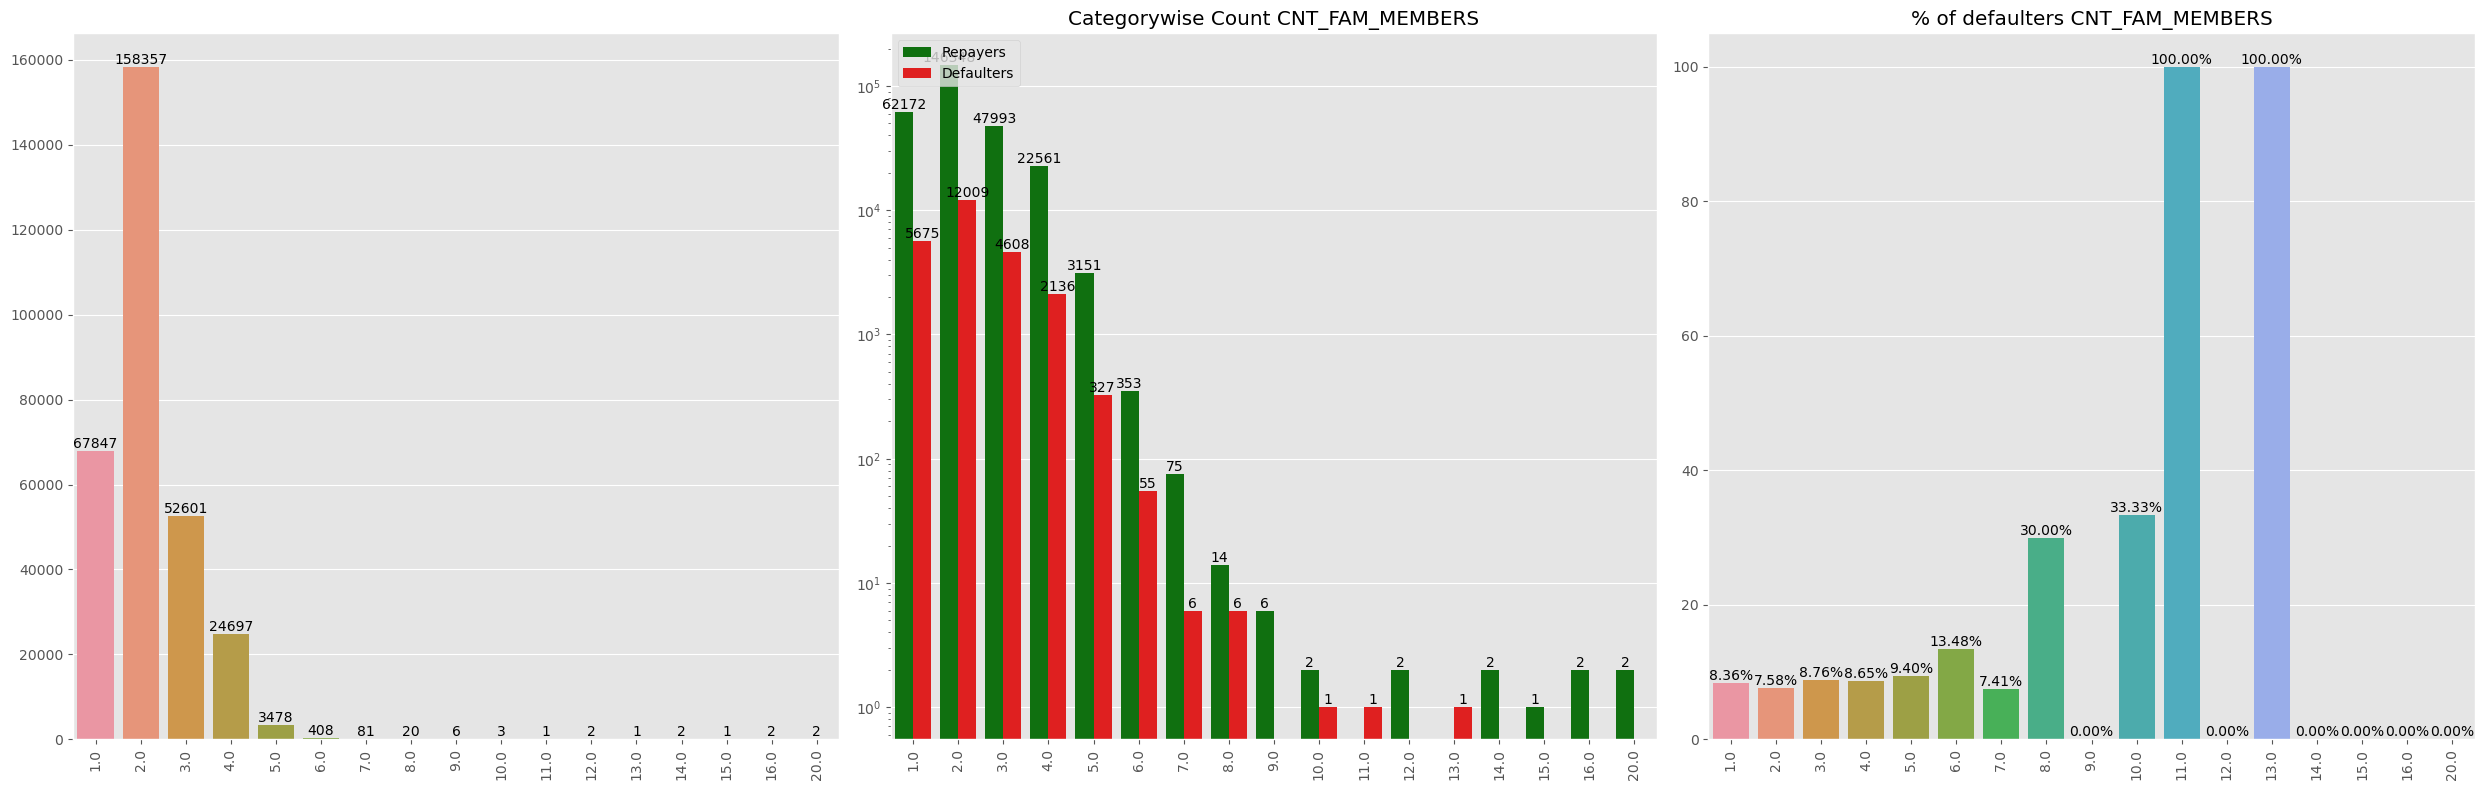

In [92]:
plt.figure(figsize=(25,8))
Uni_BivarCat_plots("CNT_FAM_MEMBERS",pie=False,xrot=90,ylog=True)
plt.show()

Note:
* Almost half of the total customers have 2 family members with lowest defaulting rate.
* Almost 98% customers have 4 or less than 4 family members.
* If we see the bar plot , we can say that number of family members is directly propotional to possibility of defaulting. i.e if family members increases the rate of defaulting also increases and vice-versa. This can be very much dependent on specific customer case as we can observe that for highest number of family members (i.e. 20) the default rate is zero. But, the interpretation holds true from family members 1 to 6 which is usually the practical scenario.
* Its better to take extra pre-causions while providing loan to customers with family members >=5, because the defaulting rate starts to increase considerably after 5 members.

#### 14) CNT_CHILDREN

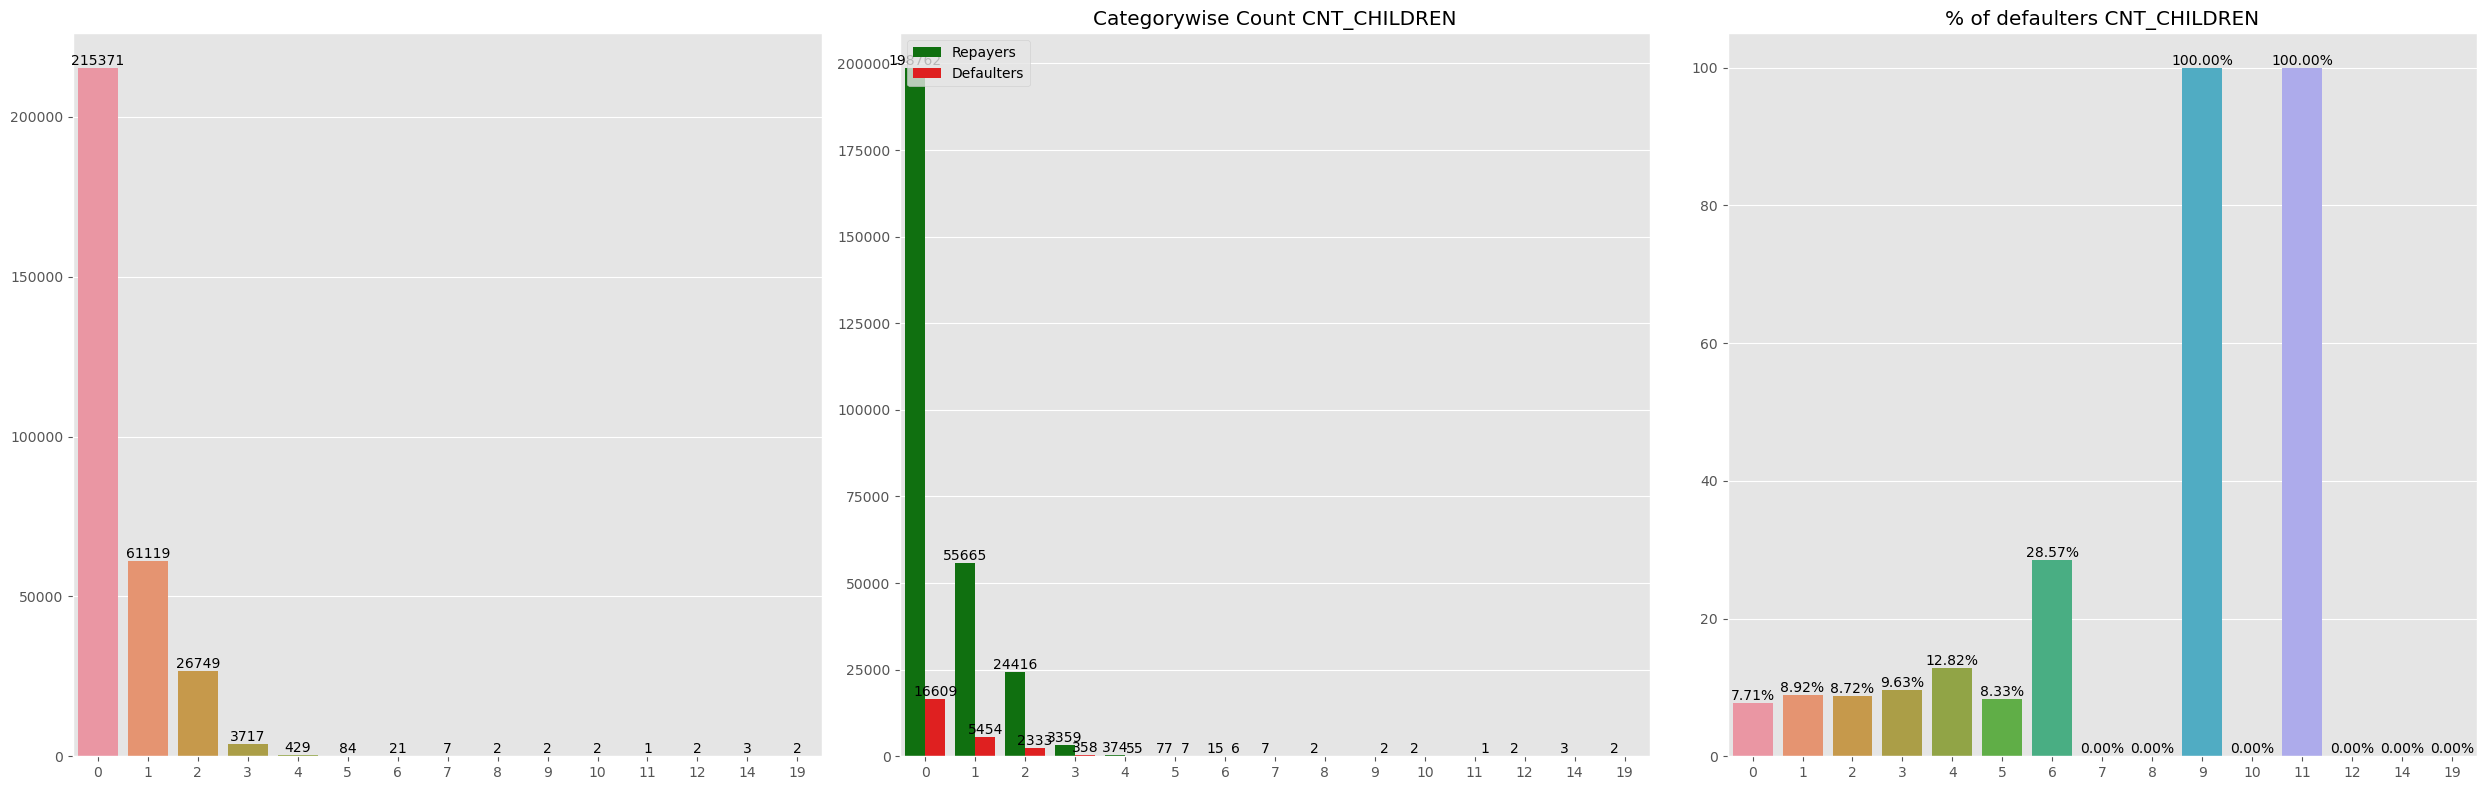

In [93]:
plt.figure(figsize=(25,8))
Uni_BivarCat_plots("CNT_CHILDREN",pie=False)
plt.show()

- Majority of customers does not have any child
- It can be roughly seen that as number of children increases the default rate also increases.
- This variable somewhat follows similar trend as CNT_FAM_MEMBERS.

#### 15) WEEKDAY_APPR_PROCESS_START

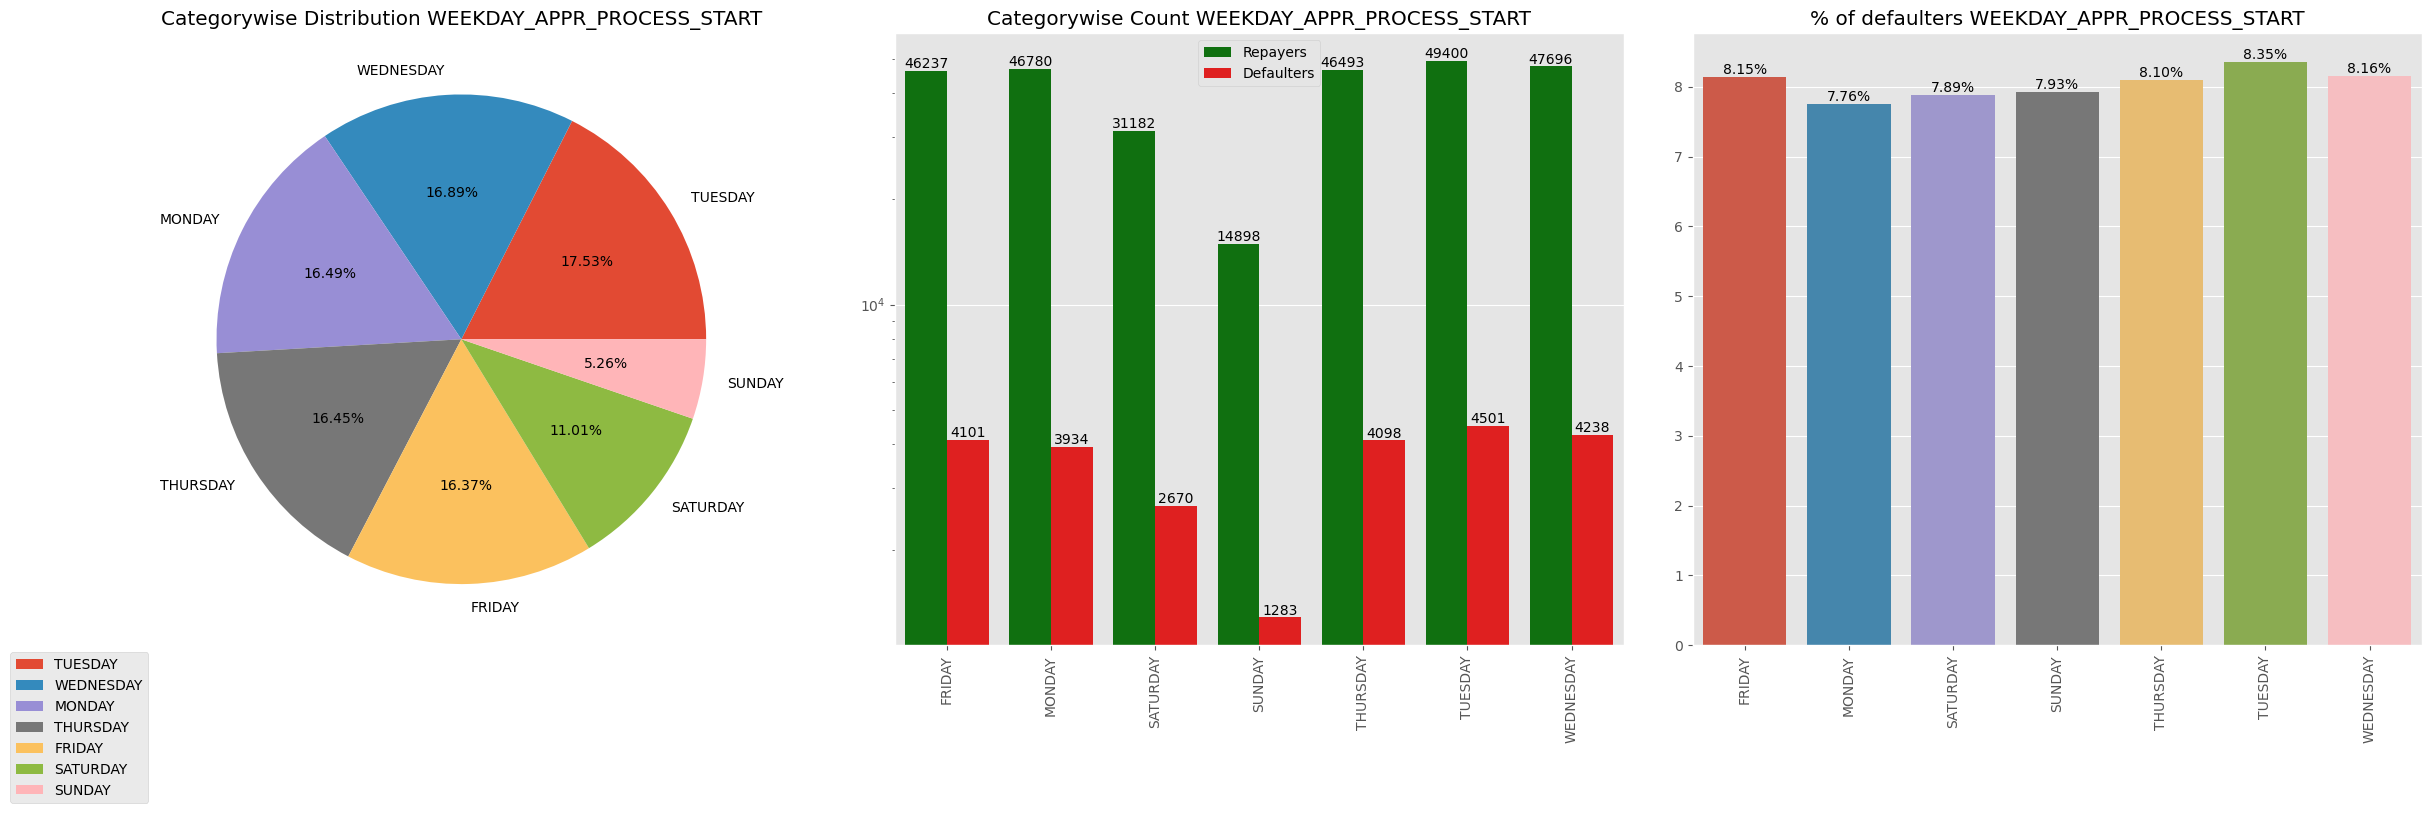

In [94]:
plt.figure(figsize=(25,8))
Uni_BivarCat_plots("WEEKDAY_APPR_PROCESS_START",pie=True,xrot=90,ylog=True)
plt.show()

- On week days the number of applications processed are more than on weekends which is obvious.
- But the rate of default is almost similar irrespective of the day.

#### 16) ORGANIZATION_TYPE

As this variable has more number of categories, lets analyze each plot individully

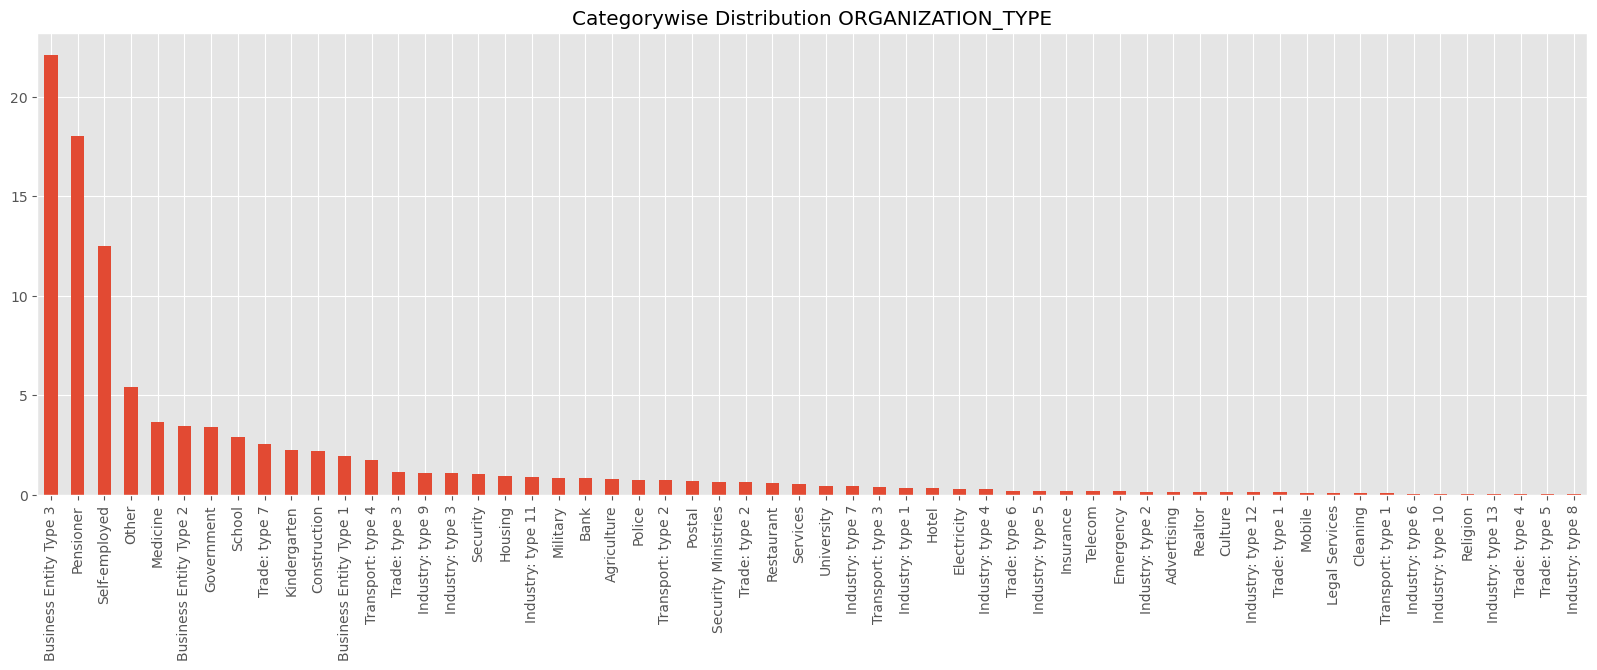

In [95]:
# 1) Count of customers organisation wise 
plt.title("Categorywise Distribution ORGANIZATION_TYPE")
(appdata1["ORGANIZATION_TYPE"].value_counts(normalize=True)*100).plot.bar(figsize=(20,6))
plt.show()

Note:
* Highest number of clients opting for loan are from Business Entity Type 3 followed by Pensioner & Self-Employed.
* Lowest number of clients opting for loanare from Industry type 8.

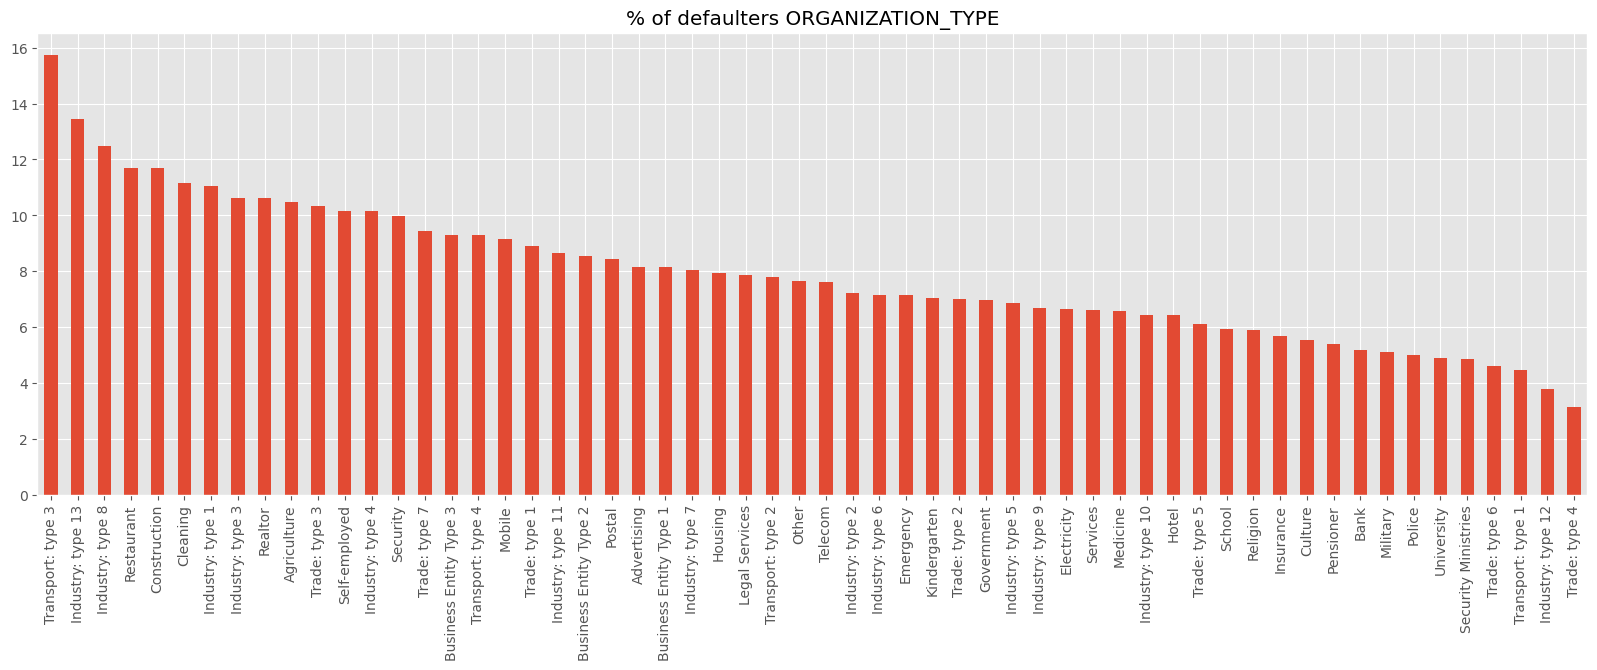

In [96]:
# 2) Percentage of defaulters categorywise
plt.figure(figsize=(20,6))
(appdata1.groupby("ORGANIZATION_TYPE").mean()["TARGET"]*100).sort_values(ascending=False).plot.bar()
plt.xlabel(None)
plt.xticks(rotation=90)
plt.title("% of defaulters ORGANIZATION_TYPE")
plt.show()

Note:
* Transport: type 3 category has the highest number of defaulting rate(approx 15%) whereas Trade: type 4 has the lowest (approx 3%)

#### 17) AGE_CATEGORY

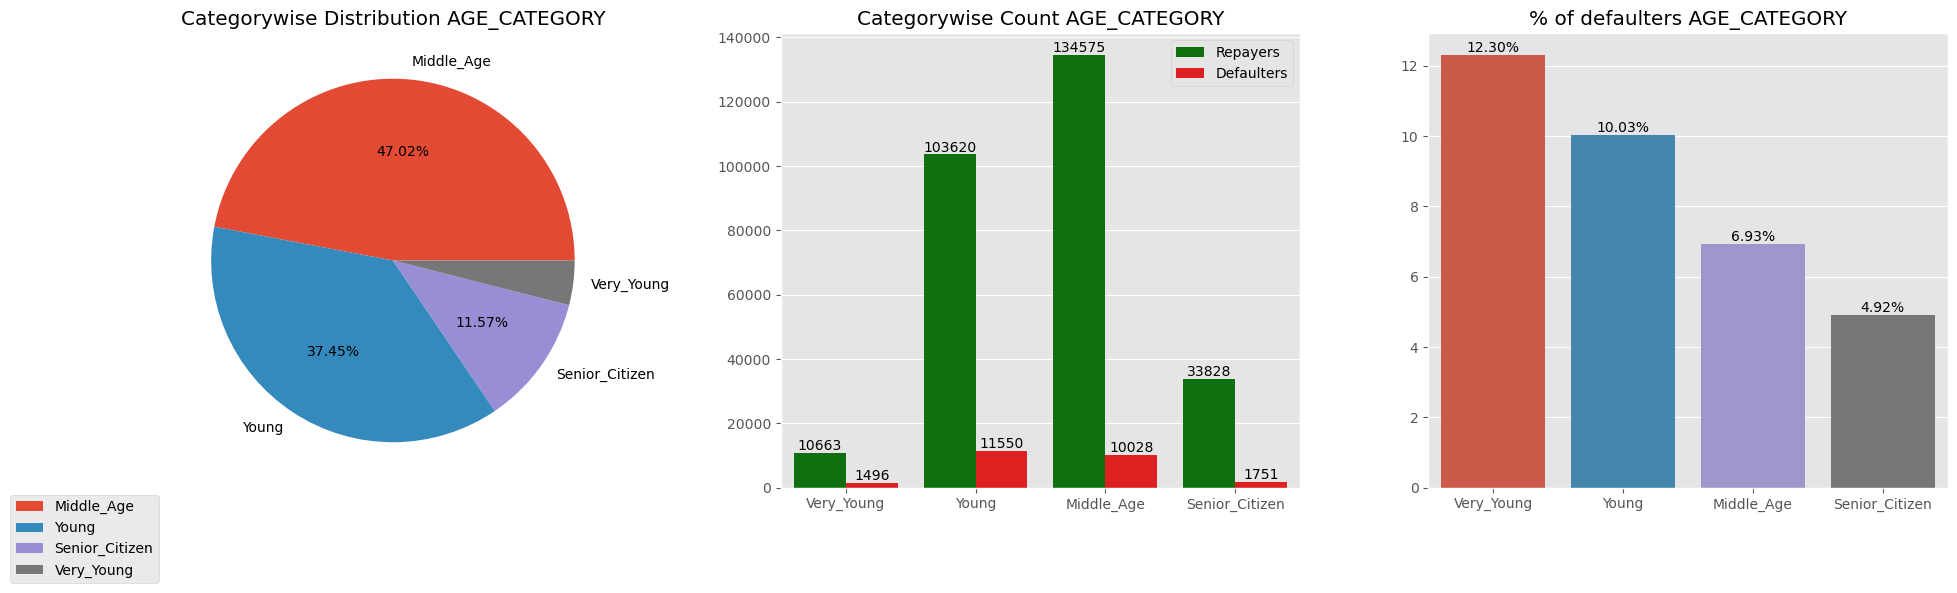

In [97]:
plt.figure(figsize=(20,6))
Uni_BivarCat_plots("AGE_CATEGORY",pie=True)
plt.show()

Note:
<!-- [20,25,40,60,100] -->
<!-- ['Very_Young','Young', 'Middle_Age','Senior_Citizen'] -->
* As age increases the possibility of defaulting decreases.
* Almost 50% customers belong to middle age category(40-60 years) who have default rate approx 7 %.
* Although very young customers(20-25 years) does not contribute much to the total count still they have the highest possibility of defaulting (>12%)
* Senior citizens are have lowest defaulting rate approx 5%.
* If we consider 2 categories, middle and young (25-60 years), they contribute to almost 85% of customers and have default rate in range 7 to 10 %. mojority of customers fall under this category.
* Young and middle age category affects the overall default rate.

#### 18) YEARS_EMPLOYED_CATEGORY

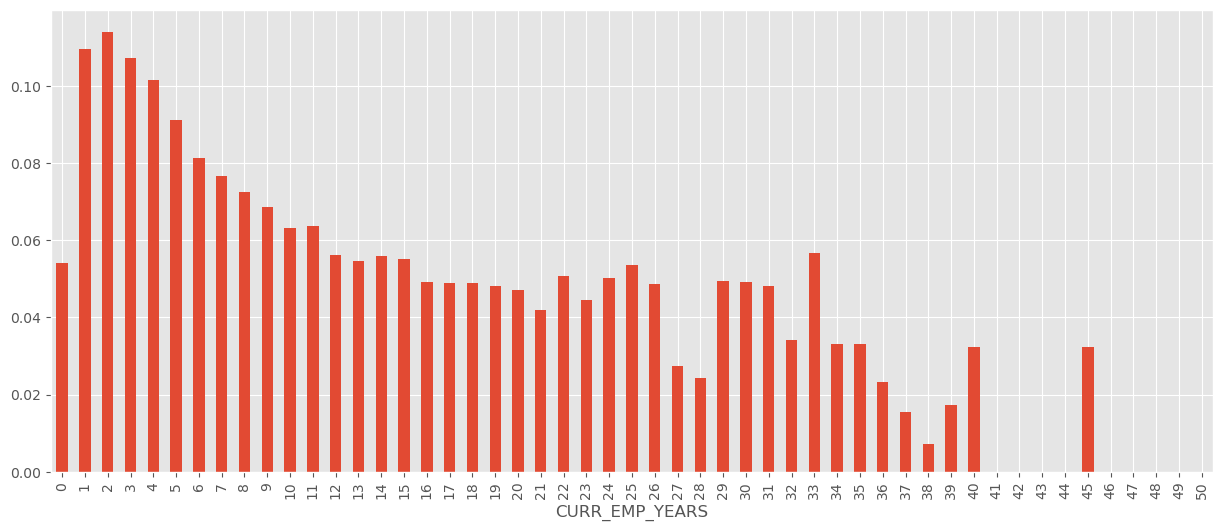

In [98]:
appdata1.groupby('CURR_EMP_YEARS')['TARGET'].mean().plot.bar(figsize=(15,6))
plt.show()

Note:
* It is clearly evident that the number of employment years is inversly proportional to the defaulting rate.so it is safer to give loan to customers with more years of work experience.

#### 19) AMT_INCOME_RANGE

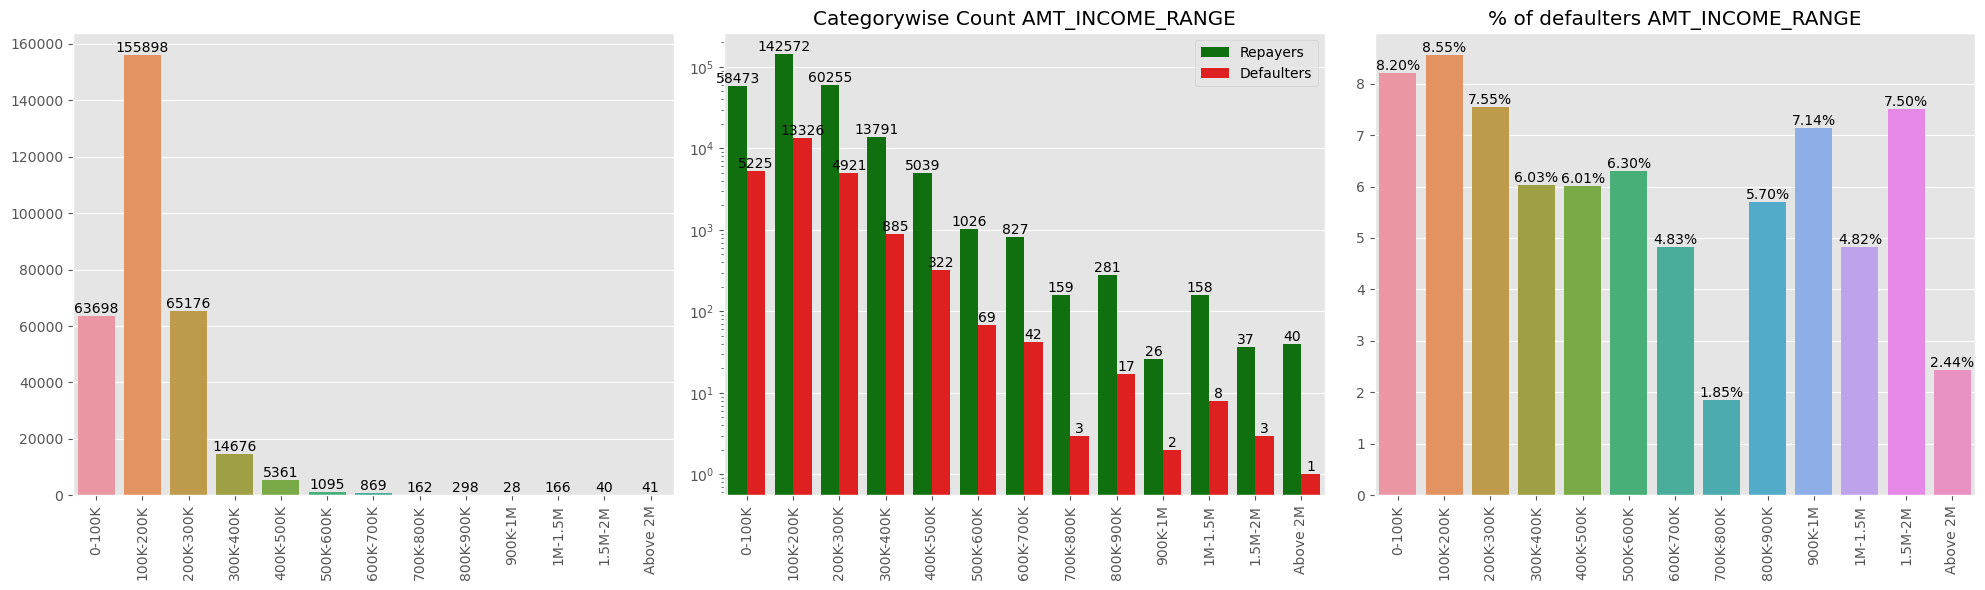

In [99]:
plt.figure(figsize=(20,6))
Uni_BivarCat_plots("AMT_INCOME_RANGE",pie=False,xrot=90,ylog=True)
plt.show()

Note:
* customers in income range 100-200k have the highest default rate around 8.5% and almost 50% customers belong to this category.
* customers in income range 700-800k have lowest default rate but the count is very less..
* we can roughly see that the number of defaulters as well as % default rate decreases as the salary bracket increases and this trend is observed till 700-800K income category.

#### 20) AMT_CREDIT_RANGE

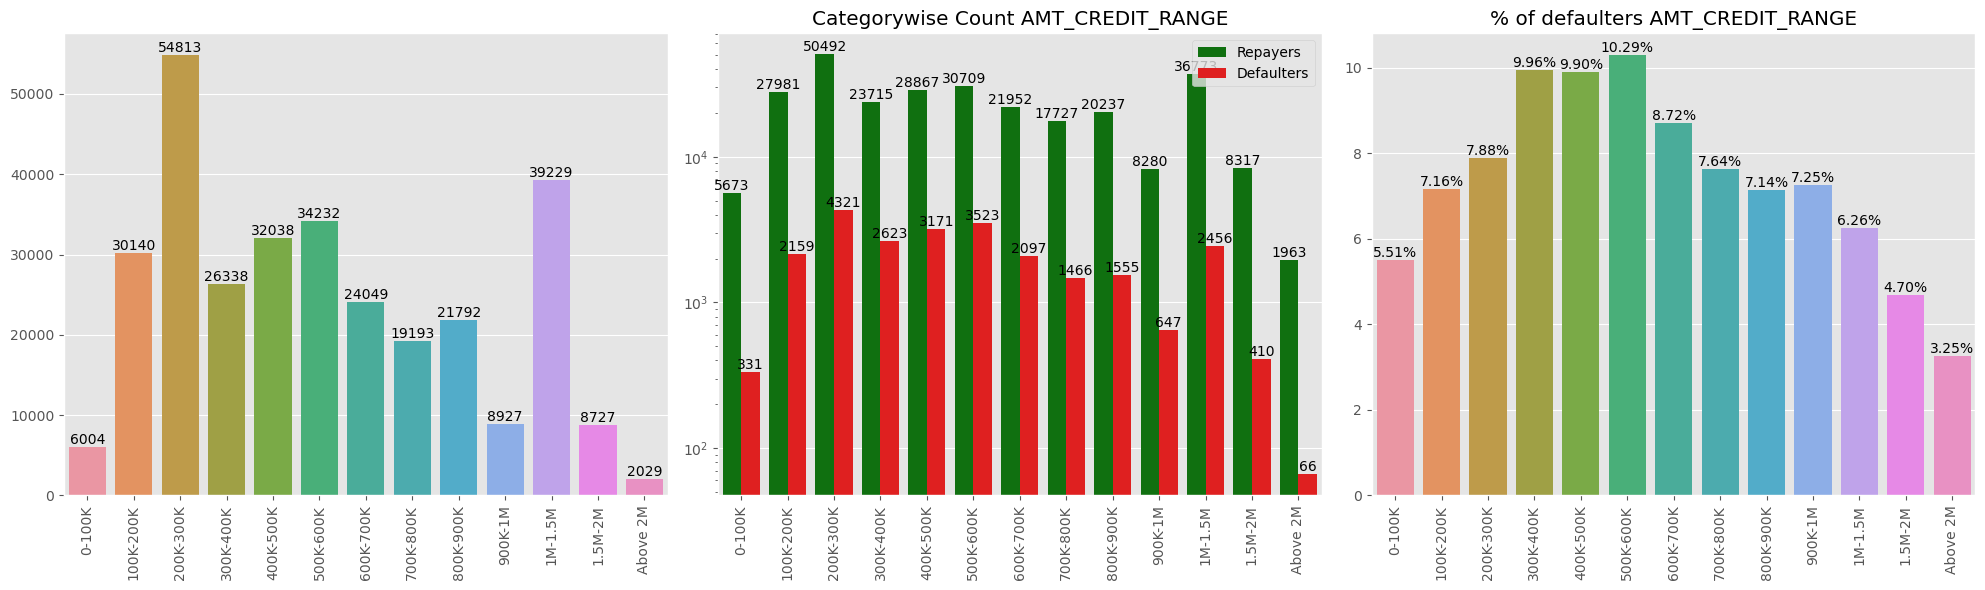

In [100]:
plt.figure(figsize=(20,6))
Uni_BivarCat_plots("AMT_CREDIT_RANGE",pie=False,xrot=90,ylog=True)
plt.show()

Note:
* The number of customers borrowing amount 'Above 2M' is lowest and they also have lowest chances of defaulting.(3.25%)
* The customers from 500-600 K income category have highest chances of defaulting, same is the case with 300-400K, 400-500K & 600K-700K. Therefore, altogher, 300-700K income category is most likely to default.
* we can observe the the default rate increasing till income range around 500K and gradually decreasing for further income group. so we can say that customers with extreme income group are most likely to repay on time.

#### 21) AMT_GOODS_PRICE_RANGE

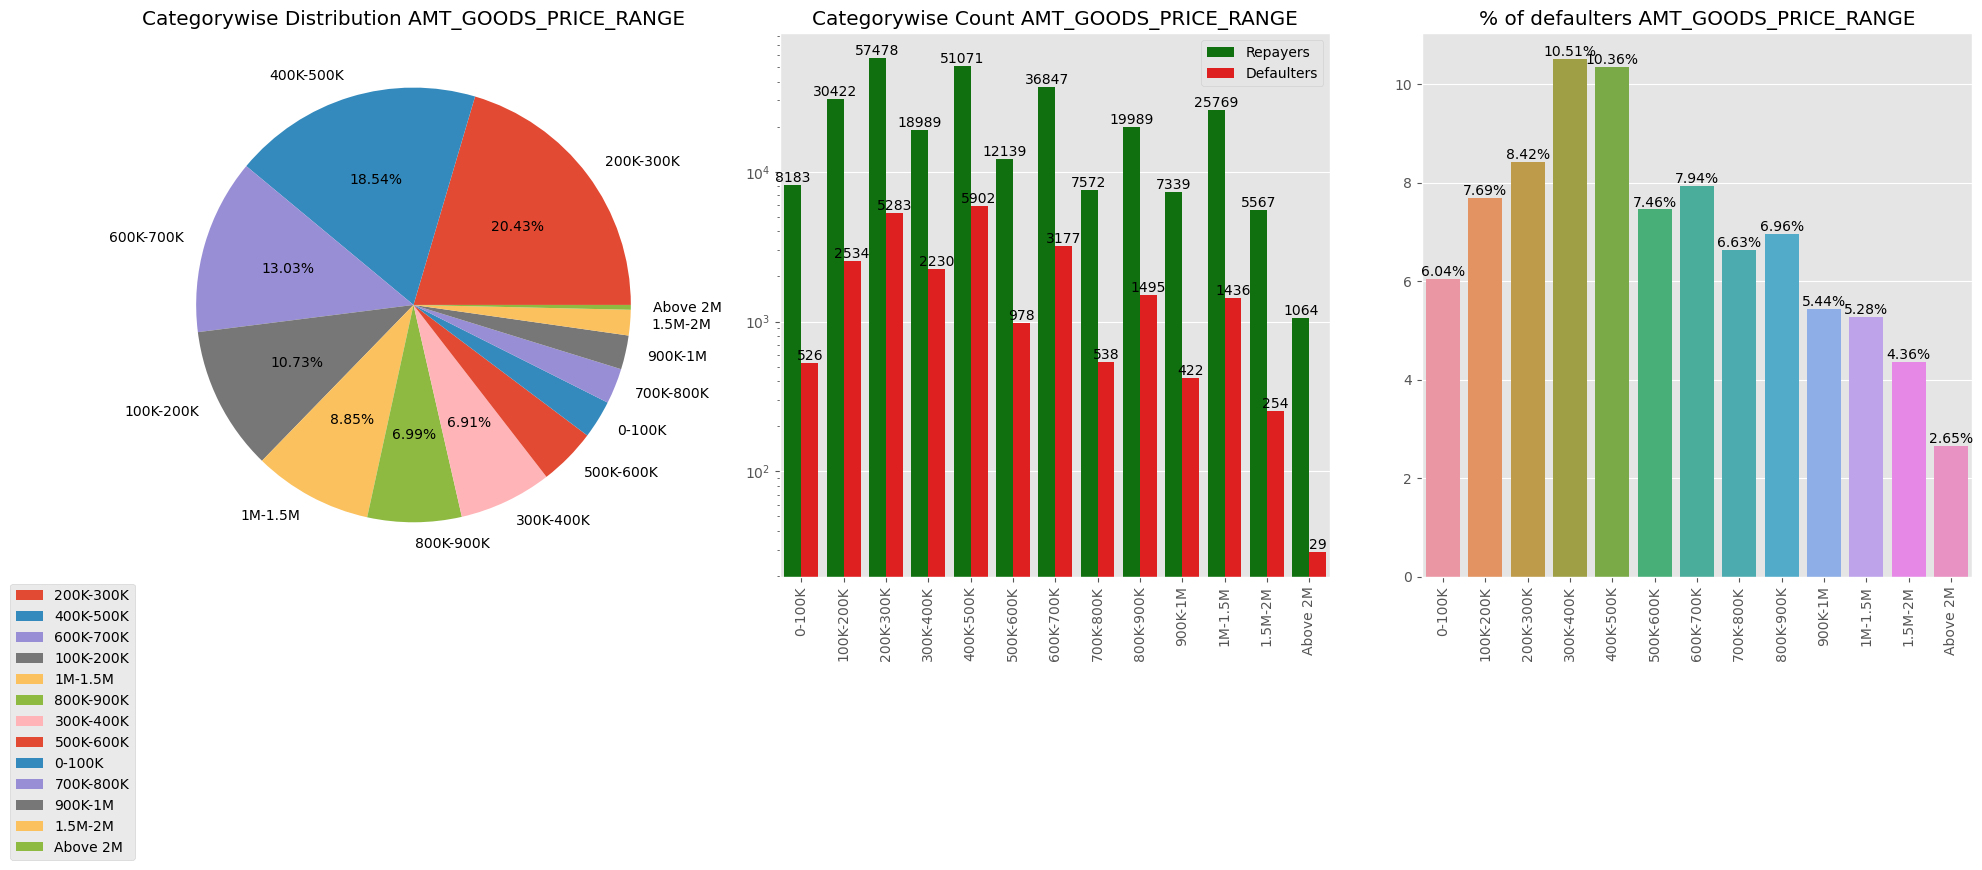

In [101]:
plt.figure(figsize=(20,8))
Uni_BivarCat_plots("AMT_GOODS_PRICE_RANGE",pie=True,xrot=90,ylog=True)
plt.show()

Note:
* from pie chart we can say that maximum number of customers opt for loan for purchase of goods in range 200-500K (~48%) and the chances of defaulting the loan is quite on higher side in this range i.e 8-10 % as compared to other goods price range.
* we can observe the similar trend as AMT_CREDIT_RANGE, the defaulter's rate increases till 400K and then roughly decreases for further increase in goods price.

### 3.3) Univariate  and Bivariate Analysis on Numerical data

In [102]:
print(num_cols)
print(len(num_cols))

['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'HOUR_APPR_PROCESS_START', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'CURR_EMP_YEARS']
22


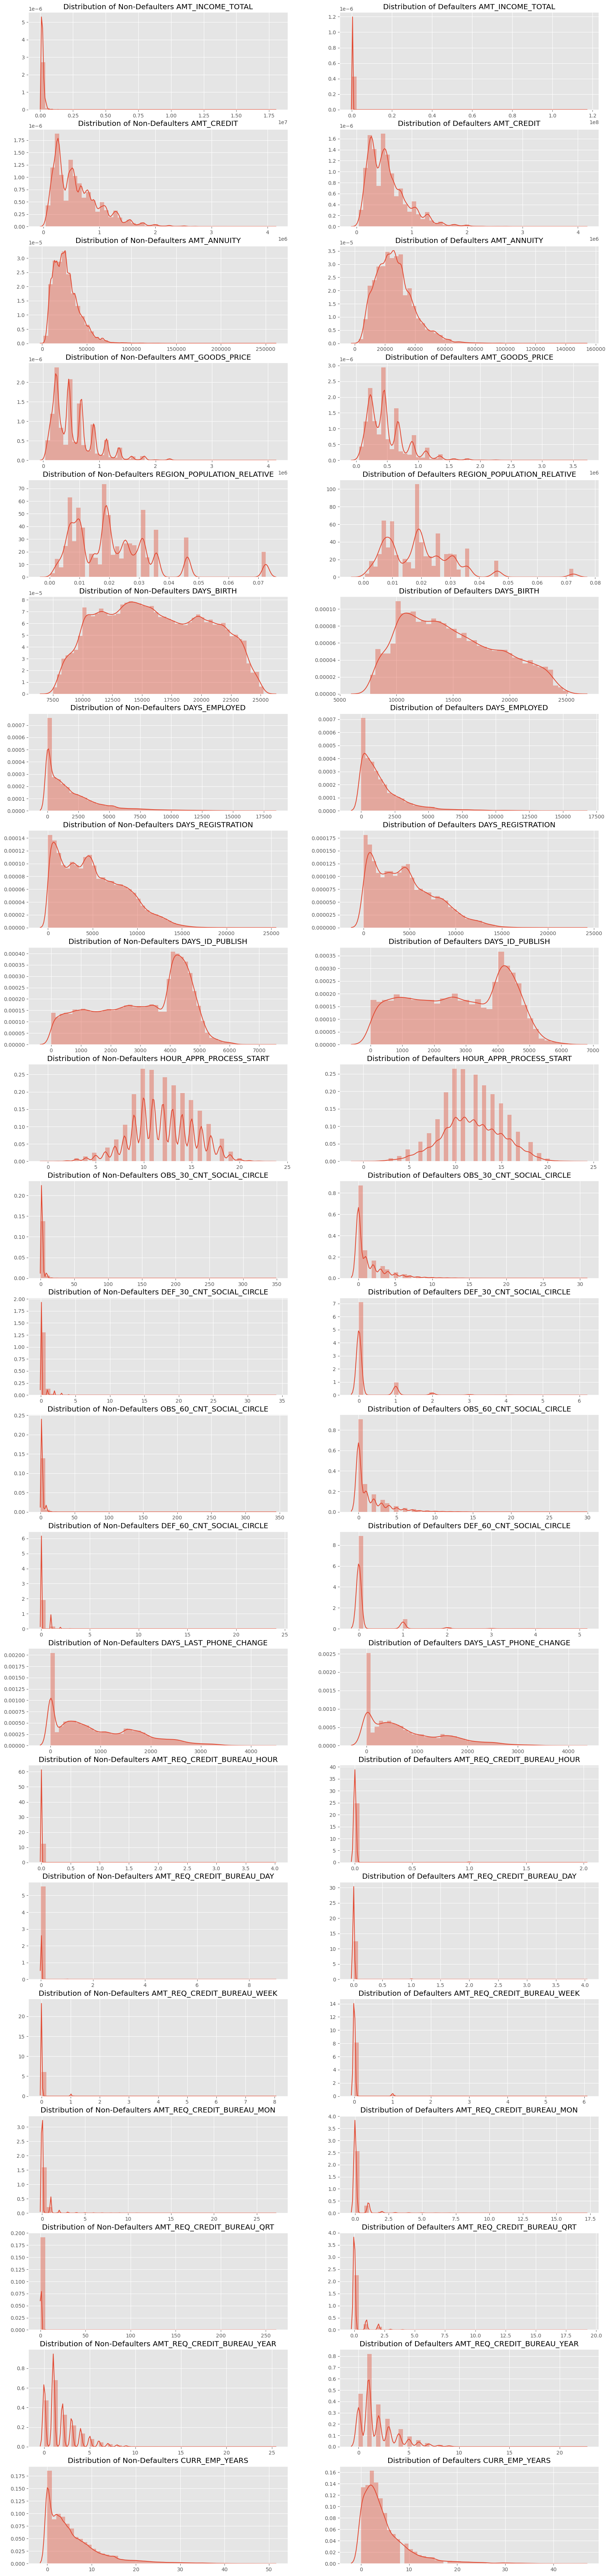

In [103]:
# Univariate

plt.figure(figsize=(20,90))
for i,j in zip(num_cols,range(1,len(num_cols)*2+1,2)):
    plt.subplot(22,2,j)
    sns.distplot(appdata1[appdata1.TARGET==0][i])
    plt.xlabel(None)
    plt.ylabel(None)
    plt.title("Distribution of Non-Defaulters"+" "+i)
    plt.subplot(22,2,j+1)
    sns.distplot(appdata1[appdata1.TARGET==1][i])
    plt.xlabel(None)
    plt.ylabel(None)
    plt.title("Distribution of Defaulters"+" "+i)
plt.show()

Note:
* By looking at the variablewise distribution of numerical data over defaulter and non-defaulter category, we can see that the data follows almost similar trend in both the classes(default and non-default).
* Only `DAYS_BIRTH` variable show some variation in trend, defaulter class have lesser number of customers, roughly falling in middle age and senior citizen. In case of Non-Defaulter's distribution, there is another peak between 12500 and 15000 after 1st peak at around 11000. In Defaulter's distribution, the trend is similar till 1st peak but the count keeps on decreasing after 12500 (approx 35 years). 
* It is evident that the chances of defaulting does not have any significant dependency on the numerical variables mentioned in the list num_cols.

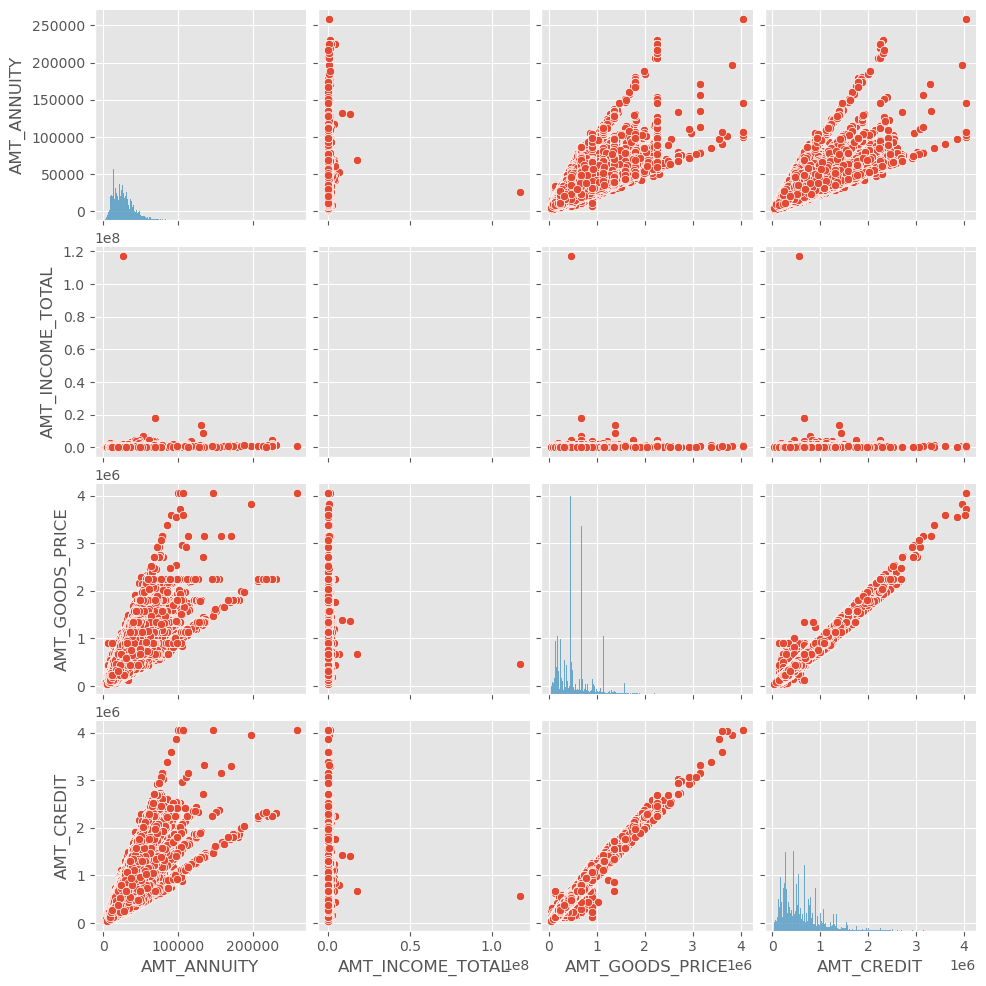

In [104]:
# Let's check the correlation between amt variables

sns.pairplot(appdata1[['AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'AMT_CREDIT']])
plt.show()

Note:
* AMT_CREDIT & AMT_ANNUITY(EMI) are directly proportional to each other with strong positive correlation
* AMT_CREDIT & AMT_GOODS_PRICE are directly proportional to each other with almost perfect positive correlation
* There is no correlation between AMT_INCOME_TOTAL and any of the other variable (amount variables).

In [105]:
categorical_cols = list(set(appdata1.columns.to_list())-set(num_cols)-set(['SK_ID_CURR','TARGET']))
print(categorical_cols)
print(num_cols)

['FLAG_OWN_CAR', 'AMT_CREDIT_RANGE', 'NAME_HOUSING_TYPE', 'NAME_FAMILY_STATUS', 'AMT_INCOME_RANGE', 'NAME_EDUCATION_TYPE', 'AGE_CATEGORY', 'CNT_FAM_MEMBERS', 'OCCUPATION_TYPE', 'FLAG_DOCUMENT_3', 'NAME_TYPE_SUITE', 'CNT_CHILDREN', 'NAME_CONTRACT_TYPE', 'NAME_INCOME_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FLAG_OWN_REALTY', 'AMT_GOODS_PRICE_RANGE', 'CODE_GENDER']
['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'HOUR_APPR_PROCESS_START', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'CURR_EMP_YEARS']


### 3.4) Multivariate Analysis

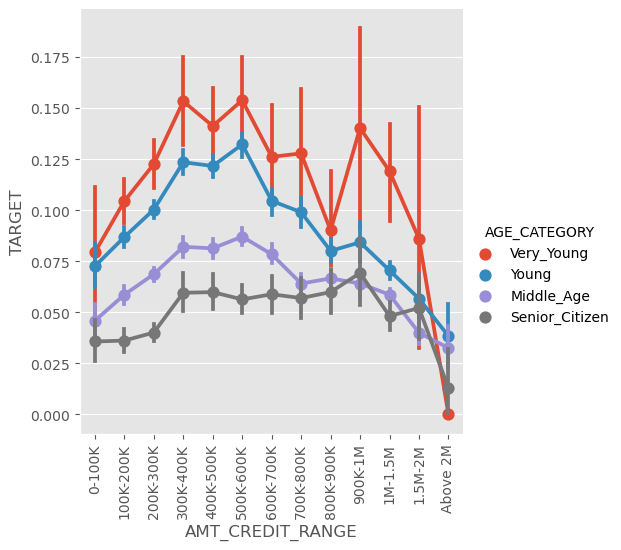

In [106]:
sns.catplot(data=appdata1,x="AMT_CREDIT_RANGE",y="TARGET",hue="AGE_CATEGORY",kind='point')
plt.xticks(rotation=90)
plt.show()

Note:
* It is interesting to observe that Very young customers have higher default rate than other age group customers they have not defaulted in above 2M loan amount. Here, the records to support this statement are below 50, still it is surprising.
* Above 2M credit category have relatively lower default rate than other categories across all age categories.
* Senior citizens are most likely to repay loans than any other age category.

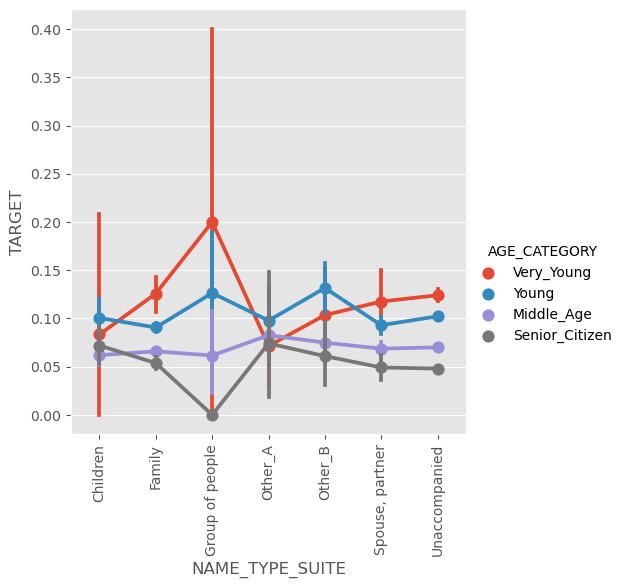

In [107]:
sns.catplot(data=appdata1,x="NAME_TYPE_SUITE",y="TARGET",hue="AGE_CATEGORY",kind='point')
plt.xticks(rotation=90)
plt.show()

Note:
* Senior citizen(above 60 years) who come with group of people are least likely to default and exactly opposite is the case with Very Young customers.

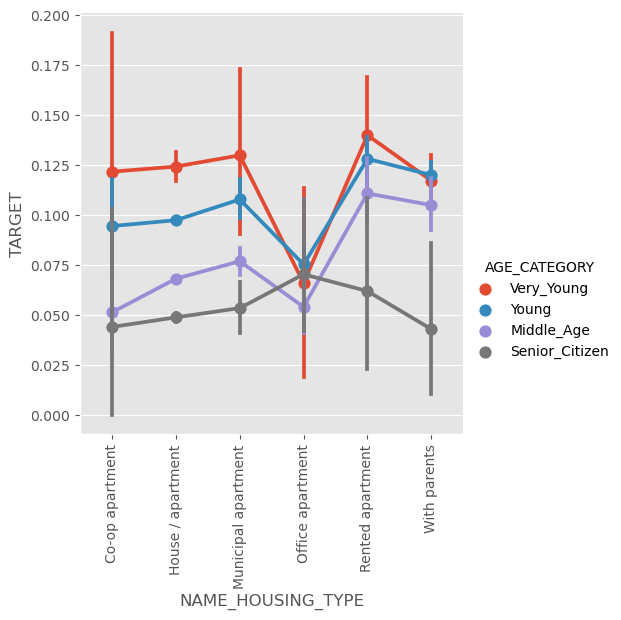

In [108]:
sns.catplot(data=appdata1,x="NAME_HOUSING_TYPE",y="TARGET",hue="AGE_CATEGORY",kind='point')
plt.xticks(rotation=90)
plt.show()

- Apart from 'office_apartment' and 'rented_apartment', senior citizen have less than 5% default rate.
- except senior citizens, customers with Rented_apartment have highest default rate than any other category.


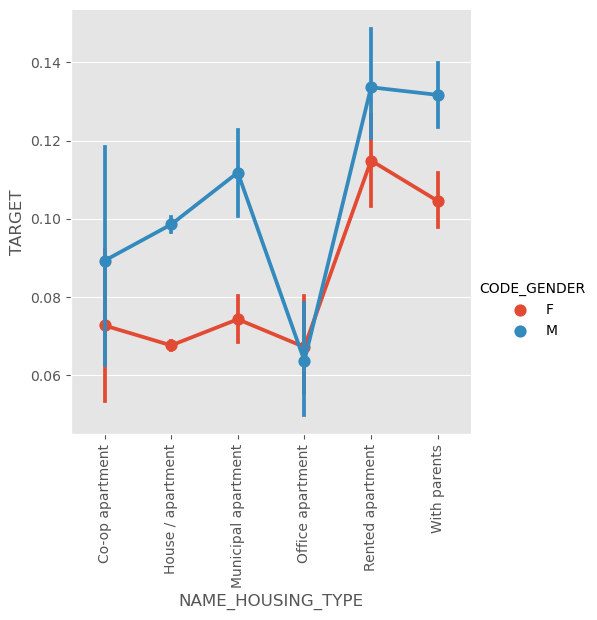

In [109]:
sns.catplot(data=appdata1,x="NAME_HOUSING_TYPE",y="TARGET",hue="CODE_GENDER",kind='point')
plt.xticks(rotation=90)
plt.show()

Note:
* Only in Office apartment category, male customers are less likely to default than females.
* In rest of the categories female customers are morte likely to repay loan.

##### Impact of Gender, AMT_INCOME_RANGE, NAME_EDUCATION_TYPE on default rate

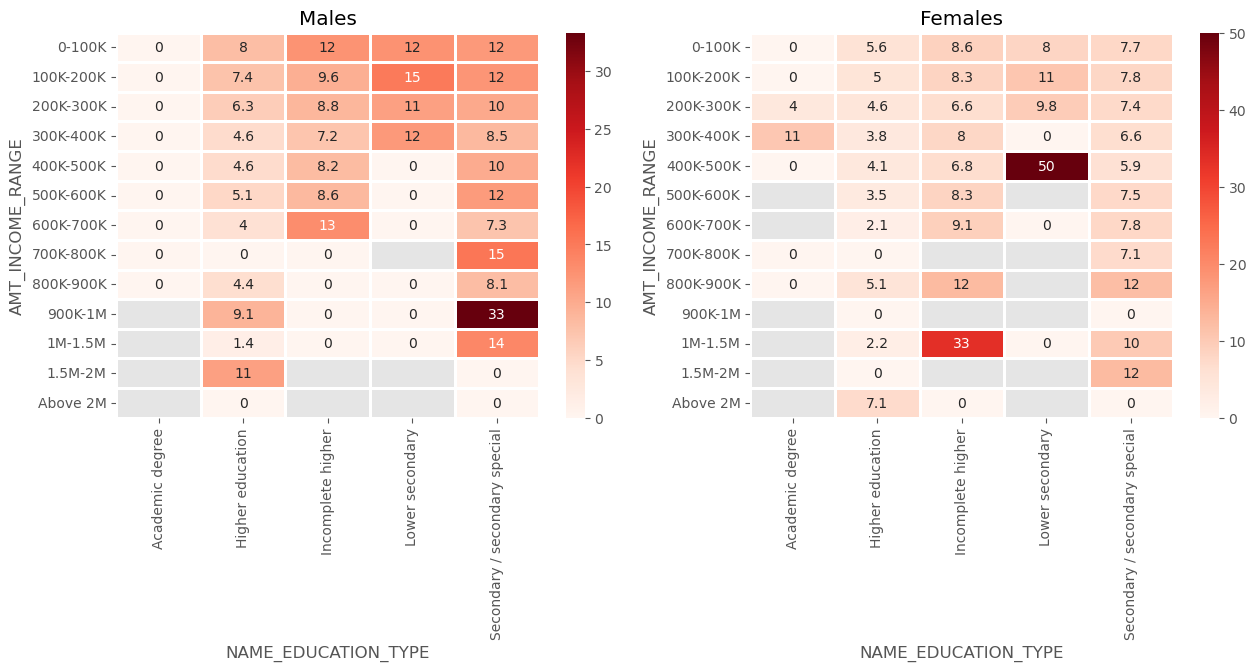

In [110]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
male_df = appdata1[appdata1.CODE_GENDER=="M"].pivot_table(values='TARGET', index=['AMT_INCOME_RANGE'],columns=['NAME_EDUCATION_TYPE'],aggfunc=np.mean)*100
sns.heatmap(male_df,cmap='Reds',annot=True,linewidth =1)
plt.title("Males")
plt.subplot(1,2,2)
female_df = appdata1[appdata1.CODE_GENDER=="F"].pivot_table(values='TARGET', index=['AMT_INCOME_RANGE'],columns=['NAME_EDUCATION_TYPE'],aggfunc=np.mean)*100
sns.heatmap(female_df,cmap='Reds',annot=True,linewidth =1)
plt.title("Females")
plt.show()

Note:
* The values in each cell denotes the default percentage.
* We can say that Males with Salary range between 900K-1M with Secondary/Secaondary special education have highest possibility of defaulting
* Also Females with salary range between 400-500K with Lower secondary education have highest possibility of defaulting

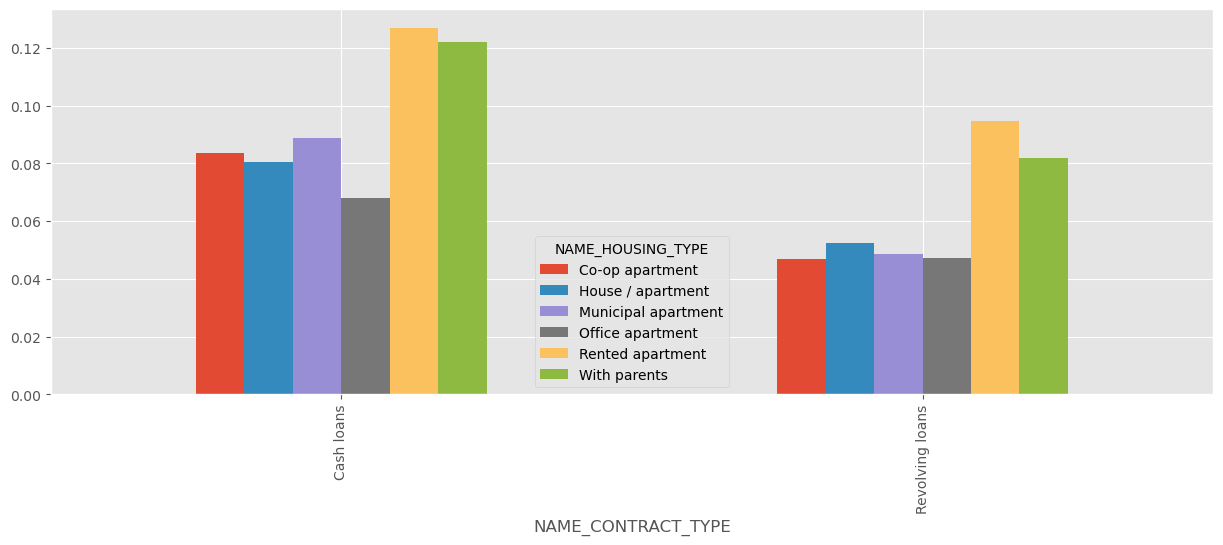

In [111]:
appdata1.pivot_table(index="NAME_CONTRACT_TYPE",columns="NAME_HOUSING_TYPE",values="TARGET").plot.bar(figsize=(15,5))
plt.show()

Note:
- Revolving loan comparitively have lower default rate than cash loan across all categories of housing
- customers with rented apartment and living with parent havehighest chances of defaulting, 
- Excluding the office apartment customers, the customers who possess house/apartment have lesser chances of defaulting in cash loans than revolving loans as compared to other housing types

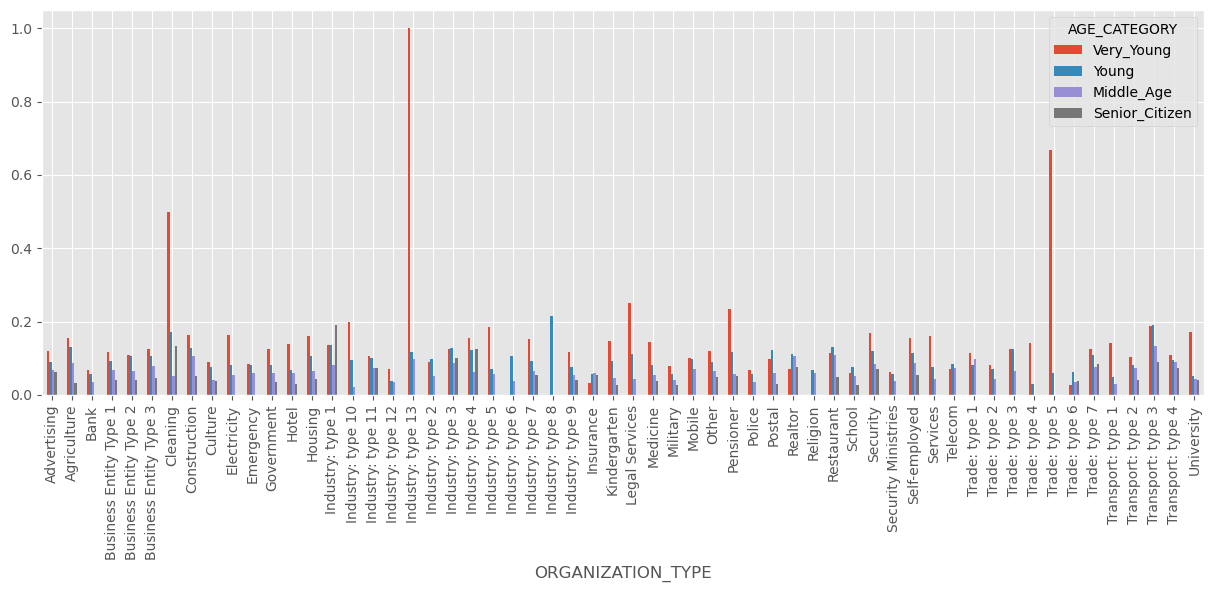

In [112]:
appdata1.pivot_table(index="ORGANIZATION_TYPE",columns="AGE_CATEGORY",values="TARGET").plot.bar(figsize=(15,5))
plt.show()

Note:
- Very young (20-25 years) customers from industry type 13 have the highest chances of defaulting, followed by Trade type 5 and cleaning.

##### Lets check if gender,age category and income variables have any impact on the default rate 

In [113]:
# defaulters df
appdata1_def = appdata1[appdata1.TARGET==1]

# repayers df
appdata1_repay = appdata1[appdata1.TARGET==0]

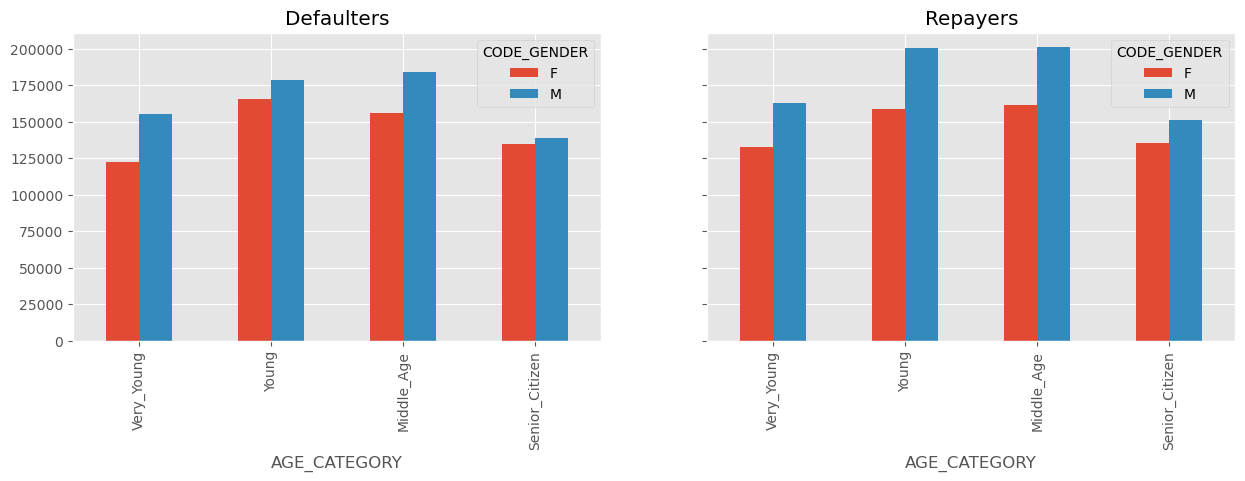

In [114]:
fig, axes = plt.subplots(nrows=1, ncols=2,sharey=True)
pd.pivot_table(data=appdata1_def,index="AGE_CATEGORY",columns="CODE_GENDER",values="AMT_INCOME_TOTAL").plot.bar(figsize=(15,4) ,ax=axes[0],title="Defaulters")
pd.pivot_table(data=appdata1_repay,index="AGE_CATEGORY",columns="CODE_GENDER",values="AMT_INCOME_TOTAL").plot.bar(ax=axes[1],title="Repayers")
plt.show()

Note:
* In both the cases, default and repayment, males have higher mean salary than females, still we had seen that the possibility of default is higher in male category.
* Also it is interesting to see that females in Young category(25 to 40 years) who are defaulting have higher mean salary than females in Young category who are repaying.
* In male category, the repayers have slightly higher mean salary than that of defaulters.

### 3.5) Top Correlations between numerical variables

In [115]:
# finding the top 10 corrrelations of defaulter and non defaulters.
# Lets check the correlation of numerical columns by plotting heatmap for defaulters and non-defaulters.

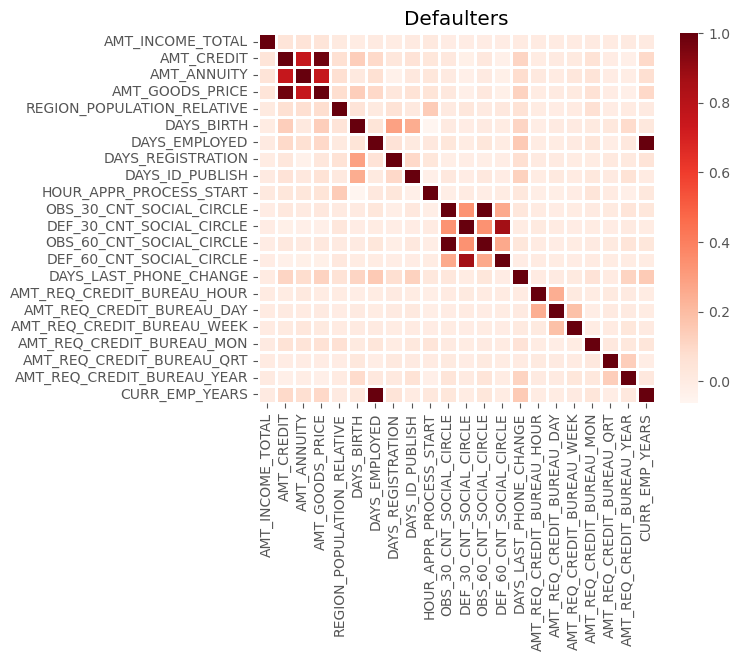

In [116]:
sns.heatmap(appdata1_def[num_cols].corr(),cmap="Reds",linewidth =1)
plt.title("Defaulters")
plt.show()

In [117]:
# as Curr_emp_years have been derived from days_employed, we will drop it.

num_cols.remove('DAYS_EMPLOYED')

In [118]:
default_corr_df = appdata1_def[num_cols].corr().unstack().reset_index()
default_corr_df.columns = ['var1','var2','corr']
default_corr_df = default_corr_df.loc[(default_corr_df.var1!=default_corr_df.var2) & (default_corr_df.var1>default_corr_df.var2)]
default_corr_df = default_corr_df.sort_values('corr',ascending=False)
default_corr_df.reset_index(drop=True,inplace=True)
default_corr_df.head(10)

var1                      var2      corr
0  OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE  0.998269
1  AMT_GOODS_PRICE           AMT_CREDIT                0.983103
2  DEF_60_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  0.868994
3  AMT_GOODS_PRICE           AMT_ANNUITY               0.752699
4  AMT_CREDIT                AMT_ANNUITY               0.752195
5  OBS_60_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  0.337181
6  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  0.333825
7  DAYS_REGISTRATION         DAYS_BIRTH                0.289114
8  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  0.264159
9  OBS_30_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  0.261009

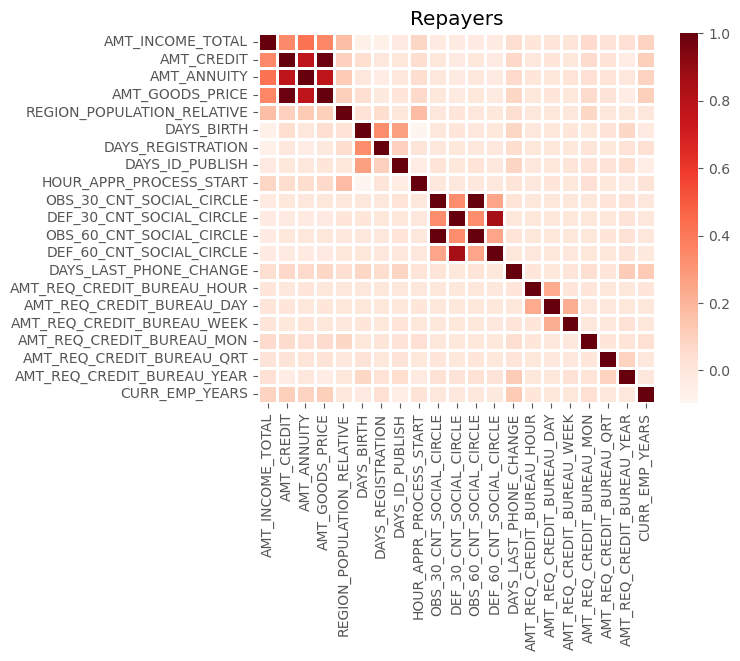

In [119]:
sns.heatmap(appdata1_repay[num_cols].corr(),cmap="Reds",linewidth =1)
plt.title("Repayers")
plt.show()

In [120]:
repay_corr_df = appdata1_repay[num_cols].corr().unstack().reset_index()
repay_corr_df.columns = ['var1','var2','corr']
repay_corr_df = repay_corr_df.loc[(repay_corr_df.var1!=repay_corr_df.var2) & (repay_corr_df.var1>repay_corr_df.var2)]
repay_corr_df = repay_corr_df.sort_values('corr',ascending=False)
repay_corr_df.head(10)

var1                      var2      corr
240  OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE  0.998508
64   AMT_GOODS_PRICE           AMT_CREDIT                0.987250
262  DEF_60_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  0.859332
65   AMT_GOODS_PRICE           AMT_ANNUITY               0.776686
23   AMT_CREDIT                AMT_ANNUITY               0.771309
2    AMT_INCOME_TOTAL          AMT_ANNUITY               0.418953
3    AMT_INCOME_TOTAL          AMT_GOODS_PRICE           0.349462
1    AMT_INCOME_TOTAL          AMT_CREDIT                0.342799
131  DAYS_REGISTRATION         DAYS_BIRTH                0.333151
241  OBS_60_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  0.331336

Note:
* 1) If social circle contains observed or defaulted customers in 30 days they are likely to default in 60 days too.
* 2) Credit amount, goods price and annuity amount are highly correlated with each other.

## 4) Data Exploration and Cleaning (Previous Application data)

### 4.1) Reading and understanding 'Previous Application data'

In [121]:
col_desc[col_desc.Table== "previous_application.csv"]

Table                          Row                                                                                                                                                                                                                                                          Description                                Special
176  previous_application.csv  SK_ID_PREV                   ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loan applications in Home Credit, previous application could, but not necessarily have to lead to credit)                                hashed                               
177  previous_application.csv  SK_ID_CURR                   ID of loan in our sample                                                                                                                                                                                                                                             hashed                               
178  previous_application.csv  NAME_CONTRACT_TYPE           Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application                                                                                                                                                                              NaN                                  
179  previous_application.csv  AMT_ANNUITY                  Annuity of previous application                                                                                                                                                                                                                                      NaN                                  
180  previous_application.csv  AMT_APPLICATION              For how much credit did client ask on the previous application                                                                                                                                                                                                       NaN                                  
181  previous_application.csv  AMT_CREDIT                   Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client initially applied for, but during our approval process he could have received different amount - AMT_CREDIT  NaN                                  
182  previous_application.csv  AMT_DOWN_PAYMENT             Down payment on the previous application                                                                                                                                                                                                                             NaN                                  
183  previous_application.csv  AMT_GOODS_PRICE              Goods price of good that client asked for (if applicable) on the previous application                                                                                                                                                                                NaN                                  
184  previous_application.csv  WEEKDAY_APPR_PROCESS_START   On which day of the week did the client apply for previous application                                                                                                                                                                                               NaN                                  
185  previous_application.csv  HOUR_APPR_PROCESS_START      Approximately at what day hour did the client apply for the previous application                                                                                                                                                                                     rounded                              
186  previous_application.csv  FLAG_LAST_APPL_PER_CONTRACT  Flag if it was 

In [122]:
pre_appdata.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
0  2030495     271877      Consumer loans     1730.430     17145.0          17145.0     0.0               17145.0          SATURDAY                   15                       Y                           1                       0.0                0.182832               0.867336                  XAP                    Approved            -73             Cash through the bank  XAP                NaN              Repeater         Mobile              POS            XNA               Country-wide             35                Connectivity         12.0         middle           POS mobile with interest  365243.0           -42.0            300.0                     -42.0          -37.0              0.0                      
1  2802425     108129      Cash loans         25188.615    607500.0         679671.0   NaN                607500.0         THURSDAY                   11                       Y                           1                      NaN                NaN                    NaN                        XNA                    Approved            -164            XNA                    XAP                Unaccompanied    Repeater         XNA                 Cash           x-sell            Contact center          -1                 XNA                  36.0         low_action       Cash X-Sell: low          365243.0           -134.0           916.0                      365243.0       365243.0          1.0                      
2  2523466     122040      Cash loans         15060.735    112500.0         136444.5   NaN                112500.0         TUESDAY                    11                       Y                           1                      NaN                NaN                    NaN                        XNA                    Approved            -301            Cash through the bank  XAP                Spouse, partner  Repeater         XNA                 Cash           x-sell            Credit and cash offices -1                 XNA                  12.0         high             Cash X-Sell: high         365243.0           -271.0           59.0                       365243.0       365243.0          1.0                      
3  2819243     176158      Cash loans         47041.335    450000.0         470790.0   NaN                450000.0         MONDAY                     7                        Y                           1                      NaN                NaN                    NaN                        XNA                    Approved            -512            Cash through the bank  XAP                NaN              Repeater         XNA                 Cash           x-sell            Credit and cash offices -1                 XNA                  12.0         middle           Cash X-Sell: middle       365243.0           -482.0          -152.0                     -182.0         -177.0             1.0                      
4  1784265     202054      Cash loans         31924.395    337500.0         404055.0   NaN                337500.0         THURSDAY                   9                        Y                           1                      NaN                NaN                    NaN                        Repairs                Refused             -781            Cash through the bank  H

In [123]:
pre_appdata.info(-1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [124]:
pre_appdata.describe().T

count          mean            std           min           25%           50%           75%          max
SK_ID_PREV                 1670214.0  1.923089e+06  532597.958696  1.000001e+06  1.461857e+06  1.923110e+06  2.384280e+06  2845382.000
SK_ID_CURR                 1670214.0  2.783572e+05  102814.823849  1.000010e+05  1.893290e+05  2.787145e+05  3.675140e+05  456255.000 
AMT_ANNUITY                1297979.0  1.595512e+04  14782.137335   0.000000e+00  6.321780e+03  1.125000e+04  2.065842e+04  418058.145 
AMT_APPLICATION            1670214.0  1.752339e+05  292779.762387  0.000000e+00  1.872000e+04  7.104600e+04  1.803600e+05  6905160.000
AMT_CREDIT                 1670213.0  1.961140e+05  318574.616546  0.000000e+00  2.416050e+04  8.054100e+04  2.164185e+05  6905160.000
AMT_DOWN_PAYMENT           774370.0   6.697402e+03  20921.495410  -9.000000e-01  0.000000e+00  1.638000e+03  7.740000e+03  3060045.000
AMT_GOODS_PRICE            1284699.0  2.278473e+05  315396.557937  0.000000e+00  5.084100e+04  1.123200e+05  2.340000e+05  6905160.000
HOUR_APPR_PROCESS_START    1670214.0  1.248418e+01  3.334028       0.000000e+00  1.000000e+01  1.200000e+01  1.500000e+01  23.000     
NFLAG_LAST_APPL_IN_DAY     1670214.0  9.964675e-01  0.059330       0.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000      
RATE_DOWN_PAYMENT          774370.0   7.963682e-02  0.107823      -1.497876e-05  0.000000e+00  5.160508e-02  1.089091e-01  1.000      
RATE_INTEREST_PRIMARY      5951.0     1.883569e-01  0.087671       3.478125e-02  1.607163e-01  1.891222e-01  1.933299e-01  1.000      
RATE_INTEREST_PRIVILEGED   5951.0     7.735025e-01  0.100879       3.731501e-01  7.156448e-01  8.350951e-01  8.525370e-01  1.000      
DAYS_DECISION              1670214.0 -8.806797e+02  779.099667    -2.922000e+03 -1.300000e+03 -5.810000e+02 -2.800000e+02 -1.000      
SELLERPLACE_AREA           1670214.0  3.139511e+02  7127.443459   -1.000000e+00 -1.000000e+00  3.000000e+00  8.200000e+01  4000000.000
CNT_PAYMENT                1297984.0  1.605408e+01  14.567288      0.000000e+00  6.000000e+00  1.200000e+01  2.400000e+01  84.000     
DAYS_FIRST_DRAWING         997149.0   3.422099e+05  88916.115834  -2.922000e+03  3.652430e+05  3.652430e+05  3.652430e+05  365243.000 
DAYS_FIRST_DUE             997149.0   1.382627e+04  72444.869708  -2.892000e+03 -1.628000e+03 -8.310000e+02 -4.110000e+02  365243.000 
DAYS_LAST_DUE_1ST_VERSION  997149.0   3.376777e+04  106857.034789 -2.801000e+03 -1.242000e+03 -3.610000e+02  1.290000e+02  365243.000 
DAYS_LAST_DUE              997149.0   7.658240e+04  149647.415123 -2.889000e+03 -1.314000e+03 -5.370000e+02 -7.400000e+01  365243.000 
DAYS_TERMINATION           997149.0   8.199234e+04  153303.516729 -2.874000e+03 -1.270000e+03 -4.990000e+02 -4.400000e+01  365243.000 
NFLAG_INSURED_ON_APPROVAL  997149.0   3.325702e-01  0.471134       0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  1.000

In [125]:
(pre_appdata.isnull().mean()*100).sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION            0.020716 
AMT_CREDIT                     0.000060 
NAME_YIELD_GROUP               0.000000 
NAME_PORTFOLIO                 0.000000 
NAME_SELLER_INDUSTRY           0.000000 
SELLERPLACE_AREA               0.000000 
CHANNEL_TYPE                   0.000000 
NAME_PRODUCT_TYPE              0.000000 
SK_ID_PREV                     0.000000 
NAME_GOODS_CATEGORY            0.000000 
NAME_CLIENT_TYPE

In [126]:
pre_appdata.duplicated().sum()

0

In [127]:
pre_appdata.shape

(1670214, 37)

### 4.2) Data Cleaning

In [128]:
# dropping variables with more than 40% missing values

pre_appdata1 = pre_appdata.drop(['RATE_INTEREST_PRIVILEGED', 'RATE_INTEREST_PRIMARY', 'AMT_DOWN_PAYMENT','RATE_DOWN_PAYMENT', 'NAME_TYPE_SUITE', 'NFLAG_INSURED_ON_APPROVAL','DAYS_TERMINATION', 'DAYS_LAST_DUE', 'DAYS_LAST_DUE_1ST_VERSION','DAYS_FIRST_DUE', 'DAYS_FIRST_DRAWING'],axis=1)

In [129]:
pre_appdata1.shape

(1670214, 26)

In [130]:
# by observing the columns we can drop these columns.

#'WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'

In [131]:
pre_appdata1.drop(['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

In [132]:
# We can see that some of numerical columns have days in negative, lets correct them.

pre_appdata1[['DAYS_DECISION', 
              'SELLERPLACE_AREA']] = pre_appdata1[['DAYS_DECISION', 'SELLERPLACE_AREA']].apply(lambda x:abs(x))

In [133]:
pre_appdata1.describe().T

count          mean            std        min         25%        50%         75%          max
SK_ID_PREV        1670214.0  1.923089e+06  532597.958696  1000001.0  1461857.25  1923110.5  2384279.75  2845382.000
SK_ID_CURR        1670214.0  2.783572e+05  102814.823849  100001.0   189329.00   278714.5   367514.00   456255.000 
AMT_ANNUITY       1297979.0  1.595512e+04  14782.137335   0.0        6321.78     11250.0    20658.42    418058.145 
AMT_APPLICATION   1670214.0  1.752339e+05  292779.762387  0.0        18720.00    71046.0    180360.00   6905160.000
AMT_CREDIT        1670213.0  1.961140e+05  318574.616546  0.0        24160.50    80541.0    216418.50   6905160.000
AMT_GOODS_PRICE   1284699.0  2.278473e+05  315396.557937  0.0        50841.00    112320.0   234000.00   6905160.000
DAYS_DECISION     1670214.0  8.806797e+02  779.099667     1.0        280.00      581.0      1300.00     2922.000   
SELLERPLACE_AREA  1670214.0  3.148644e+02  7127.403173    0.0        1.00        3.0        82.00       4000000.000
CNT_PAYMENT       1297984.0  1.605408e+01  14.567288      0.0        6.00        12.0       24.00       84.000

#### Lets handle null values

In [134]:
# AMT_ANNUITY
# AMT_GOODS_PRICE
# CNT_PAYMENT
# PRODUCT_COMBINATION

In [135]:
# AMT_ANNUITY

pre_appdata1[pre_appdata1.AMT_ANNUITY.isna()]

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION
6        2315218     175704      Cash loans        NaN           0.0              0.0        NaN               XNA                    Canceled             14             XNA                    XAP                Repeater         XNA                 XNA            XNA               Credit and cash offices  1                 XNA                 NaN           XNA              Cash                    
7        1656711     296299      Cash loans        NaN           0.0              0.0        NaN               XNA                    Canceled             21             XNA                    XAP                Repeater         XNA                 XNA            XNA               Credit and cash offices  1                 XNA                 NaN           XNA              Cash                    
8        2367563     342292      Cash loans        NaN           0.0              0.0        NaN               XNA                    Canceled             386            XNA                    XAP                Repeater         XNA                 XNA            XNA               Credit and cash offices  1                 XNA                 NaN           XNA              Cash                    
9        2579447     334349      Cash loans        NaN           0.0              0.0        NaN               XNA                    Canceled             57             XNA                    XAP                Repeater         XNA                 XNA            XNA               Credit and cash offices  1                 XNA                 NaN           XNA              Cash                    
22       1172842     302212      Cash loans        NaN           0.0              0.0        NaN               XNA                    Refused              239            XNA                    HC                 Repeater         XNA                 XNA            XNA               Credit and cash offices  1                 XNA                 NaN           XNA              Cash                    
...          ...        ...             ...         ..           ...              ...         ..               ...                        ...              ...            ...                    ..                      ...         ...                 ...            ...                                   ... ..                 ...                  ..           ...               ...                    
1670187  1971628     435554      Cash loans        NaN           0.0              0.0        NaN               XNA                    Canceled             134            XNA                    XAP                Repeater         XNA                 XNA            XNA               Contact center           1                 XNA                 NaN           XNA              Cash                    
1670190  2381880     175920      Cash loans        NaN           0.0              0.0        NaN               XNA                    Canceled             243            XNA                    XAP                Repeater         XNA                 XNA            XNA               Contact center           1                 XNA                 NaN           XNA              Cash                    
1670193  1120445     179433      Revolving loans   NaN           0.0              0.0        NaN               XAP                    Refused              365            XNA                    HC                 Refreshed        XNA                 XNA            XNA               AP+ (Cash loan)          10                XNA                 NaN           XNA              Card Street             

In [136]:
pre_appdata1[pre_appdata1.AMT_ANNUITY.isna()]['NAME_CONTRACT_STATUS'].value_counts()

Canceled        305805
Refused         40898 
Unused offer    25524 
Approved        8     
Name: NAME_CONTRACT_STATUS, dtype: int64

In [137]:
# majority of the records where annuity data is missing, the 'NAME_CONTRACT_STATUS' is canceled.
# firstly, lets check NAME_CONTRACT_STATUS - 'Canceled','Refused','Unused offer'

In [138]:
pre_appdata1[pre_appdata1.NAME_CONTRACT_STATUS.isin(['Canceled','Refused','Unused offer'])
            &(pre_appdata1.AMT_ANNUITY.isna())].head(100)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE                CHANNEL_TYPE  SELLERPLACE_AREA  NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP          PRODUCT_COMBINATION
6    2315218     175704      Cash loans        NaN           0.000            0.000      NaN               XNA                    Canceled             14             XNA                    XAP                Repeater         XNA                 XNA            XNA               Credit and cash offices     1                 XNA                  NaN           XNA              Cash                       
7    1656711     296299      Cash loans        NaN           0.000            0.000      NaN               XNA                    Canceled             21             XNA                    XAP                Repeater         XNA                 XNA            XNA               Credit and cash offices     1                 XNA                  NaN           XNA              Cash                       
8    2367563     342292      Cash loans        NaN           0.000            0.000      NaN               XNA                    Canceled             386            XNA                    XAP                Repeater         XNA                 XNA            XNA               Credit and cash offices     1                 XNA                  NaN           XNA              Cash                       
9    2579447     334349      Cash loans        NaN           0.000            0.000      NaN               XNA                    Canceled             57             XNA                    XAP                Repeater         XNA                 XNA            XNA               Credit and cash offices     1                 XNA                  NaN           XNA              Cash                       
22   1172842     302212      Cash loans        NaN           0.000            0.000      NaN               XNA                    Refused              239            XNA                    HC                 Repeater         XNA                 XNA            XNA               Credit and cash offices     1                 XNA                  NaN           XNA              Cash                       
24   1555330     199353      Cash loans        NaN           0.000            0.000      NaN               XNA                    Canceled             202            XNA                    XAP                Repeater         XNA                 XNA            XNA               Credit and cash offices     1                 XNA                  NaN           XNA              Cash                       
29   1583704     315664      Cash loans        NaN           0.000            0.000      NaN               XNA                    Refused              430            XNA                    HC                 Repeater         XNA                 XNA            XNA               Credit and cash offices     1                 XNA                  NaN           XNA              Cash                       
32   1471931     257846      Cash loans        NaN           0.000            0.000      NaN               XNA                    Canceled             302            XNA                    XAP                Repeater         XNA                 XNA            XNA               Credit and cash offices     1                 XNA                  NaN           XNA              Cash                       
33   1478703     393511      Cash loans        NaN           0.000            0.000      NaN               XNA                    Canceled             152            XNA                    XAP                Repeater         XNA                 XNA            XNA               Credit and cash offices     1                 XNA                  NaN           XNA       

In [139]:
# we can observe most of the annuity amount missing where contract is cancelled, as it is logical that
# as long as the loan does not get approved the annuity won't be applicable.

In [140]:
# as most of the records with contract status 'Unused offer','Canceled','Refused' have AMT_APPLICATION,AMT_CREDIT as 0 and 
# AMT_GOODS_PRICE as Null.
# we will impute null values in amt_annuity, AMT_GOODS_PRICE as 0 where contract status is 'Canceled','Refused'

In [141]:
pre_appdata1[pre_appdata1.NAME_CONTRACT_STATUS.isin(['Canceled','Refused','Unused offer'])&
            (pre_appdata1.AMT_ANNUITY.isna())]

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION
6        2315218     175704      Cash loans        NaN           0.0              0.0        NaN               XNA                    Canceled             14             XNA                    XAP                Repeater         XNA                 XNA            XNA               Credit and cash offices  1                 XNA                 NaN           XNA              Cash                    
7        1656711     296299      Cash loans        NaN           0.0              0.0        NaN               XNA                    Canceled             21             XNA                    XAP                Repeater         XNA                 XNA            XNA               Credit and cash offices  1                 XNA                 NaN           XNA              Cash                    
8        2367563     342292      Cash loans        NaN           0.0              0.0        NaN               XNA                    Canceled             386            XNA                    XAP                Repeater         XNA                 XNA            XNA               Credit and cash offices  1                 XNA                 NaN           XNA              Cash                    
9        2579447     334349      Cash loans        NaN           0.0              0.0        NaN               XNA                    Canceled             57             XNA                    XAP                Repeater         XNA                 XNA            XNA               Credit and cash offices  1                 XNA                 NaN           XNA              Cash                    
22       1172842     302212      Cash loans        NaN           0.0              0.0        NaN               XNA                    Refused              239            XNA                    HC                 Repeater         XNA                 XNA            XNA               Credit and cash offices  1                 XNA                 NaN           XNA              Cash                    
...          ...        ...             ...         ..           ...              ...         ..               ...                        ...              ...            ...                    ..                      ...         ...                 ...            ...                                   ... ..                 ...                  ..           ...               ...                    
1670187  1971628     435554      Cash loans        NaN           0.0              0.0        NaN               XNA                    Canceled             134            XNA                    XAP                Repeater         XNA                 XNA            XNA               Contact center           1                 XNA                 NaN           XNA              Cash                    
1670190  2381880     175920      Cash loans        NaN           0.0              0.0        NaN               XNA                    Canceled             243            XNA                    XAP                Repeater         XNA                 XNA            XNA               Contact center           1                 XNA                 NaN           XNA              Cash                    
1670193  1120445     179433      Revolving loans   NaN           0.0              0.0        NaN               XAP                    Refused              365            XNA                    HC                 Refreshed        XNA                 XNA            XNA               AP+ (Cash loan)          10                XNA                 NaN           XNA              Card Street             

In [142]:
# filling missing values in AMT_ANNUITY where NAME_CONTRACT_STATUS is 'Canceled','Refused','Unused offer'.

pre_appdata1.loc[(pre_appdata1.NAME_CONTRACT_STATUS.isin(['Canceled','Refused','Unused offer'])&
            (pre_appdata1.AMT_ANNUITY.isna())),'AMT_ANNUITY'] = 0

In [143]:
# filling missing values in AMT_GOODS_PRICE where NAME_CONTRACT_STATUS is 'Canceled','Refused'

pre_appdata1.loc[(pre_appdata1.NAME_CONTRACT_STATUS.isin(['Canceled','Refused'])&
            (pre_appdata1.AMT_GOODS_PRICE.isna())),'AMT_GOODS_PRICE'] = 0

In [144]:
pre_appdata1[pre_appdata1.AMT_GOODS_PRICE.isna()]

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA  NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP PRODUCT_COMBINATION
93       2522811     120854      Revolving loans    33750.0      0.0              675000.0   NaN               XAP                    Approved             879            XNA               XAP                Repeater         XNA                 Cards          x-sell            Credit and cash offices  1                 XNA                   0.0          XNA              Card X-Sell       
143      1975174     276237      Revolving loans    22500.0      0.0              450000.0   NaN               XAP                    Approved             510            XNA               XAP                Repeater         XNA                 Cards          x-sell            Country-wide             1500              Consumer electronics  0.0          XNA              Card X-Sell       
356      1490462     449030      Revolving loans    9000.0       0.0              180000.0   NaN               XAP                    Approved             691            XNA               XAP                Repeater         XNA                 Cards          x-sell            Country-wide             232               Consumer electronics  0.0          XNA              Card X-Sell       
365      2240107     323651      Revolving loans    13500.0      0.0              270000.0   NaN               XAP                    Approved             650            XNA               XAP                Repeater         XNA                 Cards          x-sell            AP+ (Cash loan)          5                 XNA                   0.0          XNA              Card X-Sell       
415      2748424     263634      Revolving loans    38250.0      0.0              765000.0   NaN               XAP                    Approved             680            XNA               XAP                Repeater         XNA                 Cards          x-sell            Credit and cash offices  1                 XNA                   0.0          XNA              Card X-Sell       
...          ...        ...                  ...        ...      ...                   ...    ..               ...                         ...             ...            ...               ...                     ...         ...                   ...             ...                                ... ..                 ...                   ...          ...                      ...       
1669656  1551130     166786      Revolving loans    3375.0       0.0              67500.0    NaN               XAP                    Approved             2353           XNA               XAP                Repeater         XNA                 Cards          x-sell            Credit and cash offices  1                 XNA                   0.0          XNA              Card Street       
1669730  2334397     440945      Revolving loans    11250.0      0.0              225000.0   NaN               XAP                    Approved             589            XNA               XAP                Refreshed        XNA                 Cards          x-sell            Credit and cash offices  0                 XNA                   0.0          XNA              Card X-Sell       
1669830  1292478     319374      Revolving loans    45000.0      0.0              900000.0   NaN               XAP                    Approved             455            XNA               XAP                Repeater         XNA                 Cards          x-sell            Credit and cash offices  1                 XNA                   0.0          XNA              Card X-Sell       
1669960  1731392     180860      Revolving loans    11250.0      0.0              225000.0   NaN   

In [145]:
# In case of revolving loans (e.g. credit cards), a specific credit limit is available.
# customers can utilise the limit as per their requirement and repay the in installments or full amount.

# In above records, As the customer has not applied for any specific amount, customers just have the credit amount at 
# their disposal, and chose not to use it. That's why the AMT_APPLICATION is 0 and so is CNT_PAYMENT.

# So we will impute AMT_GOODS_PRICE with 0 too.

In [146]:
pre_appdata1.AMT_GOODS_PRICE.fillna(0,inplace=True)

In [147]:
# CNT_PAYMENT

pre_appdata1[pre_appdata1.CNT_PAYMENT.isna()].head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP PRODUCT_COMBINATION
6   2315218     175704      Cash loans         0.0          0.0              0.0         0.0              XNA                    Canceled             14             XNA               XAP                Repeater         XNA                 XNA            XNA               Credit and cash offices  1                 XNA                 NaN           XNA              Cash              
7   1656711     296299      Cash loans         0.0          0.0              0.0         0.0              XNA                    Canceled             21             XNA               XAP                Repeater         XNA                 XNA            XNA               Credit and cash offices  1                 XNA                 NaN           XNA              Cash              
8   2367563     342292      Cash loans         0.0          0.0              0.0         0.0              XNA                    Canceled             386            XNA               XAP                Repeater         XNA                 XNA            XNA               Credit and cash offices  1                 XNA                 NaN           XNA              Cash              
9   2579447     334349      Cash loans         0.0          0.0              0.0         0.0              XNA                    Canceled             57             XNA               XAP                Repeater         XNA                 XNA            XNA               Credit and cash offices  1                 XNA                 NaN           XNA              Cash              
22  1172842     302212      Cash loans         0.0          0.0              0.0         0.0              XNA                    Refused              239            XNA               HC                 Repeater         XNA                 XNA            XNA               Credit and cash offices  1                 XNA                 NaN           XNA              Cash

In [148]:
pre_appdata1[pre_appdata1.CNT_PAYMENT.isna()].NAME_CONTRACT_STATUS.value_counts()

Canceled        305805
Refused         40897 
Unused offer    25524 
Approved        4     
Name: NAME_CONTRACT_STATUS, dtype: int64

In [149]:
# as the contract did not go through the CNT_PAYMENT (term) would obviously be 0.

pre_appdata1.loc[(pre_appdata1.CNT_PAYMENT.isna()) & 
                 ~(pre_appdata1.NAME_CONTRACT_STATUS=='Approved'),
                 'CNT_PAYMENT'] = 0

In [150]:
# PRODUCT_COMBINATION

pre_appdata1[pre_appdata1.PRODUCT_COMBINATION.isna()].NAME_SELLER_INDUSTRY.value_counts()

Connectivity    342
XNA             4  
Name: NAME_SELLER_INDUSTRY, dtype: int64

In [151]:
# moost of the records where PRODUCT_COMBINATION is missing, the CHANNEL_TYPE is 'Country-wide' and 
# NAME_SELLER_INDUSTRY is 'Connectivity'. 

# lets filter on above conditions and check for most occuring PRODUCT_COMBINATION

pre_appdata1[(pre_appdata1.CHANNEL_TYPE=='Country-wide') & 
             (pre_appdata1.NAME_SELLER_INDUSTRY=='Connectivity')].PRODUCT_COMBINATION.value_counts()

POS mobile with interest          184658
POS mobile without interest       23230 
Card Street                       9158  
Cash Street: high                 6850  
Cash X-Sell: middle               4990  
Card X-Sell                       2246  
Cash X-Sell: high                 1989  
Cash X-Sell: low                  1850  
Cash                              1814  
Cash Street: middle               1561  
POS household with interest       72    
Cash Street: low                  24    
POS other with interest           11    
POS household without interest    3     
POS others without interest       2     
Name: PRODUCT_COMBINATION, dtype: int64

In [152]:
# So, let's impute missing values with 'POS mobile with interest'

pre_appdata1.PRODUCT_COMBINATION.fillna('POS mobile with interest',inplace=True)

In [153]:
# checking categorical variables

cat_cols_pre_data = pre_appdata1.select_dtypes('object').columns.to_list()
print(cat_cols_pre_data)

['NAME_CONTRACT_TYPE', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION']


In [154]:
# lets convert the object datatype columns to categorical.

for i in cat_cols_pre_data:
    pre_appdata1[i] = pre_appdata1[i].astype("category")

In [155]:
# Let's check value counts

for i in cat_cols_pre_data:
    print(pre_appdata1[i].value_counts(),end="\n\n")

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                346   
Name: NAME_CONTRACT_TYPE, dtype: int64

XAP                                 922661
XNA                                 677918
Repairs                             23765 
Other                               15608 
Urgent needs                        8412  
Buying a used car                   2888  
Building a house or an annex        2693  
Everyday expenses                   2416  
Medicine                            2174  
Payments on other loans             1931  
Education                           1573  
Journey                             1239  
Purchase of electronic equipment    1061  
Buying a new car                    1012  
Wedding / gift / holiday            962   
Buying a home                       865   
Car repairs                         797   
Furniture                           749   
Buying a holiday home / land        533   
Business development                426

Note:
we can see that a lot of categories have "XNA" & "XAP" values in quite large amount, Let's check and try to impute them.

##### NAME_CONTRACT_TYPE

In [156]:
pre_appdata1[pre_appdata1.NAME_CONTRACT_TYPE.isin(['XNA'])]

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION
6664     2515161     222844      XNA                0.0          0.0              0.0         0.0              XAP                    Canceled             351            XNA               XAP                Repeater         XNA                 XNA            XNA               Country-wide  10                Connectivity         0.0          XNA              POS mobile with interest
9029     1851920     417884      XNA                0.0          0.0              0.0         0.0              XAP                    Canceled             291            XNA               XAP                Repeater         XNA                 XNA            XNA               Country-wide  30                Connectivity         0.0          XNA              POS mobile with interest
17038    2389511     148922      XNA                0.0          0.0              0.0         0.0              XAP                    Canceled             395            XNA               XAP                New              XNA                 XNA            XNA               Country-wide  20                Connectivity         0.0          XNA              POS mobile with interest
24543    2494449     366626      XNA                0.0          0.0              0.0         0.0              XAP                    Canceled             418            XNA               XAP                Repeater         XNA                 XNA            XNA               Country-wide  41                Connectivity         0.0          XNA              POS mobile with interest
24574    2781877     394843      XNA                0.0          0.0              0.0         0.0              XAP                    Canceled             601            XNA               XAP                Repeater         XNA                 XNA            XNA               Country-wide  42                Connectivity         0.0          XNA              POS mobile with interest
...          ...        ...      ...                ...          ...              ...         ...              ...                         ...             ...            ...               ...                     ...         ...                 ...            ...                        ...  ..                         ...         ...          ...                                   ...
1657486  2838749     146575      XNA                0.0          0.0              0.0         0.0              XAP                    Canceled             299            XNA               XAP                Repeater         XNA                 XNA            XNA               Country-wide  30                Connectivity         0.0          XNA              POS mobile with interest
1657679  1611754     399463      XNA                0.0          0.0              0.0         0.0              XAP                    Canceled             311            XNA               XAP                Repeater         XNA                 XNA            XNA               Country-wide  50                Connectivity         0.0          XNA              POS mobile with interest
1663138  1454073     371533      XNA                0.0          0.0              0.0         0.0              XAP                    Canceled             513            XNA               XAP                Refreshed        XNA                 XNA            XNA               Country-wide  30                Connectivity         0.0          XNA              POS mobile with interest
1663305  2441019     180201      XNA                0.0          0.0              0.0         0.0              XAP                    Canceled             570 

In [157]:
pre_appdata1[pre_appdata1.NAME_CONTRACT_TYPE.isin(['XNA'])].NAME_CONTRACT_STATUS.value_counts()

Canceled        315
Refused         31 
Approved        0  
Unused offer    0  
Name: NAME_CONTRACT_STATUS, dtype: int64

- So, where ever `NAME_CONTRACT_TYPE` is 'XNA', the contract did not go through, Let's impute with NA and keep them as it is

In [158]:
pre_appdata1.NAME_CONTRACT_TYPE.replace({'XNA':np.NaN},inplace=True)

##### NAME_CASH_LOAN_PURPOSE

In [159]:
pre_appdata1[pre_appdata1.NAME_CASH_LOAN_PURPOSE.isin(['XAP'])].NAME_CONTRACT_TYPE.value_counts()

Consumer loans     729151
Revolving loans    193164
Cash loans         0     
Name: NAME_CONTRACT_TYPE, dtype: int64

In [160]:
pre_appdata1[pre_appdata1.NAME_CASH_LOAN_PURPOSE.isin(['XNA'])].NAME_CONTRACT_TYPE.value_counts()

Cash loans         677918
Consumer loans     0     
Revolving loans    0     
Name: NAME_CONTRACT_TYPE, dtype: int64

- So, 'XAP' are not cash loans and 'XNA' are missing values
- Let's impute 'XAP' with 'Not_cash_loan' and 'XNA' with np.NaN

In [161]:
pre_appdata1.NAME_CASH_LOAN_PURPOSE.replace({'XAP':'Not_cash_loan'},inplace=True)
pre_appdata1.NAME_CASH_LOAN_PURPOSE.replace({'XNA':np.NaN},inplace=True)

##### NAME_PAYMENT_TYPE

In [162]:
pre_appdata1[pre_appdata1.NAME_PAYMENT_TYPE=='XNA'].NAME_CONTRACT_STATUS.value_counts()

Canceled        313074
Approved        211807
Refused         101989
Unused offer    514   
Name: NAME_CONTRACT_STATUS, dtype: int64

- so, in the records where NAME_CONTRACT_STATUS is 'approved' we will impute XNA with mode i.e 'Cash through the bank'.and rest we will impute with np.NaN.

In [163]:
pre_appdata1.loc[(pre_appdata1.NAME_PAYMENT_TYPE=='XNA') & 
                 (pre_appdata1.NAME_CONTRACT_STATUS=='Approved'),
                 'NAME_PAYMENT_TYPE'] = 'Cash through the bank'

In [164]:
pre_appdata1.loc[(pre_appdata1.NAME_PAYMENT_TYPE=='XNA') & 
                 ~(pre_appdata1.NAME_CONTRACT_STATUS=='Approved'),
                 'NAME_PAYMENT_TYPE'] = np.NaN

##### CODE_REJECT_REASON

In [165]:
pre_appdata1[pre_appdata1.CODE_REJECT_REASON=='XNA']

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA  NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION
266      2312862     330125      Cash loans         0.00         225000.0         225000.0    225000.0         NaN                    Refused              428            NaN                    XNA                Repeater         XNA                 XNA            XNA               Country-wide             30                Connectivity          0.0          XNA              Cash                    
277      2770539     185661      Revolving loans    6750.00      0.0              180000.0    0.0              Not_cash_loan          Refused              2621           NaN                    XNA                Repeater         XNA                 Cards          x-sell            Country-wide             2024              Consumer electronics  0.0          XNA              Card Street             
1942     2420703     163616      Revolving loans    7875.00      0.0              180000.0    0.0              Not_cash_loan          Refused              2513           NaN                    XNA                Repeater         XNA                 Cards          x-sell            Country-wide             72                Connectivity          0.0          XNA              Card Street             
2253     2358606     178537      Cash loans         44634.96     522000.0         611577.0    522000.0         NaN                    Refused              64             Cash through the bank  XNA                Repeater         XNA                 Cash           x-sell            Credit and cash offices  1                 XNA                   24.0         high             Cash Street: high       
2324     2822923     365095      Cash loans         43188.93     1399500.0        1565761.5   1399500.0        NaN                    Refused              248            Cash through the bank  XNA                Repeater         XNA                 Cash           x-sell            Credit and cash offices  1                 XNA                   60.0         low_normal       Cash X-Sell: low        
...          ...        ...             ...              ...           ...              ...         ...        ...                        ...              ...                              ...  ...                     ...         ...                  ...              ...                                ... ..                 ...                    ...                ...                    ...        
1668507  2468578     343076      Revolving loans    6750.00      0.0              157500.0    0.0              Not_cash_loan          Refused              2607           NaN                    XNA                Repeater         XNA                 Cards          x-sell            Country-wide             38                Connectivity          0.0          XNA              Card Street             
1668551  2615508     455992      Cash loans         33472.71     688500.0         852088.5    688500.0         Other                  Refused              196            Cash through the bank  XNA                Repeater         XNA                 Cash           walk-in           Credit and cash offices  1                 XNA                   36.0         low_normal       Cash Street: low        
1669203  2531410     294853      Cash loans         35126.01     675000.0         755190.0    675000.0         NaN                    Refused              273            Cash through the bank  XNA                Repeater         XNA                 Cash           x-sell            Credit and cash offices  1                 XNA                   36.0         middle           Cash X-Sell: m

In [166]:
pre_appdata1[pre_appdata1.CODE_REJECT_REASON=='XNA'].NAME_CONTRACT_STATUS.value_counts()

Refused         5236
Approved        8   
Canceled        0   
Unused offer    0   
Name: NAME_CONTRACT_STATUS, dtype: int64

- As most of the contracts were refused, we would consider the rejection reason as 'Unspecified'.

In [167]:
pre_appdata1.CODE_REJECT_REASON.replace({'XNA':'Unspecified'},inplace=True)

In [168]:
pre_appdata1[pre_appdata1.CODE_REJECT_REASON=='XAP']

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE   NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA  NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP          PRODUCT_COMBINATION
0        2030495     271877      Consumer loans     1730.430     17145.0          17145.0     17145.0          Not_cash_loan          Approved             73             Cash through the bank  XAP                Repeater         Mobile                POS            XNA               Country-wide             35                Connectivity          12.0         middle           POS mobile with interest   
1        2802425     108129      Cash loans         25188.615    607500.0         679671.0    607500.0         NaN                    Approved             164            Cash through the bank  XAP                Repeater         XNA                   Cash           x-sell            Contact center           1                 XNA                   36.0         low_action       Cash X-Sell: low           
2        2523466     122040      Cash loans         15060.735    112500.0         136444.5    112500.0         NaN                    Approved             301            Cash through the bank  XAP                Repeater         XNA                   Cash           x-sell            Credit and cash offices  1                 XNA                   12.0         high             Cash X-Sell: high          
3        2819243     176158      Cash loans         47041.335    450000.0         470790.0    450000.0         NaN                    Approved             512            Cash through the bank  XAP                Repeater         XNA                   Cash           x-sell            Credit and cash offices  1                 XNA                   12.0         middle           Cash X-Sell: middle        
5        1383531     199383      Cash loans         23703.930    315000.0         340573.5    315000.0         Everyday expenses      Approved             684            Cash through the bank  XAP                Repeater         XNA                   Cash           x-sell            Credit and cash offices  1                 XNA                   18.0         low_normal       Cash X-Sell: low           
...          ...        ...             ...               ...         ...              ...         ...                       ...           ...             ...                              ...  ...                     ...         ...                    ...              ...                                ... ..                 ...                    ...                ...                    ...           
1670209  2300464     352015      Consumer loans     14704.290    267295.5         311400.0    267295.5         Not_cash_loan          Approved             544            Cash through the bank  XAP                Refreshed        Furniture             POS            XNA               Stone                    43                Furniture             30.0         low_normal       POS industry with interest 
1670210  2357031     334635      Consumer loans     6622.020     87750.0          64291.5     87750.0          Not_cash_loan          Approved             1694           Cash through the bank  XAP                New              Furniture             POS            XNA               Stone                    43                Furniture             12.0         middle           POS industry with interest 
1670211  2659632     249544      Consumer loans     11520.855    105237.0         102523.5    105237.0         Not_cash_loan          Approved             1488           Cash through the bank  XAP                Repeater         Consumer Electronics  POS            XNA               Country-wide             1370              Consumer electronic

In [169]:
pre_appdata1[pre_appdata1.CODE_REJECT_REASON=='XAP'].NAME_CONTRACT_STATUS.value_counts()

Approved        1036773
Canceled        316319 
Refused         1      
Unused offer    0      
Name: NAME_CONTRACT_STATUS, dtype: int64

- as most of the records belong to approved or canceled contract status, the rejection reason would not come into consideration
- lets impute with null

In [170]:
pre_appdata1.loc[pre_appdata1.CODE_REJECT_REASON=='XAP','CODE_REJECT_REASON'] = np.NaN

##### NAME_CLIENT_TYPE

In [171]:
pre_appdata1[pre_appdata1.NAME_CLIENT_TYPE=='XNA']

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA  NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP             PRODUCT_COMBINATION
694      1044207     241230      Cash loans         0.000        0.0              0.0         0.0              NaN                    Canceled             53             NaN                    NaN                XNA              XNA                 XNA            XNA               Credit and cash offices  1                 XNA                   0.0          XNA              Cash                          
3419     1167657     366138      Cash loans         55400.895    1354500.0        1451047.5   1354500.0        NaN                    Refused              231            Cash through the bank  HC                 XNA              XNA                 Cash           x-sell            Credit and cash offices  1                 XNA                   36.0         low_normal       Cash X-Sell: low              
3594     2609511     334664      Consumer loans     2223.990     20659.5          23112.0     20659.5          Not_cash_loan          Approved             245            Cash through the bank  NaN                XNA              Computers           POS            XNA               Country-wide             50                Consumer electronics  12.0         low_action       POS household without interest
5819     2092311     281867      Cash loans         0.000        0.0              0.0         0.0              NaN                    Canceled             242            NaN                    NaN                XNA              XNA                 XNA            XNA               Credit and cash offices  1                 XNA                   0.0          XNA              Cash                          
5990     2680830     335491      Cash loans         32048.460    877500.0         1016496.0   877500.0         Repairs                Refused              195            Cash through the bank  HC                 XNA              XNA                 Cash           walk-in           Credit and cash offices  1                 XNA                   48.0         low_normal       Cash Street: low              
...          ...        ...             ...               ...         ...               ...        ...             ...                    ...              ...                              ...  ..                 ...              ...                  ...               ...                               ... ..                 ...                    ...                ...                    ...              
1669063  2461196     265508      Cash loans         26510.760    450000.0         545040.0    450000.0         NaN                    Refused              71             NaN                    HC                 XNA              XNA                 Cash           x-sell            Contact center           1                 XNA                   48.0         middle           Cash X-Sell: middle           
1669517  1353023     419192      Cash loans         0.000        0.0              0.0         0.0              NaN                    Canceled             14             NaN                    NaN                XNA              XNA                 XNA            XNA               Credit and cash offices  1                 XNA                   0.0          XNA              Cash                          
1669763  1740043     319018      Cash loans         32470.515    765000.0         916470.0    765000.0         NaN                    Approved             274            Cash through the bank  NaN                XNA              XNA                 Cash           x-sell            Contact center           1                 XNA         

- No specific pattern can be found.
- Lets impute XNA with mode

In [172]:
md = pre_appdata1.NAME_CLIENT_TYPE.mode()[0]
pre_appdata1.NAME_CLIENT_TYPE.replace({'XNA':md},inplace=True)

##### NAME_GOODS_CATEGORY

In [173]:
pre_appdata1[pre_appdata1.NAME_GOODS_CATEGORY=='XNA']

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE            NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP  PRODUCT_COMBINATION
1        2802425     108129      Cash loans         25188.615    607500.0         679671.0    607500.0         NaN                               Approved             164            Cash through the bank  NaN                Repeater         XNA                 Cash           x-sell            Contact center           1                 XNA                  36.0         low_action       Cash X-Sell: low   
2        2523466     122040      Cash loans         15060.735    112500.0         136444.5    112500.0         NaN                               Approved             301            Cash through the bank  NaN                Repeater         XNA                 Cash           x-sell            Credit and cash offices  1                 XNA                  12.0         high             Cash X-Sell: high  
3        2819243     176158      Cash loans         47041.335    450000.0         470790.0    450000.0         NaN                               Approved             512            Cash through the bank  NaN                Repeater         XNA                 Cash           x-sell            Credit and cash offices  1                 XNA                  12.0         middle           Cash X-Sell: middle
4        1784265     202054      Cash loans         31924.395    337500.0         404055.0    337500.0         Repairs                           Refused              781            Cash through the bank  HC                 Repeater         XNA                 Cash           walk-in           Credit and cash offices  1                 XNA                  24.0         high             Cash Street: high  
5        1383531     199383      Cash loans         23703.930    315000.0         340573.5    315000.0         Everyday expenses                 Approved             684            Cash through the bank  NaN                Repeater         XNA                 Cash           x-sell            Credit and cash offices  1                 XNA                  18.0         low_normal       Cash X-Sell: low   
...          ...        ...             ...               ...         ...              ...         ...                       ...                      ...             ...                              ...  ...                     ...         ...                  ...              ...                                ... ..                 ...                   ...                ...                    ...   
1670206  2459206     238591      Cash loans         19401.435    180000.0         243936.0    180000.0         Purchase of electronic equipment  Approved             1833           Cash through the bank  NaN                New              XNA                 Cash           walk-in           Credit and cash offices  100               XNA                  24.0         high             Cash Street: high  
1670207  1662353     443544      Cash loans         12607.875    112500.0         112500.0    112500.0         NaN                               Refused              2514           Cash through the bank  SCO                Repeater         XNA                 Cash           walk-in           Credit and cash offices  100               XNA                  12.0         high             Cash Street: high  
1670208  1556789     209732      Cash loans         22299.390    315000.0         436216.5    315000.0         NaN                               Approved             1279           Cash through the bank  NaN                Refreshed        XNA                 Cash           x-sell            Credit and cash offices  100               XNA       

In [174]:
pre_appdata1[pre_appdata1.NAME_GOODS_CATEGORY=='XNA'].NAME_PAYMENT_TYPE.value_counts()

Cash through the bank                        540956
Non-cash from your account                   1865  
Cashless from the account of the employer    401   
XNA                                          0     
Name: NAME_PAYMENT_TYPE, dtype: int64

In [175]:
pre_appdata1[pre_appdata1.NAME_GOODS_CATEGORY=='XNA'].NAME_CONTRACT_TYPE.value_counts()

Cash loans         747553
Revolving loans    192678
Consumer loans     10232 
Name: NAME_CONTRACT_TYPE, dtype: int64

In [176]:
pre_appdata1[pre_appdata1.NAME_GOODS_CATEGORY=='XNA'].NAME_CONTRACT_STATUS.value_counts()

Approved        410410
Canceled        316107
Refused         223788
Unused offer    504   
Name: NAME_CONTRACT_STATUS, dtype: int64

- As, the XNA values do not seem to be missing in specific pattern, let's make a new category 'Unknown'

In [177]:
pre_appdata1.NAME_GOODS_CATEGORY.replace({'XNA':'Unknown'},inplace=True)

##### NAME_PORTFOLIO

In [178]:
pre_appdata1[pre_appdata1.NAME_PORTFOLIO=='XNA']

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION
6        2315218     175704      Cash loans         0.0          0.0              0.0         0.0              NaN                    Canceled             14             NaN                    NaN                Repeater         Unknown             XNA            XNA               Credit and cash offices  1                 XNA                  0.0          XNA              Cash                    
7        1656711     296299      Cash loans         0.0          0.0              0.0         0.0              NaN                    Canceled             21             NaN                    NaN                Repeater         Unknown             XNA            XNA               Credit and cash offices  1                 XNA                  0.0          XNA              Cash                    
8        2367563     342292      Cash loans         0.0          0.0              0.0         0.0              NaN                    Canceled             386            NaN                    NaN                Repeater         Unknown             XNA            XNA               Credit and cash offices  1                 XNA                  0.0          XNA              Cash                    
9        2579447     334349      Cash loans         0.0          0.0              0.0         0.0              NaN                    Canceled             57             NaN                    NaN                Repeater         Unknown             XNA            XNA               Credit and cash offices  1                 XNA                  0.0          XNA              Cash                    
22       1172842     302212      Cash loans         0.0          0.0              0.0         0.0              NaN                    Refused              239            NaN                    HC                 Repeater         Unknown             XNA            XNA               Credit and cash offices  1                 XNA                  0.0          XNA              Cash                    
...          ...        ...             ...         ...          ...              ...         ...              ...                        ...              ...            ...                    ..                      ...             ...             ...            ...                                   ... ..                 ...                  ...          ...               ...                    
1670187  1971628     435554      Cash loans         0.0          0.0              0.0         0.0              NaN                    Canceled             134            NaN                    NaN                Repeater         Unknown             XNA            XNA               Contact center           1                 XNA                  0.0          XNA              Cash                    
1670190  2381880     175920      Cash loans         0.0          0.0              0.0         0.0              NaN                    Canceled             243            NaN                    NaN                Repeater         Unknown             XNA            XNA               Contact center           1                 XNA                  0.0          XNA              Cash                    
1670193  1120445     179433      Revolving loans    0.0          0.0              0.0         0.0              Not_cash_loan          Refused              365            NaN                    HC                 Refreshed        Unknown             XNA            XNA               AP+ (Cash loan)          10                XNA                  0.0          XNA              Card Street             

In [179]:
pre_appdata1[pre_appdata1.NAME_PORTFOLIO=='XNA'].NAME_CONTRACT_STATUS.value_counts()

Canceled        305805
Refused         40897 
Unused offer    25524 
Approved        4     
Name: NAME_CONTRACT_STATUS, dtype: int64

- as most of the contracts did not go through, the NAME_PORTFOLIO is not applicable.
- Let's impute with np.NaN

In [180]:
pre_appdata1.NAME_PORTFOLIO.replace({'XNA':np.NaN},inplace=True)

##### NAME_PRODUCT_TYPE

In [181]:
pre_appdata1[pre_appdata1.NAME_PRODUCT_TYPE=='XNA']

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE   NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA  NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP          PRODUCT_COMBINATION
0        2030495     271877      Consumer loans     1730.430     17145.0          17145.0     17145.0          Not_cash_loan          Approved             73             Cash through the bank  NaN                Repeater         Mobile                POS            XNA               Country-wide             35                Connectivity          12.0         middle           POS mobile with interest   
6        2315218     175704      Cash loans         0.000        0.0              0.0         0.0              NaN                    Canceled             14             NaN                    NaN                Repeater         Unknown               NaN            XNA               Credit and cash offices  1                 XNA                   0.0          XNA              Cash                       
7        1656711     296299      Cash loans         0.000        0.0              0.0         0.0              NaN                    Canceled             21             NaN                    NaN                Repeater         Unknown               NaN            XNA               Credit and cash offices  1                 XNA                   0.0          XNA              Cash                       
8        2367563     342292      Cash loans         0.000        0.0              0.0         0.0              NaN                    Canceled             386            NaN                    NaN                Repeater         Unknown               NaN            XNA               Credit and cash offices  1                 XNA                   0.0          XNA              Cash                       
9        2579447     334349      Cash loans         0.000        0.0              0.0         0.0              NaN                    Canceled             57             NaN                    NaN                Repeater         Unknown               NaN            XNA               Credit and cash offices  1                 XNA                   0.0          XNA              Cash                       
...          ...        ...             ...           ...        ...              ...         ...              ...                         ...             ..             ...                    ...                     ...             ...               ...            ...                                   ... ..                 ...                   ...          ...               ...                       
1670202  2205099     157707      Consumer loans     4334.355     22207.5          23854.5     22207.5          Not_cash_loan          Approved             979            Cash through the bank  NaN                Repeater         Furniture             POS            XNA               Stone                    20                Clothing              6.0          middle           POS industry with interest 
1670203  2844282     383898      Consumer loans     0.000        14791.5          14791.5     14791.5          Not_cash_loan          Refused              1848           Cash through the bank  Unspecified        New              Mobile                NaN            XNA               Stone                    106               Connectivity          0.0          XNA              POS mobile with interest   
1670209  2300464     352015      Consumer loans     14704.290    267295.5         311400.0    267295.5         Not_cash_loan          Approved             544            Cash through the bank  NaN                Refreshed        Furniture             POS            XNA               Stone                    43                Furniture          

In [182]:
pre_appdata1[pre_appdata1.NAME_PRODUCT_TYPE=='XNA'].NAME_PAYMENT_TYPE.value_counts()

Cash through the bank                        712786
Non-cash from your account                   6391  
Cashless from the account of the employer    709   
XNA                                          0     
Name: NAME_PAYMENT_TYPE, dtype: int64

In [183]:
pre_appdata1[pre_appdata1.NAME_PRODUCT_TYPE=='XNA'].NAME_CONTRACT_STATUS.value_counts()

Approved        626474
Canceled        306023
Refused         104735
Unused offer    26434 
Name: NAME_CONTRACT_STATUS, dtype: int64

- As, the XNA values do not seem to be missing in specific pattern, let's make a new category 'Unknown'

In [184]:
pre_appdata1.NAME_PRODUCT_TYPE.replace({'XNA':'Unknown'},inplace=True)

##### NAME_SELLER_INDUSTRY

In [185]:
pre_appdata1[pre_appdata1.NAME_SELLER_INDUSTRY=='XNA']

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE            NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP  PRODUCT_COMBINATION
1        2802425     108129      Cash loans         25188.615    607500.0         679671.0    607500.0         NaN                               Approved             164            Cash through the bank  NaN                Repeater         Unknown             Cash           x-sell            Contact center           1                 XNA                  36.0         low_action       Cash X-Sell: low   
2        2523466     122040      Cash loans         15060.735    112500.0         136444.5    112500.0         NaN                               Approved             301            Cash through the bank  NaN                Repeater         Unknown             Cash           x-sell            Credit and cash offices  1                 XNA                  12.0         high             Cash X-Sell: high  
3        2819243     176158      Cash loans         47041.335    450000.0         470790.0    450000.0         NaN                               Approved             512            Cash through the bank  NaN                Repeater         Unknown             Cash           x-sell            Credit and cash offices  1                 XNA                  12.0         middle           Cash X-Sell: middle
4        1784265     202054      Cash loans         31924.395    337500.0         404055.0    337500.0         Repairs                           Refused              781            Cash through the bank  HC                 Repeater         Unknown             Cash           walk-in           Credit and cash offices  1                 XNA                  24.0         high             Cash Street: high  
5        1383531     199383      Cash loans         23703.930    315000.0         340573.5    315000.0         Everyday expenses                 Approved             684            Cash through the bank  NaN                Repeater         Unknown             Cash           x-sell            Credit and cash offices  1                 XNA                  18.0         low_normal       Cash X-Sell: low   
...          ...        ...             ...               ...         ...              ...         ...                       ...                      ...             ...                              ...  ...                     ...             ...              ...              ...                                ... ..                 ...                   ...                ...                    ...   
1670206  2459206     238591      Cash loans         19401.435    180000.0         243936.0    180000.0         Purchase of electronic equipment  Approved             1833           Cash through the bank  NaN                New              Unknown             Cash           walk-in           Credit and cash offices  100               XNA                  24.0         high             Cash Street: high  
1670207  1662353     443544      Cash loans         12607.875    112500.0         112500.0    112500.0         NaN                               Refused              2514           Cash through the bank  SCO                Repeater         Unknown             Cash           walk-in           Credit and cash offices  100               XNA                  12.0         high             Cash Street: high  
1670208  1556789     209732      Cash loans         22299.390    315000.0         436216.5    315000.0         NaN                               Approved             1279           Cash through the bank  NaN                Refreshed        Unknown             Cash           x-sell            Credit and cash offices  100               XNA       

In [186]:
pre_appdata1[pre_appdata1.NAME_SELLER_INDUSTRY=='XNA'].NAME_CONTRACT_TYPE.value_counts()

Cash loans         699203
Revolving loans    154531
Consumer loans     1982  
Name: NAME_CONTRACT_TYPE, dtype: int64

In [187]:
pre_appdata1[pre_appdata1.NAME_SELLER_INDUSTRY=='XNA'].NAME_GOODS_CATEGORY.value_counts()

Unknown                     854724
Jewelry                     129   
Mobile                      100   
Consumer Electronics        92    
Audio/Video                 79    
Computers                   68    
Sport and Leisure           68    
Clothing and Accessories    65    
Medicine                    57    
Direct Sales                51    
Medical Supplies            48    
Tourism                     45    
Furniture                   45    
Construction Materials      39    
Homewares                   24    
Fitness                     19    
Auto Accessories            14    
Vehicles                    11    
Gardening                   11    
Education                   11    
Photo / Cinema Equipment    11    
Weapon                      3     
Office Appliances           2     
House Construction          1     
Other                       1     
Insurance                   1     
Animals                     1     
Additional Service          0     
Name: NAME_GOODS_CAT

- as majority of goods category is 'Unknown', lets impute the seller industry as 'Unknown' too.

In [188]:
pre_appdata1.NAME_SELLER_INDUSTRY.replace({'XNA':'Unknown'},inplace=True)

##### NAME_YIELD_GROUP

In [189]:
pre_appdata1[pre_appdata1.NAME_YIELD_GROUP=='XNA']

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA  NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION
6        2315218     175704      Cash loans         0.0          0.0              0.0         0.0              NaN                    Canceled             14             NaN                    NaN                Repeater         Unknown             NaN            Unknown           Credit and cash offices  1                 Unknown               0.0          XNA              Cash                    
7        1656711     296299      Cash loans         0.0          0.0              0.0         0.0              NaN                    Canceled             21             NaN                    NaN                Repeater         Unknown             NaN            Unknown           Credit and cash offices  1                 Unknown               0.0          XNA              Cash                    
8        2367563     342292      Cash loans         0.0          0.0              0.0         0.0              NaN                    Canceled             386            NaN                    NaN                Repeater         Unknown             NaN            Unknown           Credit and cash offices  1                 Unknown               0.0          XNA              Cash                    
9        2579447     334349      Cash loans         0.0          0.0              0.0         0.0              NaN                    Canceled             57             NaN                    NaN                Repeater         Unknown             NaN            Unknown           Credit and cash offices  1                 Unknown               0.0          XNA              Cash                    
17       1285768     142748      Revolving loans    9000.0       180000.0         180000.0    180000.0         Not_cash_loan          Approved             336            Cash through the bank  NaN                Repeater         Unknown             Cards          x-sell            AP+ (Cash loan)          6                 Unknown               0.0          XNA              Card X-Sell             
...          ...        ...                  ...       ...            ...              ...         ...                   ...               ...             ...                              ...  ...                     ...             ...               ...             ...                        ...         ..                     ...               ...          ...                      ...             
1670191  1755809     122569      Revolving loans    2250.0       45000.0          45000.0     45000.0          Not_cash_loan          Refused              499            NaN                    HC                 Repeater         Unknown             Cards          walk-in           Stone                    150               Consumer electronics  0.0          XNA              Card Street             
1670192  2101747     339383      Revolving loans    3375.0       0.0              67500.0     0.0              Not_cash_loan          Approved             540            Cash through the bank  NaN                Refreshed        Unknown             Cards          x-sell            AP+ (Cash loan)          10                Unknown               0.0          XNA              Card X-Sell             
1670193  1120445     179433      Revolving loans    0.0          0.0              0.0         0.0              Not_cash_loan          Refused              365            NaN                    HC                 Refreshed        Unknown             NaN            Unknown           AP+ (Cash loan)          10                Unknown               0.0          XNA              Card Street   

- As the 'XNA' values in NAME_YIELD_GROUP seems to have considerable count, lets make a new category

In [190]:
pre_appdata1.NAME_YIELD_GROUP.replace({'XNA':'Unknown'},inplace=True)

In [191]:
pre_appdata1.describe().T

count          mean            std        min         25%           50%         75%          max
SK_ID_PREV        1670214.0  1.923089e+06  532597.958696  1000001.0  1461857.25  1.923110e+06  2384279.75  2845382.000
SK_ID_CURR        1670214.0  2.783572e+05  102814.823849  100001.0   189329.00   2.787145e+05  367514.00   456255.000 
AMT_ANNUITY       1670206.0  1.239932e+04  14625.422994   0.0        2250.00     8.250368e+03  16824.06    418058.145 
AMT_APPLICATION   1670214.0  1.752339e+05  292779.762387  0.0        18720.00    7.104600e+04  180360.00   6905160.000
AMT_CREDIT        1670213.0  1.961140e+05  318574.616546  0.0        24160.50    8.054100e+04  216418.50   6905160.000
AMT_GOODS_PRICE   1670214.0  1.752561e+05  292799.105392  0.0        18720.00    7.105050e+04  180405.00   6905160.000
DAYS_DECISION     1670214.0  8.806797e+02  779.099667     1.0        280.00      5.810000e+02  1300.00     2922.000   
SELLERPLACE_AREA  1670214.0  3.148644e+02  7127.403173    0.0        1.00        3.000000e+00  82.00       4000000.000
CNT_PAYMENT       1670210.0  1.247624e+01  14.475887      0.0        0.00        1.000000e+01  16.00       84.000

Note:
We can see that days decision and cnt payment does not seem to have outliers, still we will check with the box plot.

In [192]:
num_col_pre_data = pre_appdata1.select_dtypes(exclude='category').columns.to_list()[2::]
print(num_col_pre_data)

['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_DECISION', 'SELLERPLACE_AREA', 'CNT_PAYMENT']


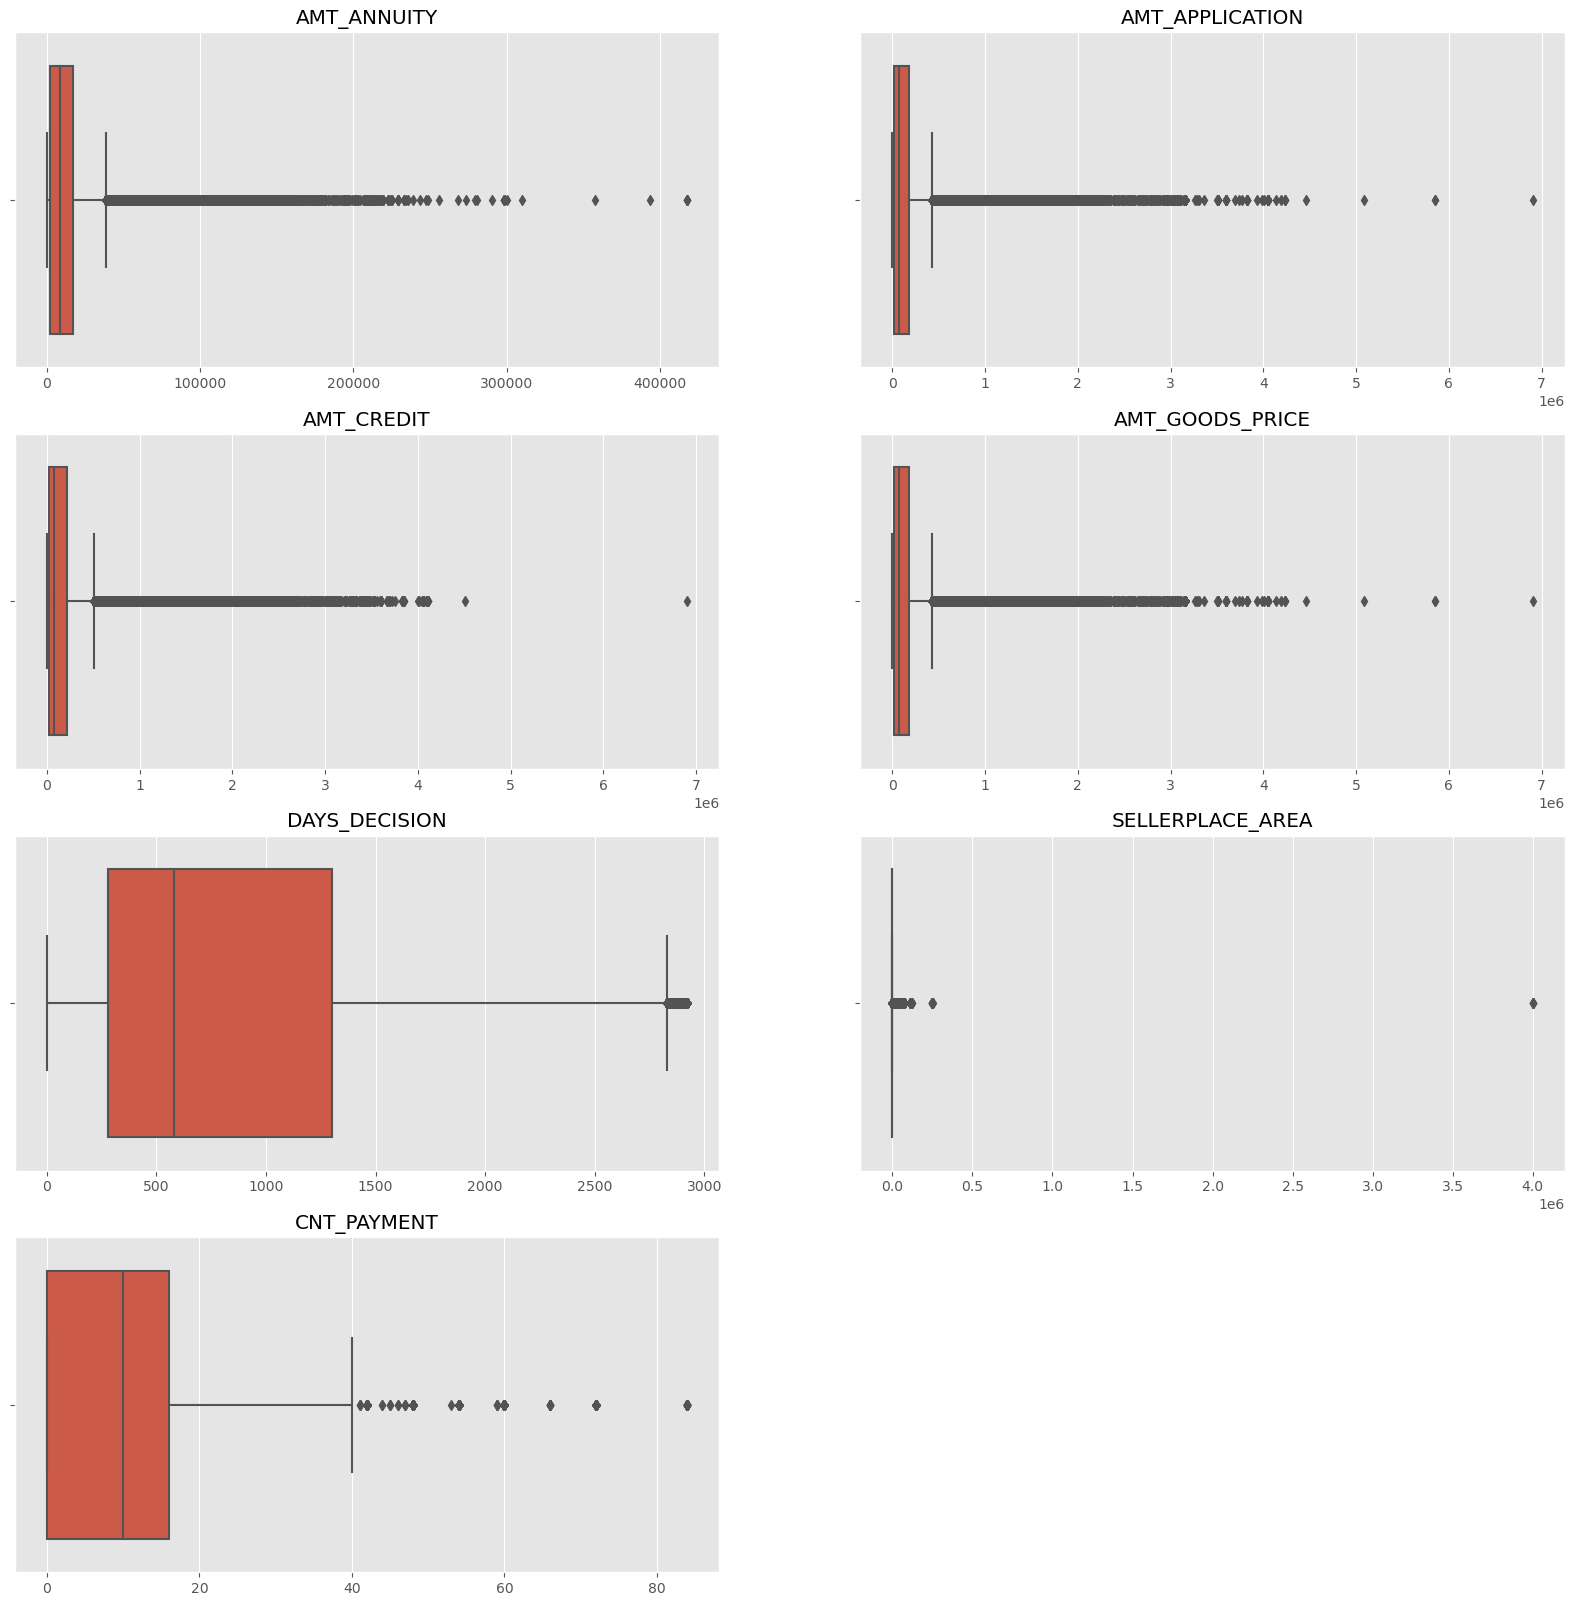

In [193]:
plt.figure(figsize=(20,20))
for i,j in enumerate(num_col_pre_data,1):
    plt.subplot(4,2,i)
    sns.boxplot(pre_appdata1[j],orient='h',)
    plt.title(j)
    plt.xlabel(None)
    plt.ylabel(None)
plt.show()

Note:
Days decision and cnt payment have very less number of outliers while other variables contain quite high number of outliers

In [194]:
# As we have cleaned the previous application data set, lets merge it with application database 
# and take our analysis further

## 5)  Analysis and Visualisation - Merged Data

In [229]:
merged_data = appdata1.merge(pre_appdata1,on="SK_ID_CURR",how="inner",suffixes=['_curr','_prev'])
merged_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_curr CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_curr  AMT_ANNUITY_curr  AMT_GOODS_PRICE_curr NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE CNT_FAM_MEMBERS WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START       ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  CURR_EMP_YEARS AGE_CATEGORY AMT_INCOME_RANGE AMT_CREDIT_RANGE AMT_GOODS_PRICE_RANGE  SK_ID_PREV NAME_CONTRACT_TYPE_prev  AMT_ANNUITY_prev  AMT_APPLICATION  AMT_CREDIT_prev  AMT_GOODS_PRICE_prev NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE   NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA  NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP          PRODUCT_COMBINATION
0  100002      1       Cash loans              M           N            Y               0            202500.0          406597.5         24700.5           351000.0              Unaccompanied   Working          Secondary / secondary special  Single / not married  House / apartment  0.018801                    9461        637            3648.0             2120             Laborers        1.0             WEDNESDAY                  10                       Business Entity Type 3  2.0                       2.0                       2.0                       2.0                       1134.0                  1               0.0                         0.0                        0.0                         0.0                        0.0                        1.0                         2               Young        200K-300K        400K-500K        300K-400K             1038818     Consumer loans          9251.775          179055.0         179055.0         179055.0              Not_cash_loan          Approved             606            Cash through the bank  NaN                New              Vehicles              POS            Unknown           Stone                    500               Auto technology       24.0         low_normal       POS other with interest    
1  100003      0       Cash loans              F           N            N               0            270000.0          1293502.5        35698.5           1129500.0             Family          State servant    Higher education               Married               House / apartment  0.003541                    16765       1188           1186.0             291              Core staff      2.0             MONDAY                     11                       School                  1.0                       0.0                       1.0                       0.0                       828.0                   1               0.0                         0.0                        0.0                         0.0                        0.0                        0.0                         4               Middle_Age   200K-300K        1M-1.5M          1M-1.5M               1810518     Cash loans              98356.995         900000.0         1035882.0        900000.0              NaN                    Approved             746            Cash through the bank  NaN                Repeater         Unknown               Cash           x-sell            Credit and cash offices  1                 Unknown               12.0         low_normal       Cash X-Sell: low           
2  100003      0       Cash loans              F           N            N               0            270000.0          1293502.5        35698.5           1129500.0

In [230]:
merged_data.info(-1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 64 columns):
 #   Column                      Non-Null Count    Dtype   
---  ------                      --------------    -----   
 0   SK_ID_CURR                  1413701 non-null  int64   
 1   TARGET                      1413701 non-null  int64   
 2   NAME_CONTRACT_TYPE_curr     1413701 non-null  category
 3   CODE_GENDER                 1413701 non-null  category
 4   FLAG_OWN_CAR                1413701 non-null  category
 5   FLAG_OWN_REALTY             1413701 non-null  category
 6   CNT_CHILDREN                1413701 non-null  category
 7   AMT_INCOME_TOTAL            1413701 non-null  float64 
 8   AMT_CREDIT_curr             1413701 non-null  float64 
 9   AMT_ANNUITY_curr            1413608 non-null  float64 
 10  AMT_GOODS_PRICE_curr        1412493 non-null  float64 
 11  NAME_TYPE_SUITE             1410175 non-null  category
 12  NAME_INCOME_TYPE            1413701 non-nu

In [231]:
merged_data.shape

(1413701, 64)

In [232]:
merged_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_curr', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_curr', 'AMT_ANNUITY_curr', 'AMT_GOODS_PRICE_curr',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'CURR_EMP_YEARS', 'AGE_CATEGORY', 'AMT_

In [233]:
important_cols = ['TARGET', 'NAME_CONTRACT_TYPE_curr', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY','AMT_INCOME_TOTAL',
       'AMT_CREDIT_curr', 'AMT_ANNUITY_curr', 'AMT_GOODS_PRICE_curr', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE','OCCUPATION_TYPE','ORGANIZATION_TYPE','CURR_EMP_YEARS', 'AGE_CATEGORY', 'AMT_INCOME_RANGE',
       'AMT_CREDIT_RANGE', 'AMT_GOODS_PRICE_RANGE',
       'NAME_CONTRACT_TYPE_prev', 'AMT_ANNUITY_prev', 'AMT_APPLICATION',
       'AMT_CREDIT_prev', 'AMT_GOODS_PRICE_prev', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE','CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY','NAME_PORTFOLIO', 
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE']

In [234]:
merged_data1 = merged_data[important_cols]

In [235]:
categorical_cols = merged_data1.select_dtypes('category').columns.to_list()
num_cols = merged_data1.select_dtypes(exclude='category').columns.to_list()
print(categorical_cols)

['NAME_CONTRACT_TYPE_curr', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'AGE_CATEGORY', 'AMT_INCOME_RANGE', 'AMT_CREDIT_RANGE', 'AMT_GOODS_PRICE_RANGE', 'NAME_CONTRACT_TYPE_prev', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE']


##### Firstly lets check the contract status for merged data frame

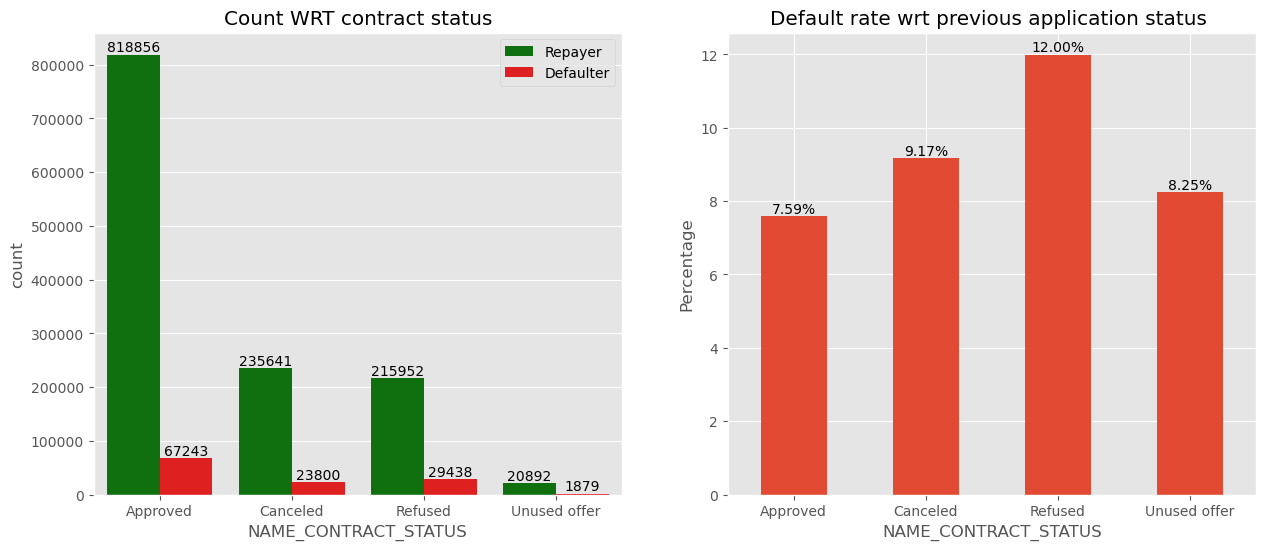

In [212]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
ax = sns.countplot(x=merged_data1.NAME_CONTRACT_STATUS,hue=merged_data1.TARGET,palette=["g",'r'])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.legend(['Repayer','Defaulter'])
plt.title("Count WRT contract status")
# plt.yscale("log")
plt.subplot(1,2,2)
ax1 = (merged_data1.groupby("NAME_CONTRACT_STATUS")["TARGET"].mean()*100).plot.bar(title="Default rate wrt previous application status ")
ax1.bar_label(ax1.containers[0],fmt='%.2f%%')
plt.xticks(rotation=0)
plt.ylabel("Percentage")
plt.show()

Note:
* From previously approved loan, it is evident that the customers are least likely to default i.e ~7.6%. even though this category have highest number of customers.
* The customers whose loan was previously refused have defaulted the most in currently approved loan(~12%) but on the brighter side, 88% are repayers. If we decide to reject on the basis of previous status will lead to 88% bussiness opportunity loss from this segment.
* The customers who were previously eligible for loan but did not take it have around 8% default rate which is fine. But if we want to further reduce the default rate we should always recalculate the eligibility considering the current situation insted of directly passing on the offer in this case.

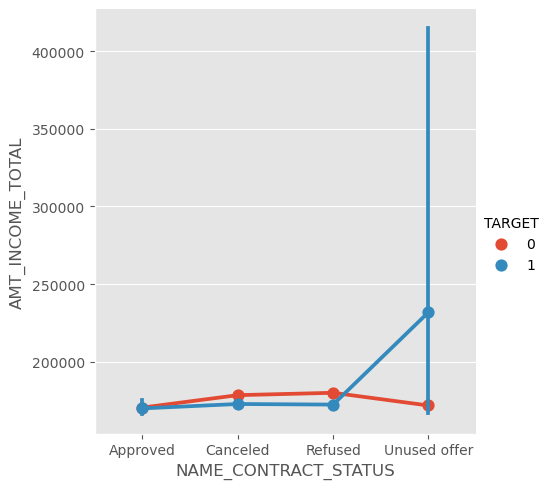

In [213]:
sns.catplot(data=merged_data1,x="NAME_CONTRACT_STATUS",y='AMT_INCOME_TOTAL',hue="TARGET",kind='point')
plt.show()

Note:
* The customers who had loan offer but did not take it previously and currently defaulted the loan have higher avg salary than that of repayers. 
* There is definitly some catch in this case, there is a possibility that bank has offered them the same previous loan offer amount without considering the current situation.

In [ ]:
# lets further drill down on the contract status.

In [214]:
def plot_clustered_col(idx,clm):
    merged_data1.pivot_table(index = idx,columns=clm,values="TARGET").plot.bar(figsize=(15,6))
    plt.title("Default_rate "+idx+" Vs "+clm)
    plt.show()

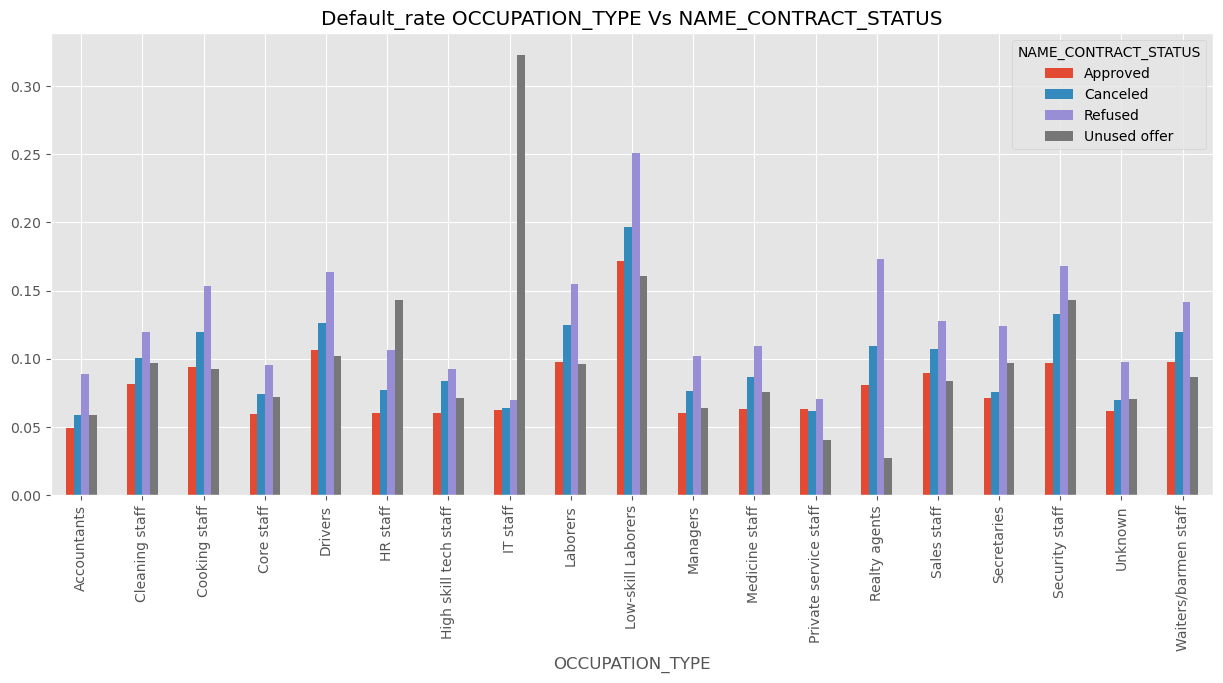

In [215]:
plot_clustered_col("OCCUPATION_TYPE","NAME_CONTRACT_STATUS")

Note:
* IT staff is the have the highest possibility of defaulting if they have taken unused offer loan which is more than 30%.

In [ ]:
# lets further check the purpose of loan

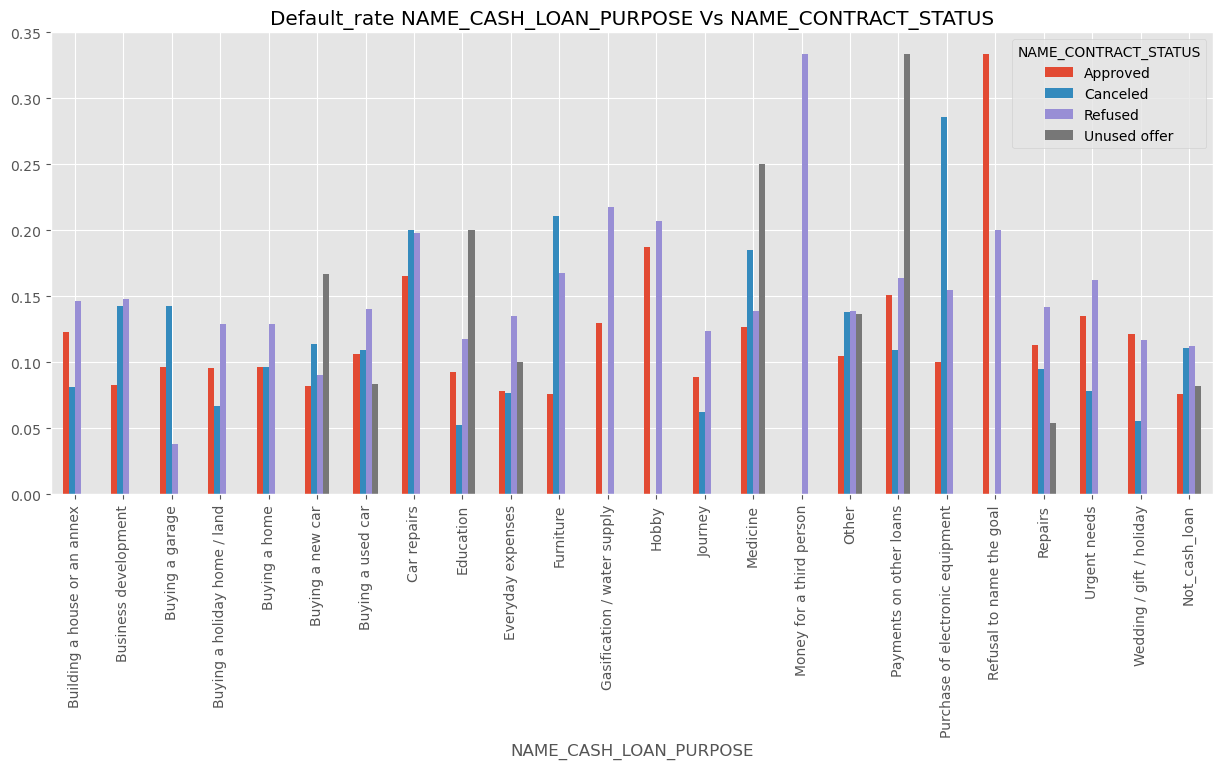

In [216]:
plot_clustered_col("NAME_CASH_LOAN_PURPOSE","NAME_CONTRACT_STATUS")

Note:
* We can see that the highest possibility of default is in below purpose:
* 1) Money for a third person previously refused loan
* 2) Payment on the other loans previously given offer
* 3) Refusal to name the goal previously approved loan.
* 4) Purchase of Electronic equipmets previously cancelled loan.

* We can clearly see that first three are that kind of cases where loan offer should be rejected because the default rate is almost 34%.
* Even in fourth case, we should further drill down to the reason of cancelling the loan and then take decision accordingly.

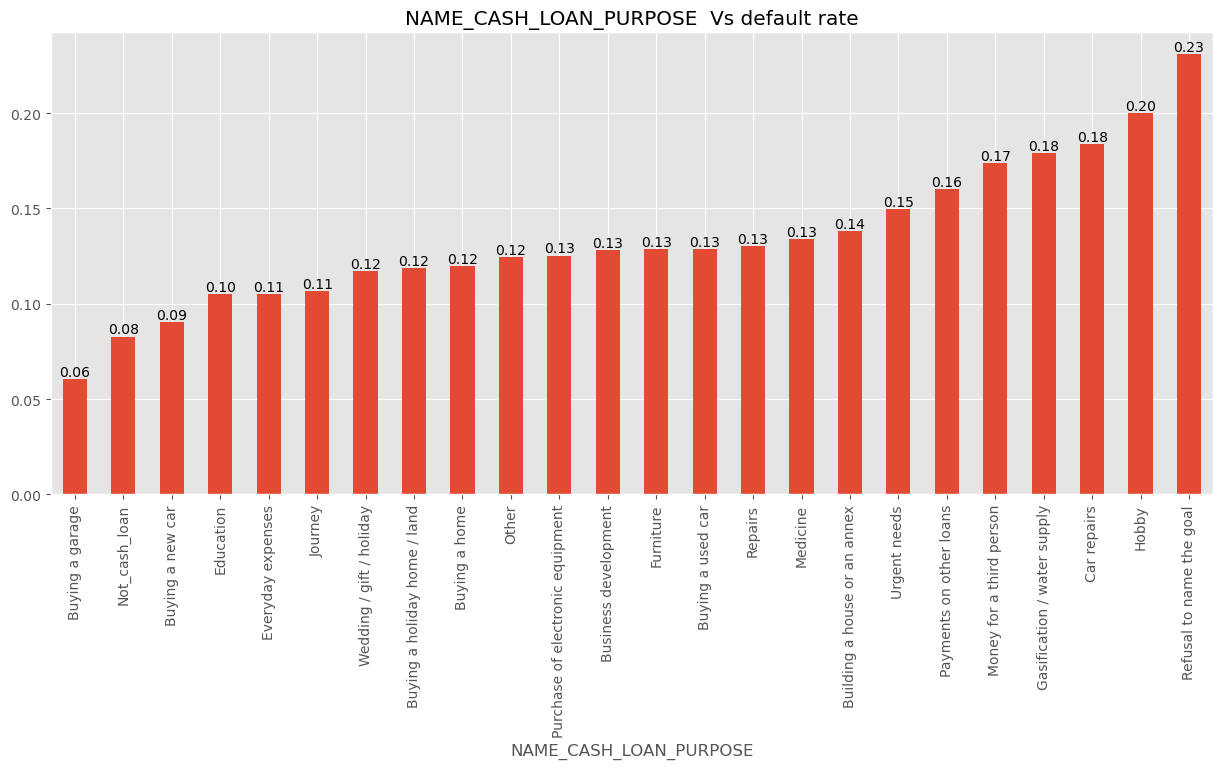

In [217]:
ax = merged_data1.groupby("NAME_CASH_LOAN_PURPOSE")["TARGET"].mean().sort_values().plot.bar(figsize=(15,6))
ax.bar_label(ax.containers[0],fmt='%.2f')
plt.title("NAME_CASH_LOAN_PURPOSE  Vs default rate")
plt.show()

Note: 
* Cash Loan taken for buying a garage is most likely to be repaid (6% default) where as the customers who refuse to name the purpose of cash loan are most likely to default(23%).

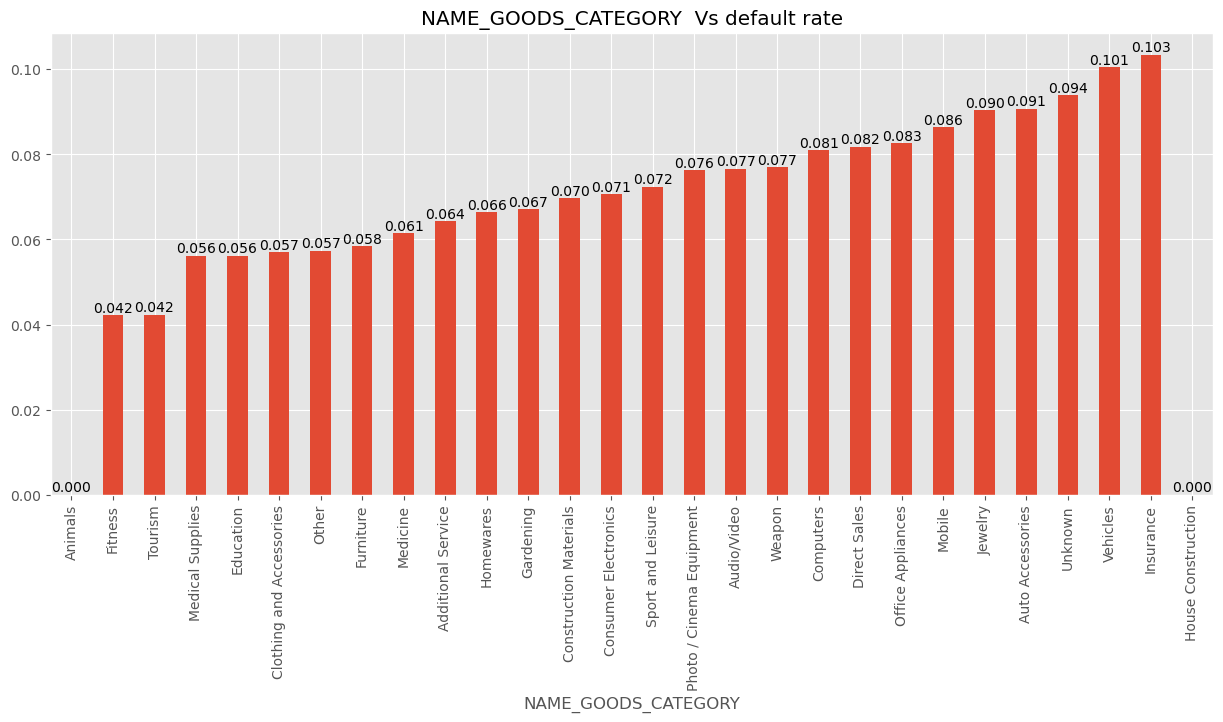

In [243]:
ax = merged_data1.groupby("NAME_GOODS_CATEGORY")["TARGET"].mean().sort_values().plot.bar(figsize=(15,6))
ax.bar_label(ax.containers[0],fmt='%.3f')
plt.title("NAME_GOODS_CATEGORY  Vs default rate")
plt.show()

Note:
* Customers who have taken loan for Animals, House Construction, fitness or Tourism are least likely to default around 0 to 4%
* Customers who have taken loan for Vehicle or Insurance are most likely to default around 10%

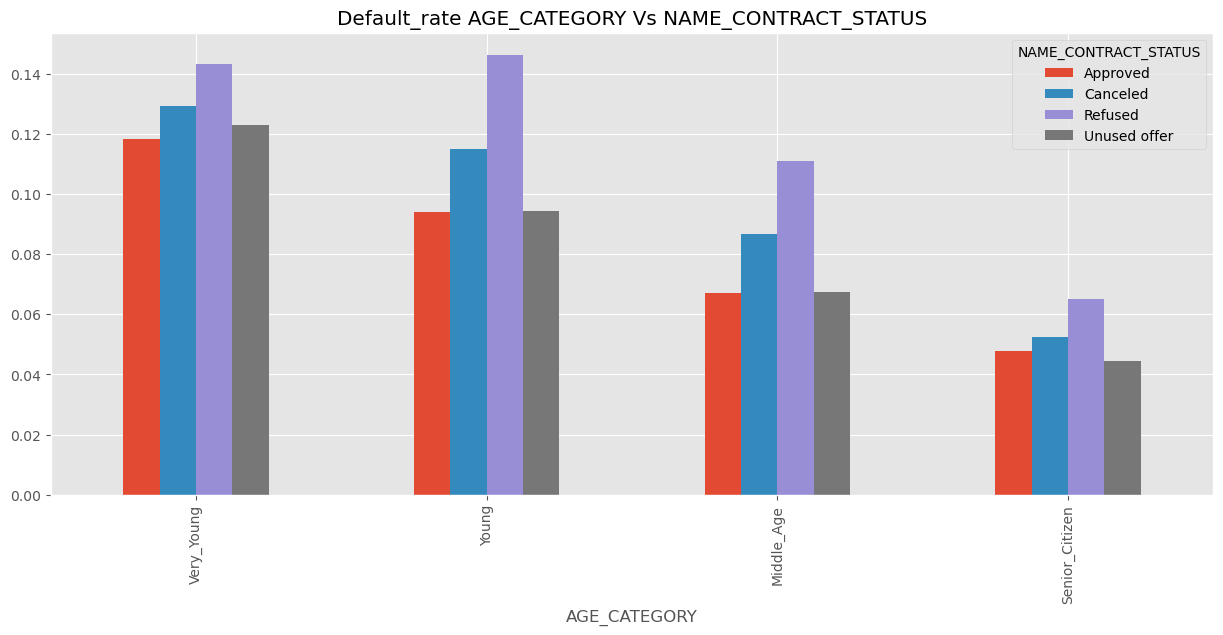

In [219]:
plot_clustered_col('AGE_CATEGORY','NAME_CONTRACT_STATUS')

- Except senior citizen, all other customers who were previously refused to give loan and now applying for loan are very likely to default (more than 11%).
- very young customers are likely to default the most in any of the contract status.

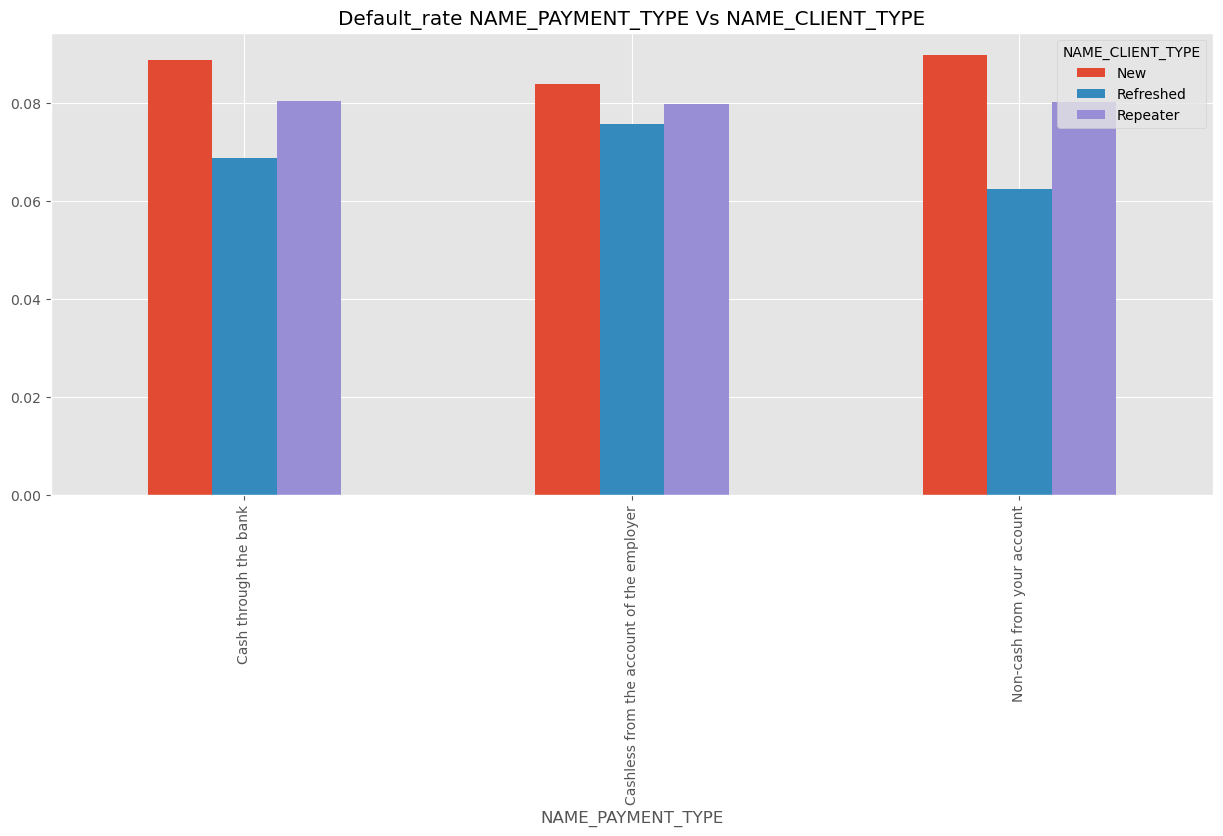

In [220]:
plot_clustered_col('NAME_PAYMENT_TYPE','NAME_CLIENT_TYPE')

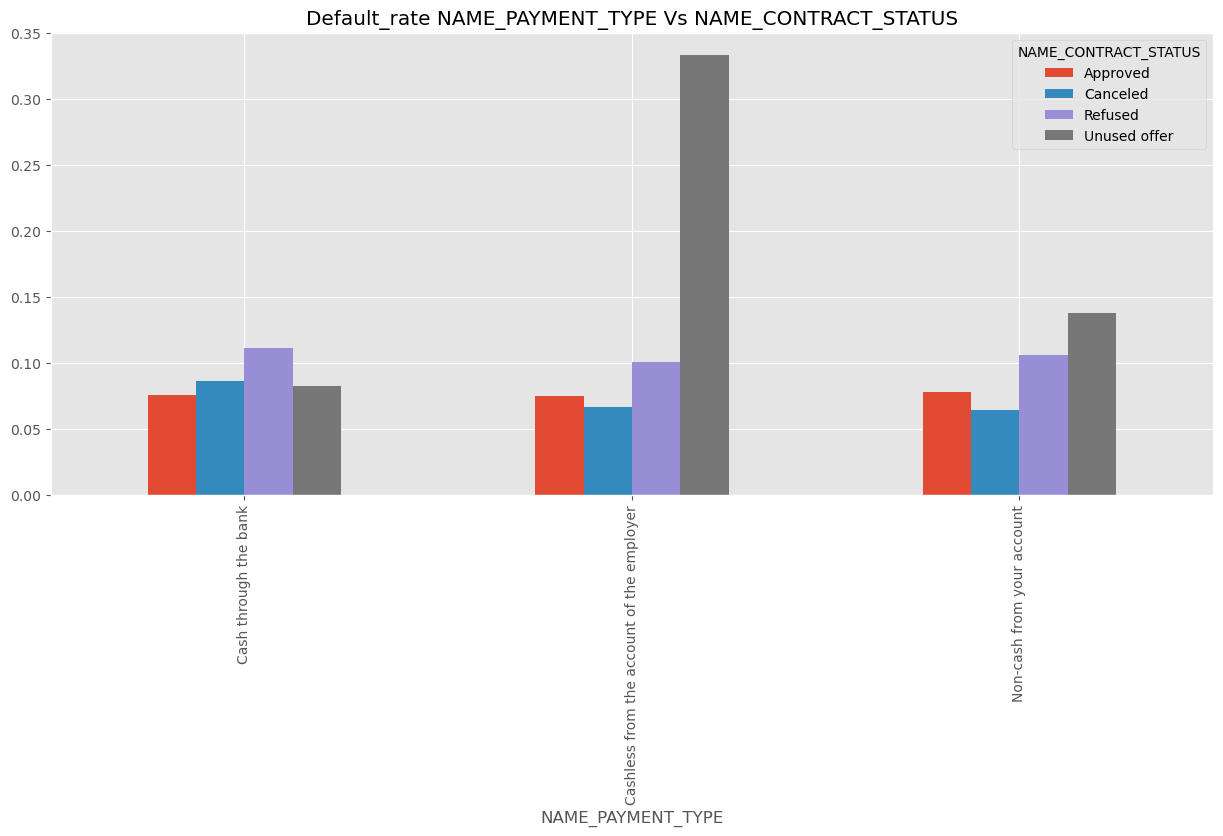

In [221]:
plot_clustered_col('NAME_PAYMENT_TYPE','NAME_CONTRACT_STATUS')

- If client wants cashless payment for a previous offer which is still unused, then the the client is 34% likely to default on the loan.

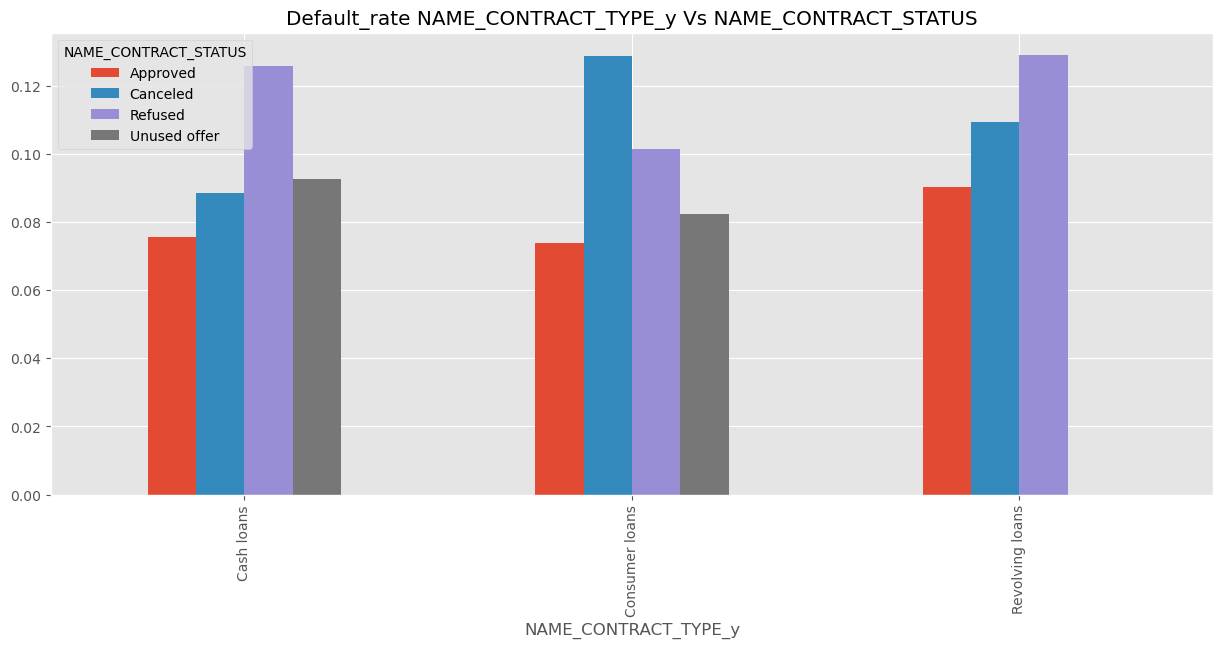

In [222]:
plot_clustered_col('NAME_CONTRACT_TYPE_y','NAME_CONTRACT_STATUS')

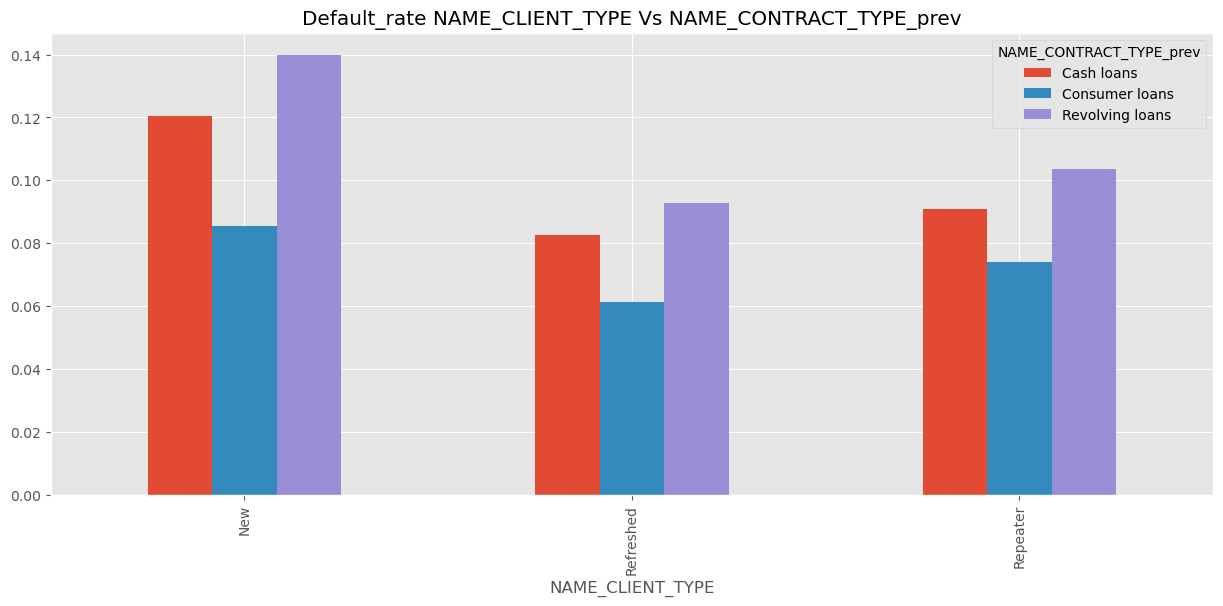

In [242]:
plot_clustered_col('NAME_CLIENT_TYPE','NAME_CONTRACT_TYPE_prev')

- New clients are more likely to default than repeat or refreshed clients.

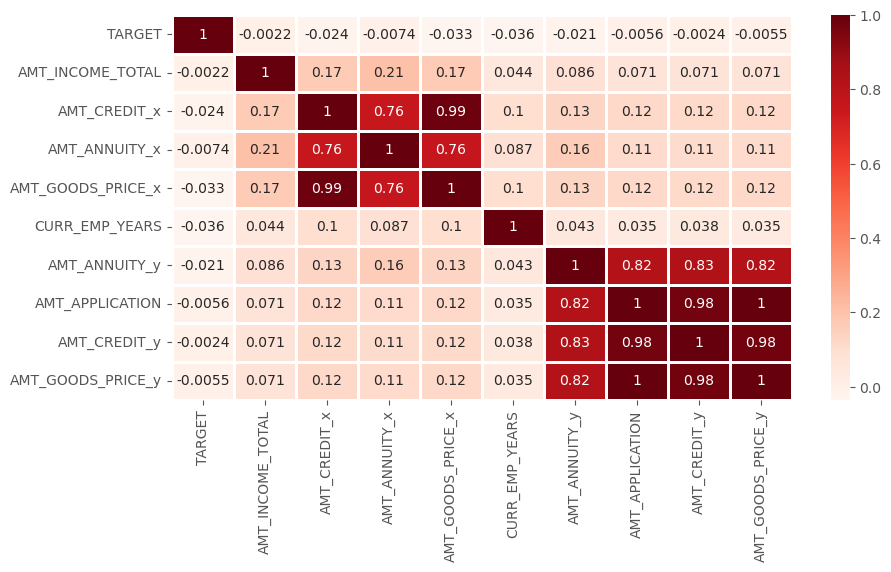

In [227]:
plt.figure(figsize=(10,5))
sns.heatmap(merged_data[num_cols].corr(),cmap='Reds',annot=True,linewidths=1)
plt.show()

## 6) Recommendations and Conclusions:

## Recommendations:

- Its better to take extra precaution while approving loans to people with occupation Low-skill Laborers, 
Cooking staff , Drivers, Laborers, Security staff, Waiters/barmen staff
- People from organization type Transport: type 3 , Industry: type 13, Industry: type 8 have higher default 
rate (more than 12%). Need to consider more factor while approving loan or provide loan with higher 
interest rate to mitigate the risk of defaulting.
- In each given contract status, below purpose of loans should be avoided or given with higher interest rate
     - Refused loan- Money for a third person 
     - Unused offer- Payment on the other loans
     - Approved loan- Refusal to name the goal previously.
     - Cancelled loan - Purchase of Electronic equipment.
- If any customer had unused offer, then instead of lending the loan with the same offer, some reworking to be done in the loan offer after a certain period. IT staff is 35% likely to default if they opt for unused offer 
loan.
- It’s better to either avoid lending loan or lend loan at higher interest rate for below categories:
     - Males with Salary range between 900K-1M with Secondary/Secondary special education(~30% default).
     - Females with salary range between 400-500K with Lower secondary education(~50% default)

## Conclusion :

### Factors which indicates if customer will default or not are:
1. NAME_FAMILY_STATUS : Single people or who have civil marriage have higher default rate.
2. NAME_INCOME_TYPE: Customers who are on Maternity leave or unemployed have higher default rate.
3. NAME_EDUCATION_TYPE: Customers with Lower Secondary & Secondary education have higher default rate.
4. OCCUPATION_TYPE: Low-skill Laborers, Cooking staff , Drivers, Laborers, Security staff, Waiters/barmen staff are 
more likely to default (default rate more than 10%)
5. ORGANIZATION_TYPE: People from Transport: type 3 , Industry: type 13, Industry: type 8 have higher default rate 
(more than 12%) be approved for loan or provide loan with higher interest rate to mitigate the risk of defaulting.
6. DAYS_BIRTH: Very young customers (age group of 20-25) have higher probability of defaulting
7. DAYS_EMPLOYED: Customers with lesser work experience have high default rate.
8. CNT_CHILDREN & CNT_FAM_MEMBERS: More number of family members(similar to more number of children) 
are more likely to default
9. AMT_GOODS_PRICE: When the credit amount goes beyond 3lakhs, there is an increase in defaulters.
10. NAME_GOODS_CATEGORY: Customers who have taken loan for Vehicle or Insurance are most likely to default 
around 10%
11. CASH_LOAN_PURPOSE : Loan taken for buying a garage is most likely to be repaid

### Factors which indicates if customer will repay or not are:
1. CODE_GENDER: Female customers have lesser default rate than male customers (almost 3% lesser)
2. NAME_EDUCATION_TYPE: Customers with Academic degree are less likely to defaults.
3. NAME_INCOME_TYPE: Student and Businessmen have no defaults.
4. ORGANIZATION_TYPE: Customers with Trade Type 4, Industry Type:12 and Transport : Type 1 have defaulted less 
than 5%
5. OCCUPATION_TYPE: Accountants are less likely to default
6. DAYS_BIRTH: People above age of 60 have less probability of defaulting
7. NAME_HOUSING_TYPE : Customers with office apartment are least likely to default
8. DAYS_EMPLOYED: Customers with 25+ year experience(Expert category) are least likely to default
9. AMT_INCOME_TOTAL: Customers with Income more than 700,000 are less likely to default
10. AMT_CREDIT_RANGE : Customers with less than 100K or more than 1M loan amount are less likely to default
11. CNT_FAM_MEMBERS : Customer with 4 or less family members are less likely to default.
12. NAME_GOODS_CATEGORY: Customers who have taken loan for fitness or Tourism are least likely to default around 
4%.
13. CASH_LOAN_PURPOSE : The customers who refuse to name the purpose of loan are most likely to default